### NYC Street Tree Census Project
This project is created to analyze New York City Tree Census data to find insights and anomalies, detect patterns and uncover any gaps during the process. The 2015 Street Tree Census was carried out by volunteers and staff organized by NYC Parks & Recreation and partner organizations. The tree data collected includes information on tree species, diameter and perception of health.

You can find the data source by clicking [here](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh) to visit the NYC Open Data website.

### Problem Statement

- Break down the population of trees by status and health.
- What is the extent of tree cover in the streets of NYC?
- Evaluate the time and effort invested in the census.
- Summarize different characteristics of the trees surveyed.
- Are there any outliers in the tree diameter measurements? If yes, use an effective way to handle them and provide the average and median diameter of different tree populations: alive, dead and stumps.
- Are there any correlations between various characteristics of the trees?
- Are trees causing any harm or damage to their immediate surroundings? If yes, is it excessive?
- Explore the spread of different types of tree guards across NYC Boroughs and NTAs.
- What are the major problems affecting trees in NYC and their scale?
- Provide an overview of the outlier trees, if any, and efficient ways to address these outliers.

### Installing Required Packages

In [226]:
#!pip -q install pandas numpy matplotlib seaborn geopandas shapely squarify

### Importing Required Modules

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import squarify as sqr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from shapely.geometry import Point
from matplotlib.ticker import ScalarFormatter
from matplotlib.cbook import boxplot_stats
from matplotlib.colors import ListedColormap

### Setting Diplay Options

In [228]:
pd.set_option("display.max_columns", None)

### Loading the Data

In [229]:
tree_df = pd.read_csv("../Datasets/2015_Street_Tree_Census_-_Tree_Data_20231205.csv")
tree_df

tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status  \
0        180683    348711  08/27/2015         3           0   OnCurb  Alive   
1        200540    315986  09/03/2015        21           0   OnCurb  Alive   
2        204026    218365  09/05/2015         3           0   OnCurb  Alive   
3        204337    217969  09/05/2015        10           0   OnCurb  Alive   
4        189565    223043  08/30/2015        21           0   OnCurb  Alive   
...         ...       ...         ...       ...         ...      ...    ...   
683783   155433    217978  08/18/2015        25           0   OnCurb  Alive   
683784   183795    348185  08/29/2015         7           0   OnCurb  Alive   
683785   166161    401670  08/22/2015        12           0   OnCurb  Alive   
683786   184028    504204  08/29/2015         9           0   OnCurb  Alive   
683787   200607    306527  09/03/2015        23           0   OnCurb  Alive   

       health                           spc_latin           spc_common  \
0        Fair                         Acer rubrum            red maple   
1        Fair                   Quercus palustris              pin oak   
2        Good  Gleditsia triacanthos var. inermis          honeylocust   
3        Good  Gleditsia triacanthos var. inermis          honeylocust   
4        Good                     Tilia americana      American linden   
...       ...                                 ...                  ...   
683783   Good                   Quercus palustris              pin oak   
683784   Good                 Cladrastis kentukea  Kentucky yellowwood   
683785   Good                         Acer rubrum            red maple   
683786   Good                         Acer rubrum            red maple   
683787   Fair                         Acer rubrum            red maple   

       steward guards  sidewalk         user_type problems root_stone  \
0          NaN    NaN  NoDamage  TreesCount Staff      NaN         No   
1          NaN    NaN    Damage  TreesCount Staff   Stones        Yes   
2         1or2    NaN    Damage         Volunteer      NaN         No   
3          NaN    NaN    Damage         Volunteer   Stones        Yes   
4          NaN    NaN    Damage         Volunteer   Stones        Yes   
...        ...    ...       ...               ...      ...        ...   
683783     NaN    NaN    Damage         Volunteer      NaN         No   
683784    1or2    NaN  NoDamage         Volunteer      NaN         No   
683785     NaN    NaN    Damage         Volunteer      NaN         No   
683786     NaN    NaN  NoDamage  TreesCount Staff      NaN         No   
683787     NaN    NaN  NoDamage  TreesCount Staff      NaN         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
0              No         No         No         No         No         No   
1              No         No         No         No         No         No   
2              No         No         No         No         No         No   
3              No         No         No         No         No         No   
4              No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683783         No         No         No         No         No         No   
683784         No         No         No         No         No         No   
683785         No         No         No         No         No         No   
683786         No         No         No         No         No         No   
683787         No         No         No         No         No         No   

       brch_shoe brch_other                  address  postcode       zip_city  \
0             No         No        108-005 70 AVENUE     11375   Forest Hills   
1             No         No         147-074 7 AVENUE     11357     Whitestone   
2             No         No        390 MORGAN AVENUE     11211       Brooklyn   
3             No         No        1027 GRAND STREET    

In [230]:
tree_df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

#### Choosing columns of interest 

Method `.copy()` is used to make a copy of the filtered tree_df view and store it as `tree_sub_df` (This is done to avoid ambiuity between `df` views and copies which will help us avoid unecessary python warnings).

In [231]:
tree_sub_df = tree_df[['tree_id', 'created_at', 'tree_dbh', 'stump_diam',
       'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'borocode', 'borough', 'nta', 'nta_name',
       'latitude', 'longitude']].copy()
tree_sub_df

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
2        204026  09/05/2015         3           0  Alive   Good   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683783   155433  08/18/2015        25           0  Alive   Good   
683784   183795  08/29/2015         7           0  Alive   Good   
683785   166161  08/22/2015        12           0  Alive   Good   
683786   184028  08/29/2015         9           0  Alive   Good   
683787   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple     NaN   
1                        Quercus palustris              pin oak     NaN   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust     NaN   
4                          Tilia americana      American linden     NaN   
...                                    ...                  ...     ...   
683783                   Quercus palustris              pin oak     NaN   
683784                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683785                         Acer rubrum            red maple     NaN   
683786                         Acer rubrum            red maple     NaN   
683787                         Acer rubrum            red maple     NaN   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0         NaN  NoDamage  TreesCount Staff         No         No         No   
1         NaN    Damage  TreesCount Staff        Yes         No         No   
2         NaN    Damage         Volunteer         No         No         No   
3         NaN    Damage         Volunteer        Yes         No         No   
4         NaN    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683783    NaN    Damage         Volunteer         No         No         No   
683784    NaN  NoDamage         Volunteer         No         No         No   
683785    NaN    Damage         Volunteer         No         No         No   
683786    NaN  NoDamage  TreesCount Staff         No         No         No   
683787    NaN  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683783         No         No         No         No        No         No   
683784         No         No         No         No        No         No   
683785         No         No         No         No        No         No   
683786         No         No         No         No        No         No   
683787         No         No         No         No        No         No   

        borocode        borough   nta               nta_name   latitude  \
0              4         Queens  QN17           Forest Hills  40.723092   
1              4         Queens  QN49             Whitestone  40.794111   
2              3       Brooklyn  BK90      East Williamsburg  40.717581   
3              3       Brooklyn  BK90      East Williamsburg  40.713537   
4              3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...          .

### Exploratory Data Analysis (EDA)

Descriptive Statistics of the numerical columns in the `df`

In [232]:
tree_sub_df.describe()

tree_id       tree_dbh     stump_diam       borocode  \
count  683788.000000  683788.000000  683788.000000  683788.000000   
mean   365205.011085      11.279787       0.432463       3.358500   
std    208122.092902       8.723042       3.290241       1.166746   
min         3.000000       0.000000       0.000000       1.000000   
25%    186582.750000       4.000000       0.000000       3.000000   
50%    366214.500000       9.000000       0.000000       4.000000   
75%    546170.250000      16.000000       0.000000       4.000000   
max    722694.000000     450.000000     140.000000       5.000000   

            latitude      longitude  
count  683788.000000  683788.000000  
mean       40.701261     -73.924060  
std         0.090311       0.123583  
min        40.498466     -74.254965  
25%        40.631928     -73.980500  
50%        40.700612     -73.912911  
75%        40.762228     -73.834910  
max        40.912918     -73.700488

Histograms of the numerical columns of the `df` to visualize their distributions

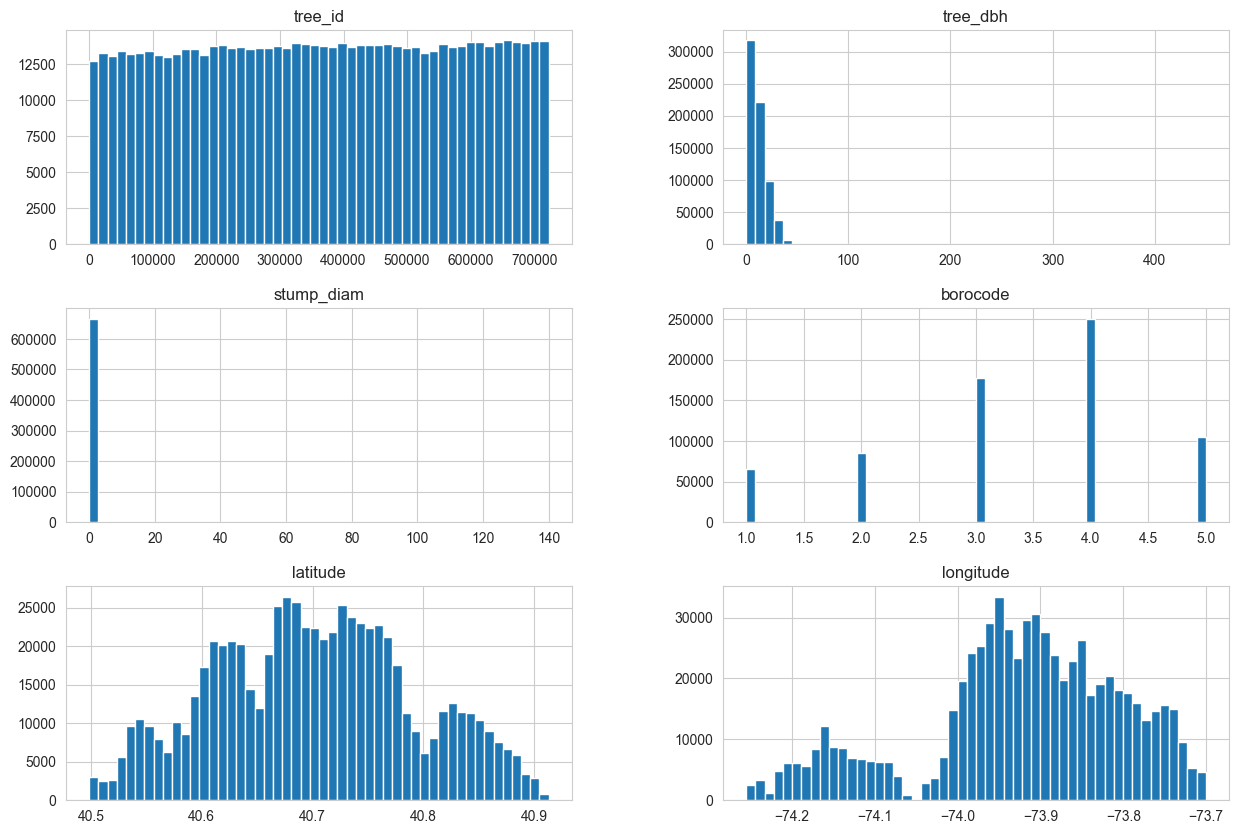

In [233]:
tree_sub_df.hist(bins=50, figsize=(15,10));

Scatterplots for big trees and stumps (dia>50) to visualize their distribution (Possible outliers)

In [234]:
big_trees_df = tree_sub_df[tree_sub_df["tree_dbh"] > 50].sort_values("tree_dbh", ascending=False)
big_trees_df

tree_id  created_at  tree_dbh  stump_diam status health  \
228048   433258  11/05/2015       450           0   Dead    NaN   
2405     168583  08/23/2015       425           0  Alive   Good   
180962   370606  10/23/2015       389           0  Alive   Fair   
201195   418433  11/03/2015       318           0  Alive   Good   
270493   476317  11/20/2015       318           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
405335   629655  07/17/2016        51           0  Alive   Good   
389679   605093  06/27/2016        51           0  Alive   Good   
386267   572023  06/01/2016        51           0  Alive   Good   
364681   581643  06/10/2016        51           0  Alive   Good   
334238   485194  11/27/2015        51           0  Alive   Good   

                      spc_latin        spc_common steward guards  sidewalk  \
228048                      NaN               NaN     NaN    NaN       NaN   
2405            Quercus bicolor   swamp white oak    1or2    NaN    Damage   
180962  Liriodendron tulipifera      tulip-poplar     NaN    NaN    Damage   
201195    Platanus x acerifolia  London planetree     NaN    NaN  NoDamage   
270493        Quercus palustris           pin oak     NaN    NaN  NoDamage   
...                         ...               ...     ...    ...       ...   
405335    Platanus x acerifolia  London planetree     NaN    NaN  NoDamage   
389679        Quercus palustris           pin oak     NaN    NaN    Damage   
386267        Quercus palustris           pin oak     NaN    NaN    Damage   
364681                    Morus          mulberry     NaN    NaN  NoDamage   
334238         Acer saccharinum      silver maple     NaN    NaN  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
228048  TreesCount Staff         No         No         No         No   
2405     NYC Parks Staff         No         No         No         No   
180962   NYC Parks Staff         No         No         No         No   
201195   NYC Parks Staff         No         No         No         No   
270493  TreesCount Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
405335         Volunteer        Yes         No         No         No   
389679  TreesCount Staff        Yes         No         No         No   
386267  TreesCount Staff        Yes         No         No         No   
364681  TreesCount Staff         No         No         No         No   
334238   NYC Parks Staff        Yes         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
228048         No         No         No        No         No         2   
2405           No         No         No        No         No         3   
180962         No         No         No        No         No         4   
201195         No         No        Yes        No         No         3   
270493         No         No         No        No         No         1   
...           ...        ...        ...       ...        ...       ...   
405335         No         No        Yes        No         No         4   
389679         No         No         No        No         No         4   
386267         No         No        Yes        No         No         4   
364681         No         No         No        No         No         4   
334238         No         No         No        No         No         4   

          borough   nta                                         nta_name  \
228048      Bronx  BX09  Soundview-Castle Hill-Clason Point-Harding Park   
2405     Brooklyn  BK61                              Crown Heights North   
180962     Queens  QN66                                        Laurelton   
201195   Brooklyn  BK83                          Cypress Hills-City Line   
270493  Manhattan  MN35                         Washington Heights North   
...           ...   ...                                 

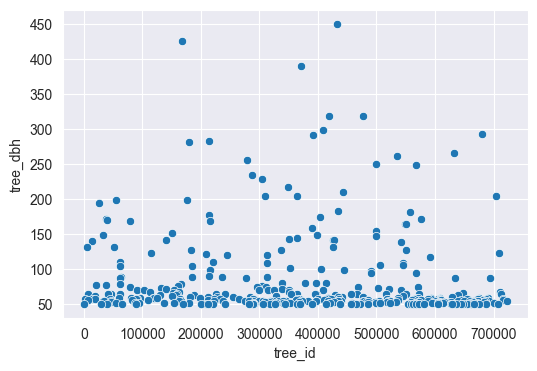

In [235]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
sns.scatterplot(x="tree_id", y="tree_dbh", data=big_trees_df);

In [236]:
big_stump_df = tree_sub_df[tree_sub_df["stump_diam"] > 50].sort_values("stump_diam", ascending=False)
big_stump_df

tree_id  created_at  tree_dbh  stump_diam status health spc_latin  \
11342    206819  09/06/2015         0         140  Stump    NaN       NaN   
89539    286364  10/06/2015         0         134  Stump    NaN       NaN   
137315   319640  10/13/2015         0         131  Stump    NaN       NaN   
497829   711302  09/13/2016         0         125  Stump    NaN       NaN   
543264    35364  06/25/2015         0         120  Stump    NaN       NaN   
...         ...         ...       ...         ...    ...    ...       ...   
545899    48337  07/03/2015         0          51  Stump    NaN       NaN   
253452   463142  11/17/2015         0          51  Stump    NaN       NaN   
368165   569890  05/30/2016         0          51  Stump    NaN       NaN   
364330   560812  05/17/2016         0          51  Stump    NaN       NaN   
185177   432140  11/05/2015         0          51  Stump    NaN       NaN   

       spc_common steward guards sidewalk         user_type root_stone  \
11342         NaN     NaN    NaN      NaN  TreesCount Staff         No   
89539         NaN     NaN    NaN      NaN   NYC Parks Staff         No   
137315        NaN     NaN    NaN      NaN   NYC Parks Staff         No   
497829        NaN     NaN    NaN      NaN   NYC Parks Staff         No   
543264        NaN     NaN    NaN      NaN         Volunteer         No   
...           ...     ...    ...      ...               ...        ...   
545899        NaN     NaN    NaN      NaN         Volunteer         No   
253452        NaN     NaN    NaN      NaN   NYC Parks Staff         No   
368165        NaN     NaN    NaN      NaN         Volunteer         No   
364330        NaN     NaN    NaN      NaN  TreesCount Staff         No   
185177        NaN     NaN    NaN      NaN  TreesCount Staff         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
11342          No         No         No         No         No         No   
89539          No         No         No         No         No         No   
137315         No         No         No         No         No         No   
497829         No         No         No         No         No         No   
543264         No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
545899         No         No         No         No         No         No   
253452         No         No         No         No         No         No   
368165         No         No         No         No         No         No   
364330         No         No         No         No         No         No   
185177         No         No         No         No         No         No   

       brch_shoe brch_other  borocode        borough   nta  \
11342         No         No         4         Queens  QN62   
89539         No         No         5  Staten Island  SI35   
137315        No         No         4         Queens  QN52   
497829        No         No         3       Brooklyn  BK88   
543264        No         No         4         Queens  QN37   
...          ...        ...       ...            ...   ...   
545899        No         No         4         Queens  QN46   
253452        No         No         5  Staten Island  SI45   
368165        No         No         3       Brooklyn  BK96   
364330        No         No         4         Queens  QN08   
185177        No         No         5  Staten Island  SI37   

                        nta_name   latitude  longitude  
11342            Queensboro Hill  40.747240 -73.833037  
89539   New Brighton-Silver Lake  40.629863 -74.106388  
137315             East Flushing  40.749227 -73.798965  
497829              Borough Park  40.626700 -73.996484  
543264         Kew Gardens Hills  40.720562 -73.818886  
...                          ...        ...        ...  
545899     Bayside-Bayside Hills  40.765413 -73.781615  
253452    New Dorp-Midland Beach  40.572464 -74.107028  
368165      Rugby-Remse

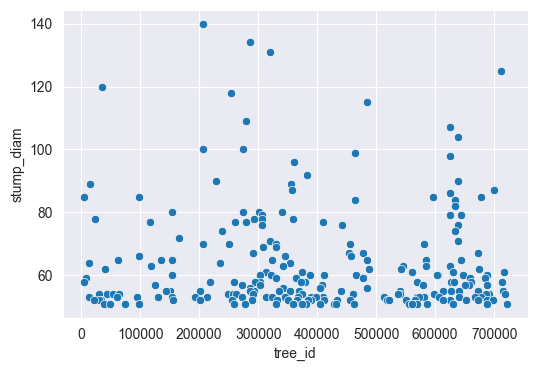

In [237]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="tree_id", y="stump_diam", data=big_stump_df);

Comparing the results of `.value_counts()` and `.groupby()` to check whether they give the same results for the count of each latin and common species name 

1. Using `.value_counts()` and saving the tree name counts to a `.csv` file for manual inspection:

In [238]:
tree_names_df = tree_sub_df[["spc_latin", "spc_common"]].value_counts()
tree_names_df.to_csv("names.csv")

In [239]:
names_df = pd.read_csv("names.csv")
names_df = names_df.sort_values(["count", "spc_latin"], ascending=[False, True]).reset_index(drop=True)
names_df

spc_latin        spc_common  count
0                 Platanus x acerifolia  London planetree  87014
1    Gleditsia triacanthos var. inermis       honeylocust  64264
2                      Pyrus calleryana      Callery pear  58931
3                     Quercus palustris           pin oak  53185
4                      Acer platanoides      Norway maple  34189
..                                  ...               ...    ...
127                         Pinus nigra        black pine     37
128                        Pinus rigida        pitch pine     33
129                    Maclura pomifera      Osage-orange     29
130                    Pinus sylvestris        Scots pine     25
131                    Pinus virginiana     Virginia pine     10

[132 rows x 3 columns]

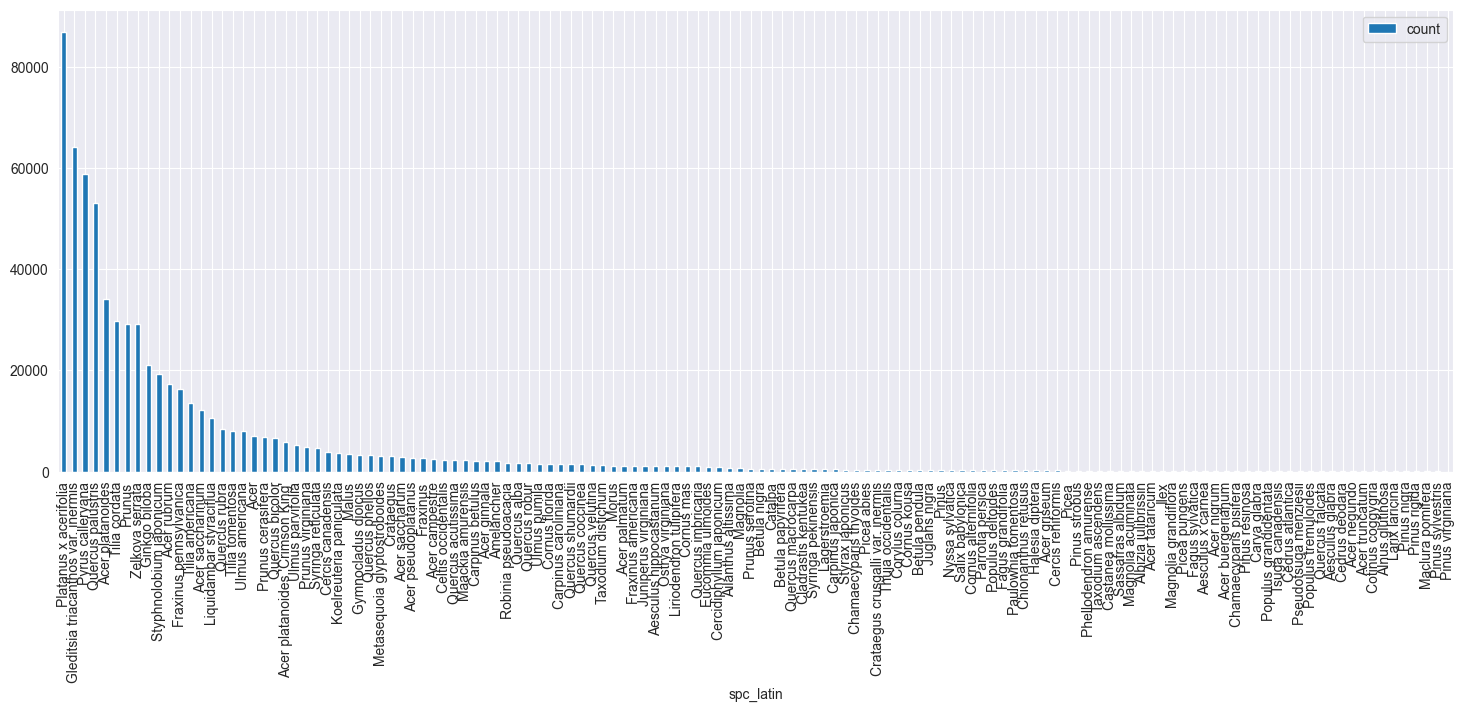

In [240]:
names_df.plot(kind = "bar", x= "spc_latin", y= "count", figsize=(18,6));

2. Using `.groupby()`:

In [241]:
names2_df = tree_sub_df.groupby(["spc_latin", "spc_common"])[["spc_latin", "spc_common"]].count().reset_index(names=["latin", "common"])
names2_df = names2_df.sort_values(["spc_latin", "spc_common"], ascending=False).reset_index(drop=True) 

All rows above have columns 3 and 4 as equal

In [242]:
(names2_df["spc_latin"] == names2_df["spc_common"]).sum()

132

Removing the 4th column (duplicate of column 3), renaming remaining columns and sorting the rows

In [243]:
final_names = names2_df[["latin", "common", "spc_latin"]].rename(columns= {"latin": "spc_latin", "common": "spc_common", "spc_latin": "count"})
final_names = final_names.sort_values(["count", "spc_latin"], ascending=[False, True])
final_names 

spc_latin        spc_common  count
0                 Platanus x acerifolia  London planetree  87014
1    Gleditsia triacanthos var. inermis       honeylocust  64264
2                      Pyrus calleryana      Callery pear  58931
3                     Quercus palustris           pin oak  53185
4                      Acer platanoides      Norway maple  34189
..                                  ...               ...    ...
127                         Pinus nigra        black pine     37
128                        Pinus rigida        pitch pine     33
129                    Maclura pomifera      Osage-orange     29
130                    Pinus sylvestris        Scots pine     25
131                    Pinus virginiana     Virginia pine     10

[132 rows x 3 columns]

Comparing the `.value_counts()` `df` and the `.groupby()` `df` (both yield the same result)

In [244]:
names_df.equals(final_names)

True

### Data Preprocessing and Cleaning

#### 1. Checking for Missing Values (nulls)

Checking for nulls in all columns

In [245]:
tree_sub_df.isna().sum()

tree_id            0
created_at         0
tree_dbh           0
stump_diam         0
status             0
health         31616
spc_latin      31619
spc_common     31619
steward       519438
guards        603922
sidewalk       31616
user_type          0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
borocode           0
borough            0
nta                0
nta_name           0
latitude           0
longitude          0
dtype: int64

Checking for non-nulls in all columns

In [246]:
tree_sub_df.notna().sum()

tree_id       683788
created_at    683788
tree_dbh      683788
stump_diam    683788
status        683788
health        652172
spc_latin     652169
spc_common    652169
steward       164350
guards         79866
sidewalk      652172
user_type     683788
root_stone    683788
root_grate    683788
root_other    683788
trunk_wire    683788
trnk_light    683788
trnk_other    683788
brch_light    683788
brch_shoe     683788
brch_other    683788
borocode      683788
borough       683788
nta           683788
nta_name      683788
latitude      683788
longitude     683788
dtype: int64

#### 2. Checking for Inaccurate Data

**Alive and Dead trees do not have a Stump Diameter**

In [247]:
# Converting pandas series to pandas df and resetting its index
tree_sub_df[["status", "stump_diam"]].value_counts(dropna= False).reset_index()

status  stump_diam   count
0    Alive           0  652173
1     Dead           0   13961
2    Stump           4     966
3    Stump           5     939
4    Stump           3     779
..     ...         ...     ...
96   Stump          96       1
97   Stump          92       1
98   Stump          72       1
99   Stump          82       1
100  Stump         140       1

[101 rows x 3 columns]

**Stumps do not have a Tree Diameter at breast height (dbh)**

In [248]:
tree_dbh_values = tree_sub_df[["status", "tree_dbh"]].value_counts(dropna= False).reset_index()
tree_dbh_values

status  tree_dbh  count
0    Alive         4  58149
1    Alive         3  51630
2    Alive         5  40706
3    Alive         2  38484
4    Alive        11  37587
..     ...       ...    ...
188  Alive       298      1
189  Alive       293      1
190  Alive       291      1
191  Alive       282      1
192  Alive       198      1

[193 rows x 3 columns]

In [249]:
tree_dbh_values.columns

Index(['status', 'tree_dbh', 'count'], dtype='object')

In [250]:
tree_dbh_values[((tree_dbh_values["status"] == "Dead") | (tree_dbh_values["status"] == "Stump"))].reset_index(drop=True)

status  tree_dbh  count
0   Stump         0  17654
1    Dead         2   3493
2    Dead         3   2824
3    Dead         4   2223
4    Dead         5    936
5    Dead         6    672
6    Dead         8    461
7    Dead         7    449
8    Dead        11    391
9    Dead        10    376
10   Dead         9    362
11   Dead         1    283
12   Dead        12    237
13   Dead        13    190
14   Dead        14    172
15   Dead        15    136
16   Dead        16    105
17   Dead        17    105
18   Dead        18     95
19   Dead        20     64
20   Dead        19     64
21   Dead         0     56
22   Dead        21     49
23   Dead        22     45
24   Dead        25     33
25   Dead        23     29
26   Dead        24     28
27   Dead        27     16
28   Dead        26     14
29   Dead        28      7
30   Dead        31      6
31   Dead        29      5
32   Dead        30      5
33   Dead        35      4
34   Dead        32      4
35   Dead        48      3
36   Dead        33      3
37   Dead        37      2
38   Dead        41      2
39   Dead        42      2
40   Dead        34      2
41   Dead        36      2
42   Dead        38      1
43   Dead        39      1
44   Dead        40      1
45   Dead       127      1
46   Dead       204      1
47   Dead       450      1

Number of unique `tree_dbh` (tree diameter) values for Alive and Dead trees

In [251]:
(tree_dbh_values[tree_dbh_values["status"] == "Dead"].shape[0], 
tree_dbh_values[tree_dbh_values["status"] == "Alive"].shape[0])

(47, 145)

`.groupby()` does not allow us to apply different aggregations to different columns by default

In [252]:
tree_dbh_values.groupby("status")[["count"]].sum()

count
status        
Alive   652173
Dead     13961
Stump    17654

In [253]:
aggregations = {   # Need count aggregation for tree_dbh column and sum aggregation for count column
    "tree_dbh": "count",
    "count": "sum"
}

Getting total count of trees and count of unique `tree_dbh` values for each `status`. Using `.agg()` method to apply different aggregations to different columns

In [254]:
tree_dbh_values.groupby("status").agg(aggregations).reset_index()

status  tree_dbh   count
0  Alive       145  652173
1   Dead        47   13961
2  Stump         1   17654

Checking the unique values and their counts in categorical columns

In [255]:
tree_sub_df["steward"].value_counts(dropna=False)

steward
NaN        519438
1or2       143557
3or4        19183
4orMore      1610
Name: count, dtype: int64

In [256]:
tree_sub_df["guards"].value_counts(dropna=False)

guards
NaN        603922
Helpful     51866
Harmful     20252
Unsure       7748
Name: count, dtype: int64

In [257]:
tree_sub_df["sidewalk"].value_counts(dropna=False)

sidewalk
NoDamage    464978
Damage      187194
NaN          31616
Name: count, dtype: int64

In [258]:
tree_sub_df["health"].value_counts(dropna = False)

health
Good    528850
Fair     96504
NaN      31616
Poor     26818
Name: count, dtype: int64

In [259]:
tree_sub_df["status"].value_counts(dropna = False)

status
Alive    652173
Stump     17654
Dead      13961
Name: count, dtype: int64

Trees that are not alive

In [260]:
not_alive = tree_sub_df[tree_sub_df["status"] != "Alive"]
not_alive

tree_id  created_at  tree_dbh  stump_diam status health spc_latin  \
37       211205  09/09/2015         0          16  Stump    NaN       NaN   
57       187807  08/29/2015         0           0   Dead    NaN       NaN   
196      208322  09/07/2015        10           0   Dead    NaN       NaN   
209      209058  09/08/2015         6           0   Dead    NaN       NaN   
239      203597  09/04/2015         0          15  Stump    NaN       NaN   
...         ...         ...       ...         ...    ...    ...       ...   
683693   156162  08/18/2015         3           0   Dead    NaN       NaN   
683695   170888  08/24/2015         0           5  Stump    NaN       NaN   
683697   177922  08/26/2015         0          17  Stump    NaN       NaN   
683698   193791  09/01/2015         3           0   Dead    NaN       NaN   
683699   172660  08/25/2015         0           4  Stump    NaN       NaN   

       spc_common steward guards sidewalk         user_type root_stone  \
37            NaN     NaN    NaN      NaN  TreesCount Staff         No   
57            NaN     NaN    NaN      NaN         Volunteer         No   
196           NaN     NaN    NaN      NaN         Volunteer         No   
209           NaN     NaN    NaN      NaN  TreesCount Staff         No   
239           NaN     NaN    NaN      NaN         Volunteer         No   
...           ...     ...    ...      ...               ...        ...   
683693        NaN     NaN    NaN      NaN         Volunteer         No   
683695        NaN     NaN    NaN      NaN  TreesCount Staff         No   
683697        NaN     NaN    NaN      NaN         Volunteer         No   
683698        NaN     NaN    NaN      NaN  TreesCount Staff         No   
683699        NaN     NaN    NaN      NaN  TreesCount Staff         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
37             No         No         No         No         No         No   
57             No         No         No         No         No         No   
196            No         No         No         No         No         No   
209            No         No         No         No         No         No   
239            No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683693         No         No         No         No         No         No   
683695         No         No         No         No         No         No   
683697         No         No         No         No         No         No   
683698         No         No         No         No         No         No   
683699         No         No         No         No         No         No   

       brch_shoe brch_other  borocode        borough   nta  \
37            No         No         4         Queens  QN72   
57            No         No         2          Bronx  BX43   
196           No         No         3       Brooklyn  BK77   
209           No         No         5  Staten Island  SI25   
239           No         No         4         Queens  QN72   
...          ...        ...       ...            ...   ...   
683693        No         No         1      Manhattan  MN40   
683695        No         No         3       Brooklyn  BK95   
683697        No         No         5  Staten Island  SI01   
683698        No         No         3       Brooklyn  BK26   
683699        No         No         4         Queens  QN15   

                                          nta_name   latitude  longitude  
37                                        Steinway  40.774993 -73.922037  
57                                         Norwood  40.871927 -73.882349  
196                                 Bushwick North  40.705742 -73.917849  
209                          Oakwood-Oakwood Beach  40.559061 -74.106038  
239                                       Steinway  40.772483 -73.909073  
...                                            ...        ...        ...  
683693     

One tree that is not alive where latin and common names are provided

In [261]:
not_alive[not_alive["spc_latin"].notna()]

tree_id  created_at  tree_dbh  stump_diam status health  \
263544   473703  11/19/2015        12           0   Dead    NaN   

                                 spc_latin   spc_common steward guards  \
263544  Gleditsia triacanthos var. inermis  honeylocust     NaN    NaN   

       sidewalk  user_type root_stone root_grate root_other trunk_wire  \
263544      NaN  Volunteer         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
263544         No         No         No        No         No         1   

          borough   nta         nta_name   latitude  longitude  
263544  Manhattan  MN28  Lower East Side  40.710384 -73.988208

31614 trees that are not alive where latin and common names are null

In [262]:
not_alive[not_alive["spc_latin"].isna()]

tree_id  created_at  tree_dbh  stump_diam status health spc_latin  \
37       211205  09/09/2015         0          16  Stump    NaN       NaN   
57       187807  08/29/2015         0           0   Dead    NaN       NaN   
196      208322  09/07/2015        10           0   Dead    NaN       NaN   
209      209058  09/08/2015         6           0   Dead    NaN       NaN   
239      203597  09/04/2015         0          15  Stump    NaN       NaN   
...         ...         ...       ...         ...    ...    ...       ...   
683693   156162  08/18/2015         3           0   Dead    NaN       NaN   
683695   170888  08/24/2015         0           5  Stump    NaN       NaN   
683697   177922  08/26/2015         0          17  Stump    NaN       NaN   
683698   193791  09/01/2015         3           0   Dead    NaN       NaN   
683699   172660  08/25/2015         0           4  Stump    NaN       NaN   

       spc_common steward guards sidewalk         user_type root_stone  \
37            NaN     NaN    NaN      NaN  TreesCount Staff         No   
57            NaN     NaN    NaN      NaN         Volunteer         No   
196           NaN     NaN    NaN      NaN         Volunteer         No   
209           NaN     NaN    NaN      NaN  TreesCount Staff         No   
239           NaN     NaN    NaN      NaN         Volunteer         No   
...           ...     ...    ...      ...               ...        ...   
683693        NaN     NaN    NaN      NaN         Volunteer         No   
683695        NaN     NaN    NaN      NaN  TreesCount Staff         No   
683697        NaN     NaN    NaN      NaN         Volunteer         No   
683698        NaN     NaN    NaN      NaN  TreesCount Staff         No   
683699        NaN     NaN    NaN      NaN  TreesCount Staff         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
37             No         No         No         No         No         No   
57             No         No         No         No         No         No   
196            No         No         No         No         No         No   
209            No         No         No         No         No         No   
239            No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683693         No         No         No         No         No         No   
683695         No         No         No         No         No         No   
683697         No         No         No         No         No         No   
683698         No         No         No         No         No         No   
683699         No         No         No         No         No         No   

       brch_shoe brch_other  borocode        borough   nta  \
37            No         No         4         Queens  QN72   
57            No         No         2          Bronx  BX43   
196           No         No         3       Brooklyn  BK77   
209           No         No         5  Staten Island  SI25   
239           No         No         4         Queens  QN72   
...          ...        ...       ...            ...   ...   
683693        No         No         1      Manhattan  MN40   
683695        No         No         3       Brooklyn  BK95   
683697        No         No         5  Staten Island  SI01   
683698        No         No         3       Brooklyn  BK26   
683699        No         No         4         Queens  QN15   

                                          nta_name   latitude  longitude  
37                                        Steinway  40.774993 -73.922037  
57                                         Norwood  40.871927 -73.882349  
196                                 Bushwick North  40.705742 -73.917849  
209                          Oakwood-Oakwood Beach  40.559061 -74.106038  
239                                       Steinway  40.772483 -73.909073  
...                                            ...        ...        ...  
683693     

A view of the different tree problems

In [263]:
tree_problems = tree_sub_df[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

root_stone root_grate root_other trunk_wire trnk_light trnk_other  \
0              No         No         No         No         No         No   
1             Yes         No         No         No         No         No   
2              No         No         No         No         No         No   
3             Yes         No         No         No         No         No   
4             Yes         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683783         No         No         No         No         No         No   
683784         No         No         No         No         No         No   
683785         No         No         No         No         No         No   
683786         No         No         No         No         No         No   
683787         No         No         No         No         No         No   

       brch_light brch_shoe brch_other  
0              No        No         No  
1              No        No         No  
2              No        No         No  
3              No        No         No  
4              No        No         No  
...           ...       ...        ...  
683783         No        No         No  
683784         No        No         No  
683785         No        No         No  
683786         No        No         No  
683787         No        No         No  

[683788 rows x 9 columns]

`pd.Series.value_counts()` is a pandas series method that counts the occurrences of unique values in a series and returns the counts as a new series, with the unique values as the index and the counts as the values.

Using `.apply(pd.Series.value_counts)` to find the count of yes and no values of each column in tree_problems `df` (Will work only when all columns have the same set of unique values, here: yes and no)

In [264]:
tree_problems.apply(pd.Series.value_counts, axis=0) 

root_stone  root_grate  root_other  trunk_wire  trnk_light  trnk_other  \
No       543789      680252      653466      670514      682757      651215   
Yes      139999        3536       30322       13274        1031       32573   

     brch_light  brch_shoe  brch_other  
No       621423     683377      659433  
Yes       62365        411       24355

Rows where health is not null but species name is null

In [265]:
tree_sub_df[(tree_sub_df["health"].notna()) & (tree_sub_df["spc_common"].isna())] #

tree_id  created_at  tree_dbh  stump_diam status health spc_latin  \
356613   562532  05/19/2016         4           0  Alive   Good       NaN   
427541   630814  07/18/2016        11           0  Alive   Poor       NaN   
431417   651014  08/02/2016        40           0  Alive   Good       NaN   
608632    47941  07/03/2015         5           0  Alive   Good       NaN   
656960   150745  08/16/2015         3           0  Alive   Good       NaN   

       spc_common steward guards  sidewalk         user_type root_stone  \
356613        NaN    1or2    NaN  NoDamage  TreesCount Staff        Yes   
427541        NaN     NaN    NaN    Damage  TreesCount Staff         No   
431417        NaN     NaN    NaN    Damage  TreesCount Staff        Yes   
608632        NaN    1or2    NaN  NoDamage   NYC Parks Staff         No   
656960        NaN    1or2    NaN    Damage         Volunteer         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
356613         No         No         No         No         No         No   
427541         No         No         No         No         No         No   
431417         No         No         No         No         No         No   
608632         No         No         No         No         No         No   
656960         No         No         No         No         No         No   

       brch_shoe brch_other  borocode borough   nta  \
356613        No         No         4  Queens  QN49   
427541        No         No         4  Queens  QN45   
431417        No         No         4  Queens  QN53   
608632        No         No         4  Queens  QN21   
656960        No         No         2   Bronx  BX44   

                                    nta_name   latitude  longitude  
356613                            Whitestone  40.791332 -73.803610  
427541  Douglas Manor-Douglaston-Little Neck  40.771945 -73.750414  
431417                             Woodhaven  40.686902 -73.859411  
608632                        Middle Village  40.723484 -73.880296  
656960              Williamsbridge-Olinville  40.894521 -73.858255

A view of different tree location properties

In [266]:
tree_locations = tree_sub_df[['tree_id', 'borocode', 'borough', 'nta', 'nta_name',
       'latitude', 'longitude']]
tree_locations

tree_id  borocode        borough   nta               nta_name  \
0        180683         4         Queens  QN17           Forest Hills   
1        200540         4         Queens  QN49             Whitestone   
2        204026         3       Brooklyn  BK90      East Williamsburg   
3        204337         3       Brooklyn  BK90      East Williamsburg   
4        189565         3       Brooklyn  BK37     Park Slope-Gowanus   
...         ...       ...            ...   ...                    ...   
683783   155433         3       Brooklyn  BK73  North Side-South Side   
683784   183795         4         Queens  QN17           Forest Hills   
683785   166161         5  Staten Island  SI07            Westerleigh   
683786   184028         2          Bronx  BX41             Mount Hope   
683787   200607         4         Queens  QN41   Fresh Meadows-Utopia   

         latitude  longitude  
0       40.723092 -73.844215  
1       40.794111 -73.818679  
2       40.717581 -73.936608  
3       40.713537 -73.934456  
4       40.666778 -73.975979  
...           ...        ...  
683783  40.713211 -73.954944  
683784  40.715194 -73.856650  
683785  40.620762 -74.136517  
683786  40.850828 -73.903115  
683787  40.732165 -73.787526  

[683788 rows x 7 columns]

In [267]:
tree_locations.isna().sum()

tree_id      0
borocode     0
borough      0
nta          0
nta_name     0
latitude     0
longitude    0
dtype: int64

Checking the NTA code and NTA name mapping

In [268]:
tree_locations[["nta", "nta_name"]].value_counts(dropna=False)

nta   nta_name                                  
SI01  Annadale-Huguenot-Prince's Bay-Eltingville    12969
SI54  Great Kills                                   10734
QN46  Bayside-Bayside Hills                          9780
BK82  East New York                                  9607
SI32  Rossville-Woodrow                              9251
                                                    ...  
MN06  Manhattanville                                  913
BX46  Parkchester                                     790
BK93  Starrett City                                   688
BK23  West Brighton                                   481
MN50  Stuyvesant Town-Cooper Village                  447
Name: count, Length: 188, dtype: int64

Checking the borough code and borough name mapping

In [269]:
tree_locations[["borocode", "borough"]].value_counts(dropna=False)

borocode  borough      
4         Queens           250551
3         Brooklyn         177293
5         Staten Island    105318
2         Bronx             85203
1         Manhattan         65423
Name: count, dtype: int64

#### 3. Cleaning the Data

Nulls in alive trees

In [270]:
tree_sub_df[tree_sub_df["status"] == "Alive"].isna().sum()

tree_id            0
created_at         0
tree_dbh           0
stump_diam         0
status             0
health             1
spc_latin          5
spc_common         5
steward       487823
guards        572307
sidewalk           1
user_type          0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
borocode           0
borough            0
nta                0
nta_name           0
latitude           0
longitude          0
dtype: int64

Making a resuable mask (filter) to view both stumps and dead trees

In [271]:
mask = ((tree_sub_df["status"] == "Stump") | (tree_sub_df["status"] == "Dead"))

Nulls in both stumps and dead trees

In [272]:
tree_sub_df[mask].isna().sum()

tree_id           0
created_at        0
tree_dbh          0
stump_diam        0
status            0
health        31615
spc_latin     31614
spc_common    31614
steward       31615
guards        31615
sidewalk      31615
user_type         0
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
borocode          0
borough           0
nta               0
nta_name          0
latitude          0
longitude         0
dtype: int64

For stumps and dead trees, nulls are in specific columns (columns 6-11)

Changing all nulls (NaNs) in column `health` to "Not Applicable" as the health property does not apply to stumps and dead trees

In [273]:
tree_sub_df.loc[mask, "health"] = tree_sub_df.loc[mask, "health"].fillna("Not Applicable")
tree_sub_df.loc[mask]

tree_id  created_at  tree_dbh  stump_diam status          health  \
37       211205  09/09/2015         0          16  Stump  Not Applicable   
57       187807  08/29/2015         0           0   Dead  Not Applicable   
196      208322  09/07/2015        10           0   Dead  Not Applicable   
209      209058  09/08/2015         6           0   Dead  Not Applicable   
239      203597  09/04/2015         0          15  Stump  Not Applicable   
...         ...         ...       ...         ...    ...             ...   
683693   156162  08/18/2015         3           0   Dead  Not Applicable   
683695   170888  08/24/2015         0           5  Stump  Not Applicable   
683697   177922  08/26/2015         0          17  Stump  Not Applicable   
683698   193791  09/01/2015         3           0   Dead  Not Applicable   
683699   172660  08/25/2015         0           4  Stump  Not Applicable   

       spc_latin spc_common steward guards sidewalk         user_type  \
37           NaN        NaN     NaN    NaN      NaN  TreesCount Staff   
57           NaN        NaN     NaN    NaN      NaN         Volunteer   
196          NaN        NaN     NaN    NaN      NaN         Volunteer   
209          NaN        NaN     NaN    NaN      NaN  TreesCount Staff   
239          NaN        NaN     NaN    NaN      NaN         Volunteer   
...          ...        ...     ...    ...      ...               ...   
683693       NaN        NaN     NaN    NaN      NaN         Volunteer   
683695       NaN        NaN     NaN    NaN      NaN  TreesCount Staff   
683697       NaN        NaN     NaN    NaN      NaN         Volunteer   
683698       NaN        NaN     NaN    NaN      NaN  TreesCount Staff   
683699       NaN        NaN     NaN    NaN      NaN  TreesCount Staff   

       root_stone root_grate root_other trunk_wire trnk_light trnk_other  \
37             No         No         No         No         No         No   
57             No         No         No         No         No         No   
196            No         No         No         No         No         No   
209            No         No         No         No         No         No   
239            No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683693         No         No         No         No         No         No   
683695         No         No         No         No         No         No   
683697         No         No         No         No         No         No   
683698         No         No         No         No         No         No   
683699         No         No         No         No         No         No   

       brch_light brch_shoe brch_other  borocode        borough   nta  \
37             No        No         No         4         Queens  QN72   
57             No        No         No         2          Bronx  BX43   
196            No        No         No         3       Brooklyn  BK77   
209            No        No         No         5  Staten Island  SI25   
239            No        No         No         4         Queens  QN72   
...           ...       ...        ...       ...            ...   ...   
683693         No        No         No         1      Manhattan  MN40   
683695         No        No         No         3       Brooklyn  BK95   
683697         No        No         No         5  Staten Island  SI01   
683698         No        No         No         3       Brooklyn  BK26   
683699         No        No         No         4         Queens  QN15   

                                          nta_name   latitude  longitude  
37                                        Steinway  40.774993 -73.922037  
57                                         Norwood  40.871927 -73.882349  
196                                 Bushwick North  40.705742 -73.917849  
209                          Oakwood-Oakwood Beach  40.559061 -74.106038  
239                                       Steinway  4

Changing all nulls (NaNs) in columns 7-11 to "Not Applicable" as these properties also do not apply to stumps and dead trees

In [274]:
tree_sub_df.loc[mask] = tree_sub_df.loc[mask].fillna("Not Applicable")
tree_sub_df.loc[mask]

tree_id  created_at  tree_dbh  stump_diam status          health  \
37       211205  09/09/2015         0          16  Stump  Not Applicable   
57       187807  08/29/2015         0           0   Dead  Not Applicable   
196      208322  09/07/2015        10           0   Dead  Not Applicable   
209      209058  09/08/2015         6           0   Dead  Not Applicable   
239      203597  09/04/2015         0          15  Stump  Not Applicable   
...         ...         ...       ...         ...    ...             ...   
683693   156162  08/18/2015         3           0   Dead  Not Applicable   
683695   170888  08/24/2015         0           5  Stump  Not Applicable   
683697   177922  08/26/2015         0          17  Stump  Not Applicable   
683698   193791  09/01/2015         3           0   Dead  Not Applicable   
683699   172660  08/25/2015         0           4  Stump  Not Applicable   

             spc_latin      spc_common         steward          guards  \
37      Not Applicable  Not Applicable  Not Applicable  Not Applicable   
57      Not Applicable  Not Applicable  Not Applicable  Not Applicable   
196     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
209     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
239     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
683693  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683695  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683697  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683698  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683699  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
37      Not Applicable  TreesCount Staff         No         No         No   
57      Not Applicable         Volunteer         No         No         No   
196     Not Applicable         Volunteer         No         No         No   
209     Not Applicable  TreesCount Staff         No         No         No   
239     Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
683693  Not Applicable         Volunteer         No         No         No   
683695  Not Applicable  TreesCount Staff         No         No         No   
683697  Not Applicable         Volunteer         No         No         No   
683698  Not Applicable  TreesCount Staff         No         No         No   
683699  Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
37             No         No         No         No        No         No   
57             No         No         No         No        No         No   
196            No         No         No         No        No         No   
209            No         No         No         No        No         No   
239            No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683693         No         No         No         No        No         No   
683695         No         No         No         No        No         No   
683697         No         No         No         No        No         No   
683698         No         No         No         No        No         No   
683699         No         No         No         No        No         No   

        borocode        borough   nta  \
37             4         Queens  QN72   
57             2          Bronx  BX43   
196            3       Brooklyn  BK77   
209            5  Staten Island  SI25   
239            4         Queens  QN72   
...          ...            ...   ...   
683693         1      Manhattan  MN40   
683695         3       Brooklyn  BK95   
683697     

Nulls in all trees recorded (Now matches with the count of nulls in alive trees)

In [275]:
tree_sub_df.isna().sum()

tree_id            0
created_at         0
tree_dbh           0
stump_diam         0
status             0
health             1
spc_latin          5
spc_common         5
steward       487823
guards        572307
sidewalk           1
user_type          0
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
borocode           0
borough            0
nta                0
nta_name           0
latitude           0
longitude          0
dtype: int64

One alive tree with `health` as null

In [276]:
tree_sub_df[tree_sub_df["health"].isna()]

tree_id  created_at  tree_dbh  stump_diam status health  \
32889   245041  09/21/2015        16           0  Alive    NaN   

                    spc_latin spc_common steward guards sidewalk  \
32889  Fraxinus pennsylvanica  green ash     NaN    NaN   Damage   

              user_type root_stone root_grate root_other trunk_wire  \
32889  TreesCount Staff         No         No         No         No   

      trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
32889         No         No         No        No         No         5   

             borough   nta           nta_name   latitude  longitude  
32889  Staten Island  SI32  Rossville-Woodrow  40.548597 -74.216412

In [277]:
tree_sub_df["health"].value_counts(dropna= False)

health
Good              528850
Fair               96504
Not Applicable     31615
Poor               26818
NaN                    1
Name: count, dtype: int64

Changing the null value to "Good" in the `health` column as it is the most frequently occurring. This can also be done using .loc (This cell would give a python warning if a copy was not made in cell 6 from the top).

In [278]:
tree_sub_df["health"].fillna(value="Good", inplace=True)

Five alive trees with latin and common species name as null

In [279]:
tree_sub_df[( (tree_sub_df["spc_latin"].isna()) | (tree_sub_df["spc_common"].isna()) )]

tree_id  created_at  tree_dbh  stump_diam status health spc_latin  \
356613   562532  05/19/2016         4           0  Alive   Good       NaN   
427541   630814  07/18/2016        11           0  Alive   Poor       NaN   
431417   651014  08/02/2016        40           0  Alive   Good       NaN   
608632    47941  07/03/2015         5           0  Alive   Good       NaN   
656960   150745  08/16/2015         3           0  Alive   Good       NaN   

       spc_common steward guards  sidewalk         user_type root_stone  \
356613        NaN    1or2    NaN  NoDamage  TreesCount Staff        Yes   
427541        NaN     NaN    NaN    Damage  TreesCount Staff         No   
431417        NaN     NaN    NaN    Damage  TreesCount Staff        Yes   
608632        NaN    1or2    NaN  NoDamage   NYC Parks Staff         No   
656960        NaN    1or2    NaN    Damage         Volunteer         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
356613         No         No         No         No         No         No   
427541         No         No         No         No         No         No   
431417         No         No         No         No         No         No   
608632         No         No         No         No         No         No   
656960         No         No         No         No         No         No   

       brch_shoe brch_other  borocode borough   nta  \
356613        No         No         4  Queens  QN49   
427541        No         No         4  Queens  QN45   
431417        No         No         4  Queens  QN53   
608632        No         No         4  Queens  QN21   
656960        No         No         2   Bronx  BX44   

                                    nta_name   latitude  longitude  
356613                            Whitestone  40.791332 -73.803610  
427541  Douglas Manor-Douglaston-Little Neck  40.771945 -73.750414  
431417                             Woodhaven  40.686902 -73.859411  
608632                        Middle Village  40.723484 -73.880296  
656960              Williamsbridge-Olinville  40.894521 -73.858255

Changing nulls to "No Observation" in `spc_latin` and `spc_common` columns

In [280]:
tree_sub_df["spc_latin"].fillna(value="No Observation", inplace=True)
tree_sub_df["spc_common"].fillna(value="No Observation", inplace=True)

Trees with `steward` column as null

In [281]:
tree_sub_df[tree_sub_df["steward"].isna()]

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
7        208649  09/07/2015         9           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683781   155348  08/18/2015        20           0  Alive   Good   
683783   155433  08/18/2015        25           0  Alive   Good   
683785   166161  08/22/2015        12           0  Alive   Good   
683786   184028  08/29/2015         9           0  Alive   Good   
683787   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin       spc_common steward guards  \
0                              Acer rubrum        red maple     NaN    NaN   
1                        Quercus palustris          pin oak     NaN    NaN   
3       Gleditsia triacanthos var. inermis      honeylocust     NaN    NaN   
4                          Tilia americana  American linden     NaN    NaN   
7                          Tilia americana  American linden     NaN    NaN   
...                                    ...              ...     ...    ...   
683781                   Quercus palustris          pin oak     NaN    NaN   
683783                   Quercus palustris          pin oak     NaN    NaN   
683785                         Acer rubrum        red maple     NaN    NaN   
683786                         Acer rubrum        red maple     NaN    NaN   
683787                         Acer rubrum        red maple     NaN    NaN   

        sidewalk         user_type root_stone root_grate root_other  \
0       NoDamage  TreesCount Staff         No         No         No   
1         Damage  TreesCount Staff        Yes         No         No   
3         Damage         Volunteer        Yes         No         No   
4         Damage         Volunteer        Yes         No         No   
7       NoDamage         Volunteer         No        Yes         No   
...          ...               ...        ...        ...        ...   
683781  NoDamage  TreesCount Staff        Yes         No         No   
683783    Damage         Volunteer         No         No         No   
683785    Damage         Volunteer         No         No         No   
683786  NoDamage  TreesCount Staff         No         No         No   
683787  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
7              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683781         No         No         No         No        No         No   
683783         No         No         No         No        No         No   
683785         No         No         No         No        No         No   
683786         No         No         No         No        No         No   
683787         No         No         No         No        No         No   

        borocode        borough   nta               nta_name   latitude  \
0              4         Queens  QN17           Forest Hills  40.723092   
1              4         Queens  QN49             Whitestone  40.794111   
3              3       Brooklyn  BK90      East Williamsburg  40.713537   
4              3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
7              1      Manhattan  MN15                Clinton  40.762724   
...          ...            ...   ...                    ...  

In [282]:
tree_sub_df["steward"].value_counts(dropna=False)

steward
NaN               487823
1or2              143557
Not Applicable     31615
3or4               19183
4orMore             1610
Name: count, dtype: int64

Changing nulls to "None" in the `steward` column. Using .loc is an alternative way to do the same operation done 3 and 5 cells above. 

In [283]:
tree_sub_df.loc[:, "steward"].fillna(value="None", inplace=True)

Trees with `guards` column as null

In [284]:
tree_sub_df[tree_sub_df["guards"].isna()]

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
2        204026  09/05/2015         3           0  Alive   Good   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683783   155433  08/18/2015        25           0  Alive   Good   
683784   183795  08/29/2015         7           0  Alive   Good   
683785   166161  08/22/2015        12           0  Alive   Good   
683786   184028  08/29/2015         9           0  Alive   Good   
683787   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple    None   
1                        Quercus palustris              pin oak    None   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust    None   
4                          Tilia americana      American linden    None   
...                                    ...                  ...     ...   
683783                   Quercus palustris              pin oak    None   
683784                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683785                         Acer rubrum            red maple    None   
683786                         Acer rubrum            red maple    None   
683787                         Acer rubrum            red maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0         NaN  NoDamage  TreesCount Staff         No         No         No   
1         NaN    Damage  TreesCount Staff        Yes         No         No   
2         NaN    Damage         Volunteer         No         No         No   
3         NaN    Damage         Volunteer        Yes         No         No   
4         NaN    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683783    NaN    Damage         Volunteer         No         No         No   
683784    NaN  NoDamage         Volunteer         No         No         No   
683785    NaN    Damage         Volunteer         No         No         No   
683786    NaN  NoDamage  TreesCount Staff         No         No         No   
683787    NaN  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683783         No         No         No         No        No         No   
683784         No         No         No         No        No         No   
683785         No         No         No         No        No         No   
683786         No         No         No         No        No         No   
683787         No         No         No         No        No         No   

        borocode        borough   nta               nta_name   latitude  \
0              4         Queens  QN17           Forest Hills  40.723092   
1              4         Queens  QN49             Whitestone  40.794111   
2              3       Brooklyn  BK90      East Williamsburg  40.717581   
3              3       Brooklyn  BK90      East Williamsburg  40.713537   
4              3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...          .

In [285]:
tree_sub_df["guards"].value_counts(dropna=False)

guards
NaN               572307
Helpful            51866
Not Applicable     31615
Harmful            20252
Unsure              7748
Name: count, dtype: int64

Changing the nulls to "None" in the `guards` column

In [286]:
tree_sub_df.loc[:, "guards"].fillna(value="None", inplace=True)

One alive tree with `sidewalk` column as null

In [287]:
tree_sub_df[tree_sub_df["sidewalk"].isna()] # 1 row with "sidewalk" as NaN

tree_id  created_at  tree_dbh  stump_diam status health  \
346299   540677  12/29/2015         7           0  Alive   Good   

                                 spc_latin   spc_common steward guards  \
346299  Gleditsia triacanthos var. inermis  honeylocust    None   None   

       sidewalk         user_type root_stone root_grate root_other trunk_wire  \
346299      NaN  TreesCount Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
346299         No         No         No        No         No         3   

         borough   nta    nta_name  latitude  longitude  
346299  Brooklyn  QN56  Ozone Park  40.67909 -73.864029

In [288]:
tree_sub_df["sidewalk"].value_counts(dropna= False)

sidewalk
NoDamage          464978
Damage            187194
Not Applicable     31615
NaN                    1
Name: count, dtype: int64

Changing 1 null value in the `sidewalk` column to "NoDamage" as it is the most frequently occurring

In [289]:
tree_sub_df.loc[:, "sidewalk"].fillna(value="NoDamage", inplace=True)

**Removal or Imputation (with median) of zero diameter values in trees and stumps**

Sorting the `df` by descending order of `tree_dbh`

In [290]:
tree_sub_df.sort_values("tree_dbh", ascending=False).head(10)

tree_id  created_at  tree_dbh  stump_diam status          health  \
228048   433258  11/05/2015       450           0   Dead  Not Applicable   
2405     168583  08/23/2015       425           0  Alive            Good   
180962   370606  10/23/2015       389           0  Alive            Fair   
201195   418433  11/03/2015       318           0  Alive            Good   
270493   476317  11/20/2015       318           0  Alive            Good   
227057   409369  10/31/2015       298           0  Alive            Good   
457612   680498  08/25/2016       293           0  Alive            Good   
187388   391542  10/28/2015       291           0  Alive            Fair   
29973    214534  09/10/2015       282           0  Alive            Good   
681736   179366  08/27/2015       281           0  Alive            Fair   

                      spc_latin        spc_common         steward  \
228048           Not Applicable    Not Applicable  Not Applicable   
2405            Quercus bicolor   swamp white oak            1or2   
180962  Liriodendron tulipifera      tulip-poplar            None   
201195    Platanus x acerifolia  London planetree            None   
270493        Quercus palustris           pin oak            None   
227057         Pyrus calleryana      Callery pear            None   
457612    Platanus x acerifolia  London planetree            None   
187388                   Prunus            cherry            None   
29973     Platanus x acerifolia  London planetree            1or2   
681736        Quercus palustris           pin oak            None   

                guards        sidewalk         user_type root_stone  \
228048  Not Applicable  Not Applicable  TreesCount Staff         No   
2405              None          Damage   NYC Parks Staff         No   
180962            None          Damage   NYC Parks Staff         No   
201195            None        NoDamage   NYC Parks Staff         No   
270493            None        NoDamage  TreesCount Staff         No   
227057            None        NoDamage  TreesCount Staff         No   
457612            None        NoDamage   NYC Parks Staff        Yes   
187388            None        NoDamage   NYC Parks Staff         No   
29973             None        NoDamage         Volunteer         No   
681736            None          Damage  TreesCount Staff         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
228048         No         No         No         No         No         No   
2405           No         No         No         No         No         No   
180962         No         No         No         No         No         No   
201195         No         No         No         No         No        Yes   
270493         No         No         No         No         No         No   
227057         No         No         No         No         No        Yes   
457612         No         No         No         No         No         No   
187388         No         No         No         No         No         No   
29973          No         No         No         No         No         No   
681736         No         No         No         No         No         No   

       brch_shoe brch_other  borocode        borough   nta  \
228048        No         No         2          Bronx  BX09   
2405          No         No         3       Brooklyn  BK61   
180962        No         No         4         Queens  QN66   
201195        No         No         3       Brooklyn  BK83   
270493        No         No         1      Manhattan  MN35   
227057        No         No         5  Staten Island  SI01   
457612        No         No         3       Brooklyn  BK58   
187388        No         No         2          Bronx  BX14   
29973         No         No         4         Queens  QN46   
681736        No         No         4         Queens  QN17   

                                               nta_name   latitude  longitude  
228048  Soundview-Castle Hill

Exploring trees and stumps with large diameter

In [291]:
big_trees = tree_sub_df[( (tree_sub_df["tree_dbh"] >= 60) | (tree_sub_df["stump_diam"] >= 70) )]
big_trees

tree_id  created_at  tree_dbh  stump_diam status          health  \
2405     168583  08/23/2015       425           0  Alive            Good   
4887     139665  08/12/2015        72           0  Alive            Good   
6466     166008  08/22/2015         0          72  Stump  Not Applicable   
6724     209349  09/08/2015       122           0  Alive            Good   
7042     206818  09/06/2015         0         100  Stump  Not Applicable   
...         ...         ...       ...         ...    ...             ...   
670636   181823  08/28/2015        60           0  Alive            Poor   
673105   165324  08/22/2015        79           0  Alive            Good   
674016   184879  08/29/2015       105           0  Alive            Fair   
681736   179366  08/27/2015       281           0  Alive            Fair   
682788   183910  08/29/2015       127           0   Dead  Not Applicable   

                                 spc_latin        spc_common         steward  \
2405                       Quercus bicolor   swamp white oak            1or2   
4887                      Acer saccharinum      silver maple            None   
6466                        Not Applicable    Not Applicable  Not Applicable   
6724                     Quercus palustris           pin oak            None   
7042                        Not Applicable    Not Applicable  Not Applicable   
...                                    ...               ...             ...   
670636               Platanus x acerifolia  London planetree            None   
673105  Gleditsia triacanthos var. inermis       honeylocust            None   
674016                       Ginkgo biloba            ginkgo            None   
681736                   Quercus palustris           pin oak            None   
682788                      Not Applicable    Not Applicable  Not Applicable   

                guards        sidewalk         user_type root_stone  \
2405              None          Damage   NYC Parks Staff         No   
4887              None        NoDamage  TreesCount Staff         No   
6466    Not Applicable  Not Applicable   NYC Parks Staff         No   
6724              None          Damage  TreesCount Staff         No   
7042    Not Applicable  Not Applicable  TreesCount Staff         No   
...                ...             ...               ...        ...   
670636            None        NoDamage         Volunteer         No   
673105            None          Damage  TreesCount Staff        Yes   
674016            None          Damage         Volunteer        Yes   
681736            None          Damage  TreesCount Staff         No   
682788  Not Applicable  Not Applicable         Volunteer         No   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
2405           No         No         No         No         No         No   
4887           No         No         No         No         No         No   
6466           No         No         No         No         No         No   
6724           No         No         No         No         No         No   
7042           No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
670636        Yes        Yes        Yes         No        Yes         No   
673105         No         No         No         No         No         No   
674016         No         No         No         No         No         No   
681736         No         No         No         No         No         No   
682788         No         No         No         No         No         No   

       brch_shoe brch_other  borocode        borough   nta  \
2405          No         No         3       Brooklyn  BK61   
4887          No         No         5  Staten Island  SI45   
6466          No         No         3       Brooklyn  BK61   
6724          No         No         5  Staten Island  SI25   
7042          No         No         4         Queens  QN62

There are **dead trees** that have **diameter = 0**, removing them as their species data is not available. This is done by removing the rows that satisfy the condition (mask1). We have reset the index after deletion of these rows.

In [292]:
mask1 = ( (tree_sub_df["status"] == "Dead") & (tree_sub_df["tree_dbh"] == 0) )
tree_sub_df = tree_sub_df.drop(tree_sub_df[mask1].index, axis=0)
tree_sub_df.reset_index(drop=True, inplace=True)
tree_sub_df

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
2        204026  09/05/2015         3           0  Alive   Good   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683727   155433  08/18/2015        25           0  Alive   Good   
683728   183795  08/29/2015         7           0  Alive   Good   
683729   166161  08/22/2015        12           0  Alive   Good   
683730   184028  08/29/2015         9           0  Alive   Good   
683731   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple    None   
1                        Quercus palustris              pin oak    None   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust    None   
4                          Tilia americana      American linden    None   
...                                    ...                  ...     ...   
683727                   Quercus palustris              pin oak    None   
683728                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683729                         Acer rubrum            red maple    None   
683730                         Acer rubrum            red maple    None   
683731                         Acer rubrum            red maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

        borocode        borough   nta               nta_name   latitude  \
0              4         Queens  QN17           Forest Hills  40.723092   
1              4         Queens  QN49             Whitestone  40.794111   
2              3       Brooklyn  BK90      East Williamsburg  40.717581   
3              3       Brooklyn  BK90      East Williamsburg  40.713537   
4              3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...          .

There are **alive trees** that have **diameter = 0**

In [293]:
tree_sub_df[( (tree_sub_df["status"] == "Alive") & (tree_sub_df["tree_dbh"] == 0) )]

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         0           0  Alive   Good   
30519    204988  09/05/2015         0           0  Alive   Good   
44765    241329  09/20/2015         0           0  Alive   Good   
47146    173248  08/25/2015         0           0  Alive   Good   
47476    204173  09/05/2015         0           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         0           0  Alive   Poor   
671021    17796  06/12/2015         0           0  Alive   Fair   
671919   120612  08/05/2015         0           0  Alive   Good   
672391   116239  08/04/2015         0           0  Alive   Good   
680475    51015  07/06/2015         0           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Replacing `zero` values in `tree_dbh` column for **alive trees** with the **median diameter** of the corresponding species of the tree (**Imputation**)

Making a `df` of alive trees with zero diameter (zd)

In [294]:
alive_zd = (tree_sub_df["status"] == "Alive") & (tree_sub_df["tree_dbh"] == 0)
alive_zd_trees_df = tree_sub_df[alive_zd]
alive_zd_trees_df

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         0           0  Alive   Good   
30519    204988  09/05/2015         0           0  Alive   Good   
44765    241329  09/20/2015         0           0  Alive   Good   
47146    173248  08/25/2015         0           0  Alive   Good   
47476    204173  09/05/2015         0           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         0           0  Alive   Poor   
671021    17796  06/12/2015         0           0  Alive   Fair   
671919   120612  08/05/2015         0           0  Alive   Good   
672391   116239  08/04/2015         0           0  Alive   Good   
680475    51015  07/06/2015         0           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Making a `df` of alive trees with non-zero diameter (nzd) and getting some descriptive statistics for each species. Rows with tree_dbh = 0 are excluded as they will affect the stats that are calculated using `.describe()`.

The `df` is sorted in the ascending order of count of trees belonging to each species to check the number of observations contributing to these statistics.

In [295]:
alive_nzd = (tree_sub_df["status"] == "Alive") & (tree_sub_df["tree_dbh"] != 0)
alive_nzd_trees_stats = tree_sub_df[alive_nzd].groupby("spc_latin")["tree_dbh"].describe().reset_index()[["spc_latin", "mean", "count", "25%", "50%", "75%"]]
alive_nzd_trees_stats.sort_values("count", ascending=True) 

spc_latin       mean    count    25%   50%   75%
76                       No Observation  12.600000      5.0   4.00   5.0  11.0
91                     Pinus virginiana   4.000000     10.0   2.25   3.0   5.5
90                     Pinus sylvestris  10.040000     25.0   3.00   8.0  17.0
69                     Maclura pomifera   6.357143     28.0   3.00   4.0   7.5
88                         Pinus rigida  11.363636     33.0   4.00   9.0  16.0
..                                  ...        ...      ...    ...   ...   ...
8                      Acer platanoides  14.332612  34184.0  10.00  14.0  18.0
109                   Quercus palustris  16.869293  53180.0   8.00  17.0  24.0
101                    Pyrus calleryana   8.961044  58913.0   6.00   8.0  11.0
57   Gleditsia triacanthos var. inermis  10.212201  64255.0   6.00  10.0  13.0
92                Platanus x acerifolia  21.561648  87010.0  16.00  22.0  27.0

[133 rows x 6 columns]

Merging `alive_zd_trees_df` (instead of `tree_sub_df[alive_zd]`, which is a view) with `alive_nzd_trees_stats` to avoid adding unnecessary columns and making erroneous changes in the main data frame `tree_sub_df`

Using `.set_axis()` to retain the original index of `alive_zd_trees_df`. These indices will eventually help in updating the zero diameter rows of alive trees in `tree_sub_df`

In [296]:
alive_zd_trees_df = alive_zd_trees_df.merge(alive_nzd_trees_stats, on="spc_latin", how="left").set_axis(alive_zd_trees_df.index)
alive_zd_trees_df

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         0           0  Alive   Good   
30519    204988  09/05/2015         0           0  Alive   Good   
44765    241329  09/20/2015         0           0  Alive   Good   
47146    173248  08/25/2015         0           0  Alive   Good   
47476    204173  09/05/2015         0           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         0           0  Alive   Poor   
671021    17796  06/12/2015         0           0  Alive   Fair   
671919   120612  08/05/2015         0           0  Alive   Good   
672391   116239  08/04/2015         0           0  Alive   Good   
680475    51015  07/06/2015         0           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Replacing the `zero` values in `tree_dbh` with median tree diameter values (`50%`) for each species

In [297]:
alive_zd_trees_df.loc[:, "tree_dbh"] = alive_zd_trees_df["50%"]
alive_zd_trees_df

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         4           0  Alive   Good   
30519    204988  09/05/2015        10           0  Alive   Good   
44765    241329  09/20/2015         4           0  Alive   Good   
47146    173248  08/25/2015         4           0  Alive   Good   
47476    204173  09/05/2015         7           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         4           0  Alive   Poor   
671021    17796  06/12/2015         3           0  Alive   Fair   
671919   120612  08/05/2015         3           0  Alive   Good   
672391   116239  08/04/2015         5           0  Alive   Good   
680475    51015  07/06/2015         5           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Checking if there are any `zero` values in `tree_dbh` after the replacement

In [298]:
alive_zd_trees_df[alive_zd_trees_df["tree_dbh"] == 0].shape[0]  # Use the condition as it is to confirm if all the changes took place

0

View of the alive zero-diameter trees in the original `tree_sub_df`

In [299]:
tree_sub_df[alive_zd]

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         0           0  Alive   Good   
30519    204988  09/05/2015         0           0  Alive   Good   
44765    241329  09/20/2015         0           0  Alive   Good   
47146    173248  08/25/2015         0           0  Alive   Good   
47476    204173  09/05/2015         0           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         0           0  Alive   Poor   
671021    17796  06/12/2015         0           0  Alive   Fair   
671919   120612  08/05/2015         0           0  Alive   Good   
672391   116239  08/04/2015         0           0  Alive   Good   
680475    51015  07/06/2015         0           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Updating the rows of `tree_sub_df` that have the same indices as the rows of `alive_zd_trees_df` with its corresponding values

In [300]:
tree_sub_df.update(alive_zd_trees_df)
tree_sub_df

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
2        204026  09/05/2015         3           0  Alive   Good   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683727   155433  08/18/2015        25           0  Alive   Good   
683728   183795  08/29/2015         7           0  Alive   Good   
683729   166161  08/22/2015        12           0  Alive   Good   
683730   184028  08/29/2015         9           0  Alive   Good   
683731   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple    None   
1                        Quercus palustris              pin oak    None   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust    None   
4                          Tilia americana      American linden    None   
...                                    ...                  ...     ...   
683727                   Quercus palustris              pin oak    None   
683728                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683729                         Acer rubrum            red maple    None   
683730                         Acer rubrum            red maple    None   
683731                         Acer rubrum            red maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

        borocode        borough   nta               nta_name   latitude  \
0              4         Queens  QN17           Forest Hills  40.723092   
1              4         Queens  QN49             Whitestone  40.794111   
2              3       Brooklyn  BK90      East Williamsburg  40.717581   
3              3       Brooklyn  BK90      East Williamsburg  40.713537   
4              3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...          .

Using mask `alive_zd` to examine the values in `tree_dbh`, where changes have taken place 

In [301]:
tree_sub_df[alive_zd]

tree_id  created_at  tree_dbh  stump_diam status health  \
5309      38793  06/28/2015         4           0  Alive   Good   
30519    204988  09/05/2015        10           0  Alive   Good   
44765    241329  09/20/2015         4           0  Alive   Good   
47146    173248  08/25/2015         4           0  Alive   Good   
47476    204173  09/05/2015         7           0  Alive   Poor   
...         ...         ...       ...         ...    ...    ...   
658926   162280  08/20/2015         4           0  Alive   Poor   
671021    17796  06/12/2015         3           0  Alive   Fair   
671919   120612  08/05/2015         3           0  Alive   Good   
672391   116239  08/04/2015         5           0  Alive   Good   
680475    51015  07/06/2015         5           0  Alive   Good   

                   spc_latin        spc_common steward   guards  sidewalk  \
5309       Cotinus coggygria         smoketree    3or4  Helpful    Damage   
30519        Quercus phellos        willow oak    1or2     None  NoDamage   
44765                  Malus        crab apple    1or2     None  NoDamage   
47146        Quercus bicolor   swamp white oak    None     None  NoDamage   
47476            Picea abies     Norway spruce    None     None  NoDamage   
...                      ...               ...     ...      ...       ...   
658926       Quercus bicolor   swamp white oak    None     None    Damage   
671021    Taxodium distichum      bald cypress    1or2  Helpful  NoDamage   
671919  Juniperus virginiana  eastern redcedar    None     None  NoDamage   
672391         Acer palmatum    Japanese maple    1or2     None  NoDamage   
680475         Acer palmatum    Japanese maple    1or2     None  NoDamage   

               user_type root_stone root_grate root_other trunk_wire  \
5309           Volunteer         No         No         No         No   
30519          Volunteer         No         No         No         No   
44765          Volunteer         No         No         No         No   
47146          Volunteer         No         No         No         No   
47476    NYC Parks Staff         No         No         No         No   
...                  ...        ...        ...        ...        ...   
658926  TreesCount Staff         No         No         No         No   
671021         Volunteer        Yes         No         No         No   
671919         Volunteer         No         No         No         No   
672391         Volunteer         No         No         No         No   
680475   NYC Parks Staff         No         No         No         No   

       trnk_light trnk_other brch_light brch_shoe brch_other  borocode  \
5309           No         No         No        No         No         3   
30519          No         No         No        No         No         3   
44765          No         No         No        No         No         4   
47146          No         No         No        No         No         3   
47476          No         No         No        No         No         5   
...           ...        ...        ...       ...        ...       ...   
658926         No         No         No        No         No         5   
671021         No         No         No        No         No         1   
671919         No         No         No        No         No         4   
672391         No         No         No        No         No         2   
680475         No         No         No        No         No         4   

              borough   nta                                  nta_name  \
5309         Brooklyn  BK40                           Windsor Terrace   
30519        Brooklyn  BK33  Carroll Gardens-Columbia Street-Red Hook   
44765          Queens  QN63                                  Woodside   
47146        Brooklyn  BK73                     North Side-South Side   
47476   Staten Island  SI25                     Oakwood-Oakwood Beach   
...               ...   ...                                       ...   
658926  State

Using the full condition to ensure that all changes were done

In [302]:
tree_sub_df[( (tree_sub_df["status"] == "Alive") & (tree_sub_df["tree_dbh"] == 0) )].shape[0]

0

Checking if the view `tree_sub_df[alive_zd]` is identical to `alive_zd_trees_df` after removing the extra rows

In [303]:
tree_sub_df[alive_zd].equals(alive_zd_trees_df.drop(["mean", "count", "25%", "50%", "75%"], axis=1))

True

There are **no stumps** that have **diameter = 0**

In [304]:
tree_sub_df[( (tree_sub_df["status"] == "Stump") & (tree_sub_df["stump_diam"] == 0) )].shape[0]

0

#### 4. Standardizing and Formatting Data

Converting the data type of suitable columns to "category". This is done to reduce the size of the `df` and make further processing quicker

In [305]:
category_columns = ['status', 'health', 'steward', 'guards', 'sidewalk', 'user_type',
       'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light',
       'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'borocode', 'borough']

tree_sub_df[category_columns] = tree_sub_df[category_columns].astype("category")
tree_sub_df

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015         3           0  Alive   Fair   
1        200540  09/03/2015        21           0  Alive   Fair   
2        204026  09/05/2015         3           0  Alive   Good   
3        204337  09/05/2015        10           0  Alive   Good   
4        189565  08/30/2015        21           0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683727   155433  08/18/2015        25           0  Alive   Good   
683728   183795  08/29/2015         7           0  Alive   Good   
683729   166161  08/22/2015        12           0  Alive   Good   
683730   184028  08/29/2015         9           0  Alive   Good   
683731   200607  09/03/2015        23           0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple    None   
1                        Quercus palustris              pin oak    None   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust    None   
4                          Tilia americana      American linden    None   
...                                    ...                  ...     ...   
683727                   Quercus palustris              pin oak    None   
683728                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683729                         Acer rubrum            red maple    None   
683730                         Acer rubrum            red maple    None   
683731                         Acer rubrum            red maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...     

Converting to data types of the tree and stump diameter columns to float to ensure flexibility as outlier replacement needs to be done in them

In [306]:
tree_sub_df["tree_dbh"] = tree_sub_df["tree_dbh"].astype(float)
tree_sub_df["stump_diam"] = tree_sub_df["stump_diam"].astype(float) 
tree_sub_df

tree_id  created_at  tree_dbh  stump_diam status health  \
0        180683  08/27/2015       3.0         0.0  Alive   Fair   
1        200540  09/03/2015      21.0         0.0  Alive   Fair   
2        204026  09/05/2015       3.0         0.0  Alive   Good   
3        204337  09/05/2015      10.0         0.0  Alive   Good   
4        189565  08/30/2015      21.0         0.0  Alive   Good   
...         ...         ...       ...         ...    ...    ...   
683727   155433  08/18/2015      25.0         0.0  Alive   Good   
683728   183795  08/29/2015       7.0         0.0  Alive   Good   
683729   166161  08/22/2015      12.0         0.0  Alive   Good   
683730   184028  08/29/2015       9.0         0.0  Alive   Good   
683731   200607  09/03/2015      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer rubrum            red maple    None   
1                        Quercus palustris              pin oak    None   
2       Gleditsia triacanthos var. inermis          honeylocust    1or2   
3       Gleditsia triacanthos var. inermis          honeylocust    None   
4                          Tilia americana      American linden    None   
...                                    ...                  ...     ...   
683727                   Quercus palustris              pin oak    None   
683728                 Cladrastis kentukea  Kentucky yellowwood    1or2   
683729                         Acer rubrum            red maple    None   
683730                         Acer rubrum            red maple    None   
683731                         Acer rubrum            red maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...     

Formatting Dates:

In [307]:
tree_sub_df["created_at"]

0         08/27/2015
1         09/03/2015
2         09/05/2015
3         09/05/2015
4         08/30/2015
             ...    
683727    08/18/2015
683728    08/29/2015
683729    08/22/2015
683730    08/29/2015
683731    09/03/2015
Name: created_at, Length: 683732, dtype: object

Checking unique values of months in the "created_at" column

In [308]:
tree_sub_df["created_at"].str.slice(start=0, stop=2).value_counts()

created_at
10    130535
08    121695
09    106021
07     95084
11     76083
06     70786
12     49842
05     21212
03      3651
02      3147
04      3002
01      2674
Name: count, dtype: int64

Checking if there are any months greater than 12 in the "created_at" column

In [309]:
tree_sub_df[tree_sub_df["created_at"].str.slice(start=0, stop=2).astype(int, errors="raise") > 12].shape[0]

0

No formatting issues nor any errors in days of the year like wrong days, other than 01-31 found

In [310]:
tree_sub_df["created_at"].str.slice(start=3, stop=5).value_counts().reset_index().sort_values("created_at", ascending=True)

created_at  count
5          01  23746
21         02  21075
20         03  21356
28         04  19126
25         05  20443
12         06  22352
22         07  20877
13         08  22156
18         09  21562
29         10  18874
23         11  20758
6          12  23266
4          13  24399
10         14  22830
2          15  27048
0          16  29660
19         17  21518
26         18  20238
8          19  23019
9          20  23013
17         21  21566
3          22  24517
7          23  23200
27         24  19360
14         25  21764
24         26  20650
11         27  22633
16         28  21620
1          29  27525
15         30  21760
30         31  11821

Unique Year values and their counts in the "created_at" column

In [311]:
tree_sub_df["created_at"].str.slice(start=6, stop=10).value_counts()

created_at
2015    509475
2016    174257
Name: count, dtype: int64

Count of days in February that are greater than 28 in any year other than 2016 (leap year)

In [312]:
tree_sub_df[( (tree_sub_df["created_at"].str.slice(start=0, stop=2) == "02") & (tree_sub_df["created_at"].str.slice(start=3, stop=5).astype(int) > 28) & (tree_sub_df["created_at"].str.slice(start=6, stop=10) != "2016") )].shape[0]

0

Count of days in February that are greater than 29 in any year

In [313]:
tree_sub_df[( (tree_sub_df["created_at"].str.slice(start=0, stop=2) == "02") & (tree_sub_df["created_at"].str.slice(start=3, stop=5).astype(int) > 29) )].shape[0]

0

Converting the "created_at" column to date format (from mm/dd/yyyy to yyyy-mm-dd)

In [314]:
tree_sub_df["created_at"] = pd.to_datetime(tree_sub_df["created_at"], format="%m/%d/%Y")

In [315]:
tree_sub_df["created_at"]

0        2015-08-27
1        2015-09-03
2        2015-09-05
3        2015-09-05
4        2015-08-30
            ...    
683727   2015-08-18
683728   2015-08-29
683729   2015-08-22
683730   2015-08-29
683731   2015-09-03
Name: created_at, Length: 683732, dtype: datetime64[ns]

Latin and common species name columns are currently caseless (no proper capitalization)

In [316]:
tree_sub_df[["spc_latin", "spc_common"]].value_counts(dropna=False)

spc_latin                           spc_common      
Platanus x acerifolia               London planetree    87014
Gleditsia triacanthos var. inermis  honeylocust         64264
Pyrus calleryana                    Callery pear        58931
Quercus palustris                   pin oak             53185
Acer platanoides                    Norway maple        34189
                                                        ...  
Pinus rigida                        pitch pine             33
Maclura pomifera                    Osage-orange           29
Pinus sylvestris                    Scots pine             25
Pinus virginiana                    Virginia pine          10
No Observation                      No Observation          5
Name: count, Length: 134, dtype: int64

Capitalizing the latin and common species name columns (converting them to Proper Case)

In [317]:
tree_sub_df["spc_latin"] = tree_sub_df["spc_latin"].str.title()
tree_sub_df["spc_common"] = tree_sub_df["spc_common"].str.title()
tree_sub_df[["spc_latin", "spc_common"]].value_counts(dropna=False)

spc_latin                           spc_common      
Platanus X Acerifolia               London Planetree    87014
Gleditsia Triacanthos Var. Inermis  Honeylocust         64264
Pyrus Calleryana                    Callery Pear        58931
Quercus Palustris                   Pin Oak             53185
Acer Platanoides                    Norway Maple        34189
                                                        ...  
Pinus Rigida                        Pitch Pine             33
Maclura Pomifera                    Osage-Orange           29
Pinus Sylvestris                    Scots Pine             25
Pinus Virginiana                    Virginia Pine          10
No Observation                      No Observation          5
Name: count, Length: 134, dtype: int64

#### 5. Checking for Duplicates

Number of unique values in the `tree_id` (Primary key). Number of unique values match the total number of rows in the `df`, hence no duplicates

In [318]:
tree_sub_df["tree_id"].unique().shape[0]

683732

Number of duplicate rows in the `df`

In [319]:
tree_sub_df.duplicated().sum()

0

#### 6. Validating Data

All null values removed

In [320]:
tree_sub_df.isna().sum()

tree_id       0
created_at    0
tree_dbh      0
stump_diam    0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
user_type     0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
borocode      0
borough       0
nta           0
nta_name      0
latitude      0
longitude     0
dtype: int64

Making a `df` consisting of both dead trees and stumps. Using `.loc[]` as index of `tree_sub_df[mask]` does not start with zero and will have to be reindexed, giving a python warning.

In [321]:
dead_or_stump_trees = tree_sub_df.loc[mask].copy()
dead_or_stump_trees

tree_id created_at  tree_dbh  stump_diam status          health  \
37       211205 2015-09-09       0.0        16.0  Stump  Not Applicable   
57       178601 2015-08-26      10.0         0.0  Alive            Fair   
196      178583 2015-08-26      14.0         0.0  Alive            Good   
209      196020 2015-09-01       2.0         0.0  Alive            Good   
239      195995 2015-09-01       3.0         0.0  Alive            Fair   
...         ...        ...       ...         ...    ...             ...   
683693   193692 2015-09-01      27.0         0.0  Alive            Fair   
683695   178760 2015-08-26       2.0         0.0  Alive            Good   
683697   204160 2015-09-05      11.0         0.0  Alive            Good   
683698   189588 2015-08-30       6.0         0.0  Alive            Good   
683699   189595 2015-08-30      20.0         0.0  Alive            Good   

                                 spc_latin        spc_common         steward  \
37                          Not Applicable    Not Applicable  Not Applicable   
57                       Quercus Palustris           Pin Oak            None   
196                        Tilia Americana   American Linden            None   
209     Gleditsia Triacanthos Var. Inermis       Honeylocust            1or2   
239     Gleditsia Triacanthos Var. Inermis       Honeylocust            None   
...                                    ...               ...             ...   
683693               Platanus X Acerifolia  London Planetree            None   
683695                       Ginkgo Biloba            Ginkgo            1or2   
683697                       Ginkgo Biloba            Ginkgo            1or2   
683698                       Ginkgo Biloba            Ginkgo            1or2   
683699                       Ginkgo Biloba            Ginkgo            1or2   

                guards        sidewalk         user_type root_stone  \
37      Not Applicable  Not Applicable  TreesCount Staff         No   
57                None        NoDamage  TreesCount Staff         No   
196               None          Damage  TreesCount Staff        Yes   
209               None          Damage         Volunteer         No   
239               None        NoDamage         Volunteer        Yes   
...                ...             ...               ...        ...   
683693            None          Damage  TreesCount Staff        Yes   
683695            None        NoDamage         Volunteer         No   
683697         Helpful          Damage         Volunteer         No   
683698         Helpful          Damage         Volunteer        Yes   
683699         Helpful          Damage         Volunteer        Yes   

       root_grate root_other trunk_wire trnk_light trnk_other brch_light  \
37             No         No         No         No         No         No   
57             No         No         No         No         No        Yes   
196            No        Yes         No         No         No        Yes   
209            No         No         No         No         No         No   
239            No         No         No         No         No         No   
...           ...        ...        ...        ...        ...        ...   
683693         No         No         No         No         No         No   
683695         No         No         No         No         No         No   
683697         No         No         No         No         No         No   
683698         No        Yes         No         No         No         No   
683699         No         No         No         No         No         No   

       brch_shoe brch_other borocode        borough   nta  \
37            No         No        4         Queens  QN72   
57            No         No        5  Staten Island  SI01   
196           No         No        4         Queens  QN53   
209           No         No        2          Bronx  BX28   
239           No        Yes        1      Manhattan  MN17   
...          .

There are species names other than "Not Applicable" for stumps and dead trees (which should not be the case)

In [322]:
dead_or_stump_trees[["spc_latin", "spc_common"]].value_counts()

spc_latin                           spc_common      
Zelkova Serrata                     Japanese Zelkova    3653
Not Applicable                      Not Applicable      3425
Platanus X Acerifolia               London Planetree    3135
Gleditsia Triacanthos Var. Inermis  Honeylocust         2289
Pyrus Calleryana                    Callery Pear        2271
                                                        ... 
Cotinus Coggygria                   Smoketree              1
Maclura Pomifera                    Osage-Orange           1
Aesculus Glabra                     Ohio Buckeye           1
Pseudotsuga Menziesii               Douglas-Fir            1
Pinus Rigida                        Pitch Pine             1
Name: count, Length: 131, dtype: int64

Combining multiple sub_conditions to get to the required condition. An alternate condition is also provided as a comment, where all sub_conditions are written in one line and have the same effect

In [323]:
sub_condition1 = (tree_sub_df["status"] == "Stump")
sub_condition2 = (tree_sub_df["status"] == "Dead")
sub_condition3 = (tree_sub_df["spc_latin"] != "Not Applicable")
sub_condition4 = (tree_sub_df["spc_common"] != "Not Applicable")

condition = (sub_condition1 | sub_condition2) & (sub_condition3 | sub_condition4)

# condition = ( ((tree_sub_df["status"] == "Stump") | (tree_sub_df["status"] == "Dead")) & ((tree_sub_df["spc_latin"] != "Not Applicable") | (tree_sub_df["spc_common"] != "Not Applicable")) )


One dead tree where latin and common species names are provided

In [324]:
tree_sub_df[condition]

tree_id created_at  tree_dbh  stump_diam status          health  \
263527   473703 2015-11-19      12.0         0.0   Dead  Not Applicable   

                                 spc_latin   spc_common         steward  \
263527  Gleditsia Triacanthos Var. Inermis  Honeylocust  Not Applicable   

                guards        sidewalk  user_type root_stone root_grate  \
263527  Not Applicable  Not Applicable  Volunteer         No         No   

       root_other trunk_wire trnk_light trnk_other brch_light brch_shoe  \
263527         No         No         No         No         No        No   

       brch_other borocode    borough   nta         nta_name   latitude  \
263527         No        1  Manhattan  MN28  Lower East Side  40.710384   

        longitude  
263527 -73.988208

Changing the latin and common names of the one dead tree to "Not Applicable" as there properties do not apply to them

In [325]:
tree_sub_df.loc[condition, "spc_latin"] = "Not Applicable"
tree_sub_df.loc[condition, "spc_common"] = "Not Applicable"

After making the change above, there are no rows that satify the "condition". Hence change was made correctly

In [326]:
tree_sub_df[( ((tree_sub_df["status"] == "Stump") | (tree_sub_df["status"] == "Dead")) & ((tree_sub_df["spc_latin"] != "Not Applicable") | (tree_sub_df["spc_common"] != "Not Applicable")) )].shape[0]

0

An alternate way of validating whether the above change was made correctly

In [327]:
tree_sub_df.query('((status == "Stump") | (status == "Dead")) & ((spc_latin != "Not Applicable") | (spc_common != "Not Applicable"))').shape[0]

0

Count of "Not Applicable" values in the two name columns increased by 1

In [328]:
tree_sub_df[["spc_latin", "spc_common"]].value_counts(dropna=False).head(10)

spc_latin                           spc_common       
Platanus X Acerifolia               London Planetree     87014
Gleditsia Triacanthos Var. Inermis  Honeylocust          64263
Pyrus Calleryana                    Callery Pear         58931
Quercus Palustris                   Pin Oak              53185
Acer Platanoides                    Norway Maple         34189
Not Applicable                      Not Applicable       31559
Tilia Cordata                       Littleleaf Linden    29742
Prunus                              Cherry               29279
Zelkova Serrata                     Japanese Zelkova     29258
Ginkgo Biloba                       Ginkgo               21024
Name: count, dtype: int64

Casted all columns to suitable data types for faster processing and to save memory

In [329]:
tree_sub_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683732 entries, 0 to 683731
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   tree_id     683732 non-null  int64         
 1   created_at  683732 non-null  datetime64[ns]
 2   tree_dbh    683732 non-null  float64       
 3   stump_diam  683732 non-null  float64       
 4   status      683732 non-null  category      
 5   health      683732 non-null  category      
 6   spc_latin   683732 non-null  object        
 7   spc_common  683732 non-null  object        
 8   steward     683732 non-null  category      
 9   guards      683732 non-null  category      
 10  sidewalk    683732 non-null  category      
 11  user_type   683732 non-null  category      
 12  root_stone  683732 non-null  category      
 13  root_grate  683732 non-null  category      
 14  root_other  683732 non-null  category      
 15  trunk_wire  683732 non-null  category      
 16  tr

### Identifying and Handling Outliers

Making `df`s for trees with different `status` to use when needed

In [330]:
alive_trees = tree_sub_df[tree_sub_df["status"] == "Alive"]
dead_trees = tree_sub_df[tree_sub_df["status"] == "Dead"]
stumps = tree_sub_df[tree_sub_df["status"] == "Stump"]
alive_and_dead_trees = tree_sub_df[( (tree_sub_df["status"] == "Alive") | (tree_sub_df["status"] == "Dead") )]
alive_and_dead_trees

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

Plotting histograms and boxplots to identify skewness and the outliers in the `df`s made above

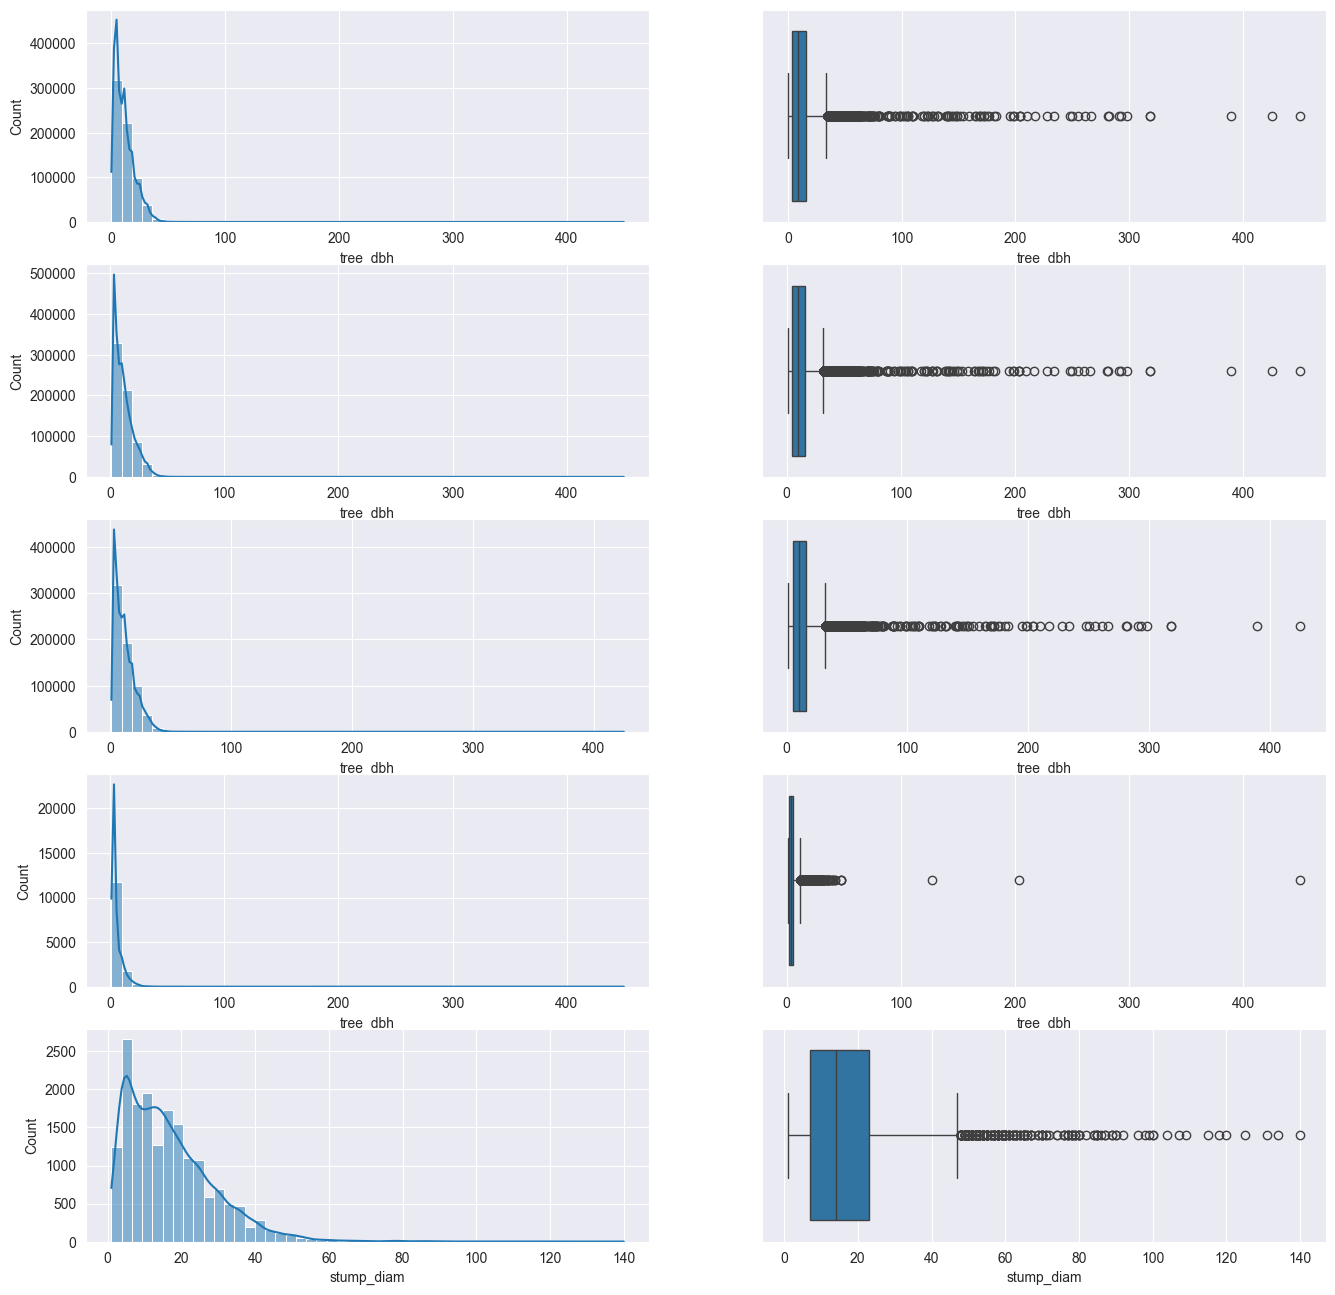

In [331]:
fig, axes = plt.subplots(5, 2, figsize=(16,16))

sns.histplot(data=tree_sub_df, x="tree_dbh", bins=50, kde=True, ax=axes[0, 0])
sns.boxplot(data=tree_sub_df, x="tree_dbh", ax=axes[0, 1])

sns.histplot(data=alive_and_dead_trees, x="tree_dbh", bins=50, kde=True, ax=axes[1, 0])
sns.boxplot(data=alive_and_dead_trees, x="tree_dbh", ax=axes[1, 1])

sns.histplot(data=alive_trees, x="tree_dbh", bins=50, kde=True, ax=axes[2, 0])
sns.boxplot(data=alive_trees, x="tree_dbh", ax=axes[2, 1])

sns.histplot(data=dead_trees, x="tree_dbh", bins=50, kde=True, ax=axes[3, 0])
sns.boxplot(data=dead_trees, x="tree_dbh", ax=axes[3, 1])

sns.histplot(data=stumps, x="stump_diam", bins=50, kde=True, ax=axes[4, 0])
sns.boxplot(data=stumps, x="stump_diam", ax=axes[4, 1]);

#### 1. Identifying Outliers in Alive trees 

Positive skewness for `alive_trees` indicates a right-skewed distribution (Hence we will use **IQR method** to **handle outliers**)

In [332]:
alive_trees["tree_dbh"].skew()

2.3286349467082963

In `alive_trees`, finding the skew of the distribution of `tree_dbh` values for each species (All are right skewed)

In [333]:
alive_trees_skew = alive_trees.groupby("spc_latin")[["tree_dbh"]].skew().reset_index().rename(columns= {"tree_dbh": "skew"}).sort_values("skew", ascending=True)
alive_trees_skew

spc_latin       skew
17            Aesculus Hippocastanum   0.228813
29                      Carya Glabra   0.317562
116                 Salix Babylonica   0.554924
90                  Pinus Sylvestris   0.560649
12                  Acer Saccharinum   0.581230
..                               ...        ...
9    Acer Platanoides 'Crimson King'   9.799049
101                 Pyrus Calleryana  12.621013
67           Liriodendron Tulipifera  14.192528
96                            Prunus  14.943006
104                  Quercus Bicolor  40.785497

[133 rows x 2 columns]

Finding certain descriptive statistics for each tree species in `alive_trees` and storing them in `alive_trees_stats`

In [334]:
alive_trees_stats = alive_trees.groupby("spc_latin")["tree_dbh"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]).reset_index()[["spc_latin", "count", "min", "max", "25%", "50%", "75%", "90%", "95%"]]
alive_trees_stats

spc_latin    count  min    max  25%   50%   75%   90%   95%
0                 Acer   7080.0  1.0   59.0  7.0  11.0  15.0  20.0  24.0
1    Acer Buergerianum    110.0  2.0   28.0  5.0   8.0  10.0  12.0  14.1
2       Acer Campestre   2550.0  1.0   64.0  4.0   6.0   9.0  12.0  15.0
3         Acer Ginnala   2049.0  1.0   40.0  4.0   7.0  10.0  13.0  16.0
4         Acer Griseum    220.0  1.0   30.0  2.0   2.0   3.0   6.0  10.1
..                 ...      ...  ...    ...  ...   ...   ...   ...   ...
128   Tsuga Canadensis     88.0  1.0   21.0  2.0   4.0   7.0  11.0  12.3
129    Ulmus Americana   7975.0  1.0   65.0  4.0  10.0  17.0  25.0  31.0
130   Ulmus Parvifolia   5345.0  1.0  118.0  3.0   5.0  10.0  15.0  18.0
131       Ulmus Pumila   1595.0  1.0  149.0  4.0   9.0  17.0  23.0  28.0
132    Zelkova Serrata  29258.0  1.0  210.0  4.0   6.0  11.0  15.0  18.0

[133 rows x 9 columns]

Creating calculated columns (`IQR`, `lower_limit`, `upper_limit`) for outlier identification. Then merging `alive_trees_stats` with `alive_trees_skew` to get the `skew` for each tree species

In [335]:
alive_trees_stats["IQR"] = alive_trees_stats["75%"] - alive_trees_stats["25%"]
alive_trees_stats["lower_limit"] = alive_trees_stats["25%"] - (1.5 * alive_trees_stats["IQR"])
alive_trees_stats["upper_limit"] = alive_trees_stats["75%"] + (1.5 * alive_trees_stats["IQR"])
alive_trees_stats = alive_trees_stats.merge(alive_trees_skew, on="spc_latin", how="inner") # Merging the two dfs to get the calculated skew column
alive_trees_stats.sort_values("skew", ascending=True)

spc_latin    count  min    max   25%   50%   75%  \
17            Aesculus Hippocastanum   1096.0  1.0   41.0   4.0  15.0  21.0   
29                      Carya Glabra     99.0  2.0   40.0   7.5  15.0  21.0   
116                 Salix Babylonica    282.0  1.0   41.0   7.0  14.0  23.0   
90                  Pinus Sylvestris     25.0  1.0   28.0   3.0   8.0  17.0   
12                  Acer Saccharinum  12277.0  1.0  168.0  13.0  21.0  28.0   
..                               ...      ...  ...    ...   ...   ...   ...   
9    Acer Platanoides 'Crimson King'   5923.0  1.0  172.0   7.0  10.0  13.0   
101                 Pyrus Calleryana  58931.0  1.0  298.0   6.0   8.0  11.0   
67           Liriodendron Tulipifera   1076.0  1.0  389.0   4.0   5.0  12.0   
96                            Prunus  29279.0  1.0  291.0   3.0   5.0   7.0   
104                  Quercus Bicolor   6598.0  1.0  425.0   3.0   4.0   5.0   

      90%   95%   IQR  lower_limit  upper_limit       skew  
17   26.0  29.0  17.0       -21.50        46.50   0.228813  
29   29.0  31.1  13.5       -12.75        41.25   0.317562  
116  29.0  35.0  16.0       -17.00        47.00   0.554924  
90   19.2  20.0  14.0       -18.00        38.00   0.560649  
12   34.0  38.0  15.0        -9.50        50.50   0.581230  
..    ...   ...   ...          ...          ...        ...  
9    16.0  18.0   6.0        -2.00        22.00   9.799049  
101  14.0  17.0   5.0        -1.50        18.50  12.621013  
67   27.5  34.0   8.0        -8.00        24.00  14.192528  
96   10.0  12.0   4.0        -3.00        13.00  14.943006  
104   8.0  11.0   2.0         0.00         8.00  40.785497  

[133 rows x 13 columns]

Merging `alive_trees` with `alive_trees_stats` to add the descriptive statistics to each tree row and setting the index of the merged `df` to match the index of `alive_trees`

In [336]:
alive_trees = alive_trees.merge(alive_trees_stats, on="spc_latin", how="left").set_axis(alive_trees.index)
alive_trees

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

Descriptive statistics for trees that do not have the species name

In [337]:
alive_trees_stats[alive_trees_stats["spc_latin"] == "No Observation"]

spc_latin  count  min   max  25%  50%   75%   90%   95%  IQR  \
76  No Observation    5.0  3.0  40.0  4.0  5.0  11.0  28.4  34.2  7.0   

    lower_limit  upper_limit      skew  
76         -6.5         21.5  2.030388

Making an `outliers` mask that includes all alive trees with diameter above the `upper_limit` and below the `lower_limit` of each species and excluding the 5 trees, whose species names (`spc_latin`) are not provided. Storing the outliers in `alive_trees_outliers`

In [338]:
outliers = ( ( (alive_trees["tree_dbh"] > alive_trees["upper_limit"]) | (alive_trees["tree_dbh"] < alive_trees["lower_limit"]) ) & (alive_trees["spc_latin"] != "No Observation") )
alive_trees_outliers = alive_trees[outliers].sort_values("tree_dbh", ascending=False)
alive_trees_outliers

tree_id created_at  tree_dbh  stump_diam status health  \
2403     168583 2015-08-23     425.0         0.0  Alive   Good   
180951   370606 2015-10-23     389.0         0.0  Alive   Fair   
201184   418433 2015-11-03     318.0         0.0  Alive   Good   
270474   476317 2015-11-20     318.0         0.0  Alive   Good   
227041   409369 2015-10-31     298.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
304611   496169 2015-12-04       1.0         0.0  Alive   Good   
427186   640091 2016-07-25       1.0         0.0  Alive   Good   
248486   433282 2015-11-05       1.0         0.0  Alive   Good   
182181   288306 2015-10-06       1.0         0.0  Alive   Good   
50006    163546 2015-08-21       1.0         0.0  Alive   Fair   

                               spc_latin           spc_common steward  \
2403                     Quercus Bicolor      Swamp White Oak    1or2   
180951           Liriodendron Tulipifera         Tulip-Poplar    None   
201184             Platanus X Acerifolia     London Planetree    None   
270474                 Quercus Palustris              Pin Oak    None   
227041                  Pyrus Calleryana         Callery Pear    None   
...                                  ...                  ...     ...   
304611                         Crataegus             Hawthorn    1or2   
427186  Crataegus Crusgalli Var. Inermis    Cockspur Hawthorn    None   
248486                         Crataegus             Hawthorn    1or2   
182181                Syringa Reticulata  Japanese Tree Lilac    None   
50006                 Syringa Reticulata  Japanese Tree Lilac    None   

         guards  sidewalk         user_type root_stone root_grate root_other  \
2403       None    Damage   NYC Parks Staff         No         No         No   
180951     None    Damage   NYC Parks Staff         No         No         No   
201184     None  NoDamage   NYC Parks Staff         No         No         No   
270474     None  NoDamage  TreesCount Staff         No         No         No   
227041     None  NoDamage  TreesCount Staff         No         No         No   
...         ...       ...               ...        ...        ...        ...   
304611     None  NoDamage  TreesCount Staff         No         No         No   
427186     None  NoDamage   NYC Parks Staff         No         No         No   
248486     None    Damage  TreesCount Staff         No         No         No   
182181  Helpful  NoDamage   NYC Parks Staff         No         No         No   
50006      None  NoDamage   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
2403           No         No         No         No        No         No   
180951         No         No         No         No        No         No   
201184         No         No         No        Yes        No         No   
270474         No         No         No         No        No         No   
227041         No         No         No        Yes        No         No   
...           ...        ...        ...        ...       ...        ...   
304611         No         No         No         No        No         No   
427186         No         No         No         No        No         No   
248486         No         No         No         No        No         No   
182181         No         No         No         No        No         No   
50006          No         No         No         No        No         No   

       borocode        borough   nta  \
2403          3       Brooklyn  BK61   
180951        4         Queens  QN66   
201184        3       Brooklyn  BK83   
270474        1      Manhattan  MN35   
227041        5  Staten Island  SI01   
...         ...            ...   ...   
304611        2          Bronx  BX09   
427186        4         Queens  QN45   
248486        3       Brooklyn  BK82   
182181        5  Staten Island  SI35   
50006         3       Brooklyn  BK17

Making a copy of `alive_trees_outliers`: `alive_trees_outliers_capped`. This copy will be used for further outlier handling while `alive_trees_outliers` will be used for outlier analysis at a later stage

In [339]:
alive_trees_outliers_capped = alive_trees_outliers.copy()
alive_trees_outliers

tree_id created_at  tree_dbh  stump_diam status health  \
2403     168583 2015-08-23     425.0         0.0  Alive   Good   
180951   370606 2015-10-23     389.0         0.0  Alive   Fair   
201184   418433 2015-11-03     318.0         0.0  Alive   Good   
270474   476317 2015-11-20     318.0         0.0  Alive   Good   
227041   409369 2015-10-31     298.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
304611   496169 2015-12-04       1.0         0.0  Alive   Good   
427186   640091 2016-07-25       1.0         0.0  Alive   Good   
248486   433282 2015-11-05       1.0         0.0  Alive   Good   
182181   288306 2015-10-06       1.0         0.0  Alive   Good   
50006    163546 2015-08-21       1.0         0.0  Alive   Fair   

                               spc_latin           spc_common steward  \
2403                     Quercus Bicolor      Swamp White Oak    1or2   
180951           Liriodendron Tulipifera         Tulip-Poplar    None   
201184             Platanus X Acerifolia     London Planetree    None   
270474                 Quercus Palustris              Pin Oak    None   
227041                  Pyrus Calleryana         Callery Pear    None   
...                                  ...                  ...     ...   
304611                         Crataegus             Hawthorn    1or2   
427186  Crataegus Crusgalli Var. Inermis    Cockspur Hawthorn    None   
248486                         Crataegus             Hawthorn    1or2   
182181                Syringa Reticulata  Japanese Tree Lilac    None   
50006                 Syringa Reticulata  Japanese Tree Lilac    None   

         guards  sidewalk         user_type root_stone root_grate root_other  \
2403       None    Damage   NYC Parks Staff         No         No         No   
180951     None    Damage   NYC Parks Staff         No         No         No   
201184     None  NoDamage   NYC Parks Staff         No         No         No   
270474     None  NoDamage  TreesCount Staff         No         No         No   
227041     None  NoDamage  TreesCount Staff         No         No         No   
...         ...       ...               ...        ...        ...        ...   
304611     None  NoDamage  TreesCount Staff         No         No         No   
427186     None  NoDamage   NYC Parks Staff         No         No         No   
248486     None    Damage  TreesCount Staff         No         No         No   
182181  Helpful  NoDamage   NYC Parks Staff         No         No         No   
50006      None  NoDamage   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
2403           No         No         No         No        No         No   
180951         No         No         No         No        No         No   
201184         No         No         No        Yes        No         No   
270474         No         No         No         No        No         No   
227041         No         No         No        Yes        No         No   
...           ...        ...        ...        ...       ...        ...   
304611         No         No         No         No        No         No   
427186         No         No         No         No        No         No   
248486         No         No         No         No        No         No   
182181         No         No         No         No        No         No   
50006          No         No         No         No        No         No   

       borocode        borough   nta  \
2403          3       Brooklyn  BK61   
180951        4         Queens  QN66   
201184        3       Brooklyn  BK83   
270474        1      Manhattan  MN35   
227041        5  Staten Island  SI01   
...         ...            ...   ...   
304611        2          Bronx  BX09   
427186        4         Queens  QN45   
248486        3       Brooklyn  BK82   
182181        5  Staten Island  SI35   
50006         3       Brooklyn  BK17

#### 2. Handling Outliers in Alive trees (by Winsorization)

Making `lower_limit` and `upper_limit` masks to replace the outlier `tree_dbh` values with the `lower_limit` or `upper_limit` values of each tree species

In [340]:
lower_limit = ( alive_trees_outliers_capped["tree_dbh"] < alive_trees_outliers_capped["lower_limit"] )
alive_trees_outliers_capped.loc[lower_limit, "tree_dbh"] = alive_trees_outliers_capped["lower_limit"]

upper_limit = ( alive_trees_outliers_capped["tree_dbh"] > alive_trees_outliers_capped["upper_limit"] )
alive_trees_outliers_capped.loc[upper_limit, "tree_dbh"] = alive_trees_outliers_capped["upper_limit"]

alive_trees_outliers_capped

tree_id created_at  tree_dbh  stump_diam status health  \
2403     168583 2015-08-23       8.0         0.0  Alive   Good   
180951   370606 2015-10-23      24.0         0.0  Alive   Fair   
201184   418433 2015-11-03      43.5         0.0  Alive   Good   
270474   476317 2015-11-20      48.0         0.0  Alive   Good   
227041   409369 2015-10-31      18.5         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
304611   496169 2015-12-04       1.5         0.0  Alive   Good   
427186   640091 2016-07-25       1.5         0.0  Alive   Good   
248486   433282 2015-11-05       1.5         0.0  Alive   Good   
182181   288306 2015-10-06       1.5         0.0  Alive   Good   
50006    163546 2015-08-21       1.5         0.0  Alive   Fair   

                               spc_latin           spc_common steward  \
2403                     Quercus Bicolor      Swamp White Oak    1or2   
180951           Liriodendron Tulipifera         Tulip-Poplar    None   
201184             Platanus X Acerifolia     London Planetree    None   
270474                 Quercus Palustris              Pin Oak    None   
227041                  Pyrus Calleryana         Callery Pear    None   
...                                  ...                  ...     ...   
304611                         Crataegus             Hawthorn    1or2   
427186  Crataegus Crusgalli Var. Inermis    Cockspur Hawthorn    None   
248486                         Crataegus             Hawthorn    1or2   
182181                Syringa Reticulata  Japanese Tree Lilac    None   
50006                 Syringa Reticulata  Japanese Tree Lilac    None   

         guards  sidewalk         user_type root_stone root_grate root_other  \
2403       None    Damage   NYC Parks Staff         No         No         No   
180951     None    Damage   NYC Parks Staff         No         No         No   
201184     None  NoDamage   NYC Parks Staff         No         No         No   
270474     None  NoDamage  TreesCount Staff         No         No         No   
227041     None  NoDamage  TreesCount Staff         No         No         No   
...         ...       ...               ...        ...        ...        ...   
304611     None  NoDamage  TreesCount Staff         No         No         No   
427186     None  NoDamage   NYC Parks Staff         No         No         No   
248486     None    Damage  TreesCount Staff         No         No         No   
182181  Helpful  NoDamage   NYC Parks Staff         No         No         No   
50006      None  NoDamage   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
2403           No         No         No         No        No         No   
180951         No         No         No         No        No         No   
201184         No         No         No        Yes        No         No   
270474         No         No         No         No        No         No   
227041         No         No         No        Yes        No         No   
...           ...        ...        ...        ...       ...        ...   
304611         No         No         No         No        No         No   
427186         No         No         No         No        No         No   
248486         No         No         No         No        No         No   
182181         No         No         No         No        No         No   
50006          No         No         No         No        No         No   

       borocode        borough   nta  \
2403          3       Brooklyn  BK61   
180951        4         Queens  QN66   
201184        3       Brooklyn  BK83   
270474        1      Manhattan  MN35   
227041        5  Staten Island  SI01   
...         ...            ...   ...   
304611        2          Bronx  BX09   
427186        4         Queens  QN45   
248486        3       Brooklyn  BK82   
182181        5  Staten Island  SI35   
50006         3       Brooklyn  BK17

All outliers capped, no rows match the outlier conditions after winsorization

In [341]:
alive_trees_outliers_capped[( alive_trees_outliers_capped["tree_dbh"] < alive_trees_outliers_capped["lower_limit"] ) | ( alive_trees_outliers_capped["tree_dbh"] > alive_trees_outliers_capped["upper_limit"] ) | ( alive_trees_outliers_capped["spc_latin"] == "No Observation" )].shape[0]

0

Updating the rows of `tree_sub_df` that have the same indices as the rows of `alive_trees_outliers_capped` with its corresponding values

In [342]:
tree_sub_df.update(alive_trees_outliers_capped)
tree_sub_df

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

**Checking if the two `df`s (`df1` and `df2`) mentioned below are identical:**

`df1` is obtained by filtering the rows in `tree_sub_df` that have the same index as`alive_trees_outliers_capped` and then sorting it based on its index.

`df2` is obtained by dropping the extra columns in `alive_trees_outliers_capped` and then sorting it based on its index.

In [343]:
tree_sub_df[tree_sub_df.index.isin(alive_trees_outliers_capped.index)].sort_index(ascending=True).equals(alive_trees_outliers_capped.drop(["count", "min", "max", "25%", "50%", "75%", "90%", "95%", "IQR", "lower_limit", "upper_limit", "skew"], axis=1).sort_index(ascending=True))

True

#### 3. Identifying Outliers in Dead trees

In [344]:
dead_trees

tree_id created_at  tree_dbh  stump_diam status          health  \
195      208322 2015-09-07      10.0         0.0   Dead  Not Applicable   
208      209058 2015-09-08       6.0         0.0   Dead  Not Applicable   
265      210544 2015-09-08       6.0         0.0   Dead  Not Applicable   
284      188609 2015-08-30       9.0         0.0   Dead  Not Applicable   
429      189412 2015-08-30       7.0         0.0   Dead  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
682760   184342 2015-08-29      11.0         0.0   Dead  Not Applicable   
682767   155430 2015-08-18       2.0         0.0   Dead  Not Applicable   
683290   156566 2015-08-18      10.0         0.0   Dead  Not Applicable   
683637   156162 2015-08-18       3.0         0.0   Dead  Not Applicable   
683642   193791 2015-09-01       3.0         0.0   Dead  Not Applicable   

             spc_latin      spc_common         steward          guards  \
195     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
208     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
265     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
284     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
429     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
682760  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
682767  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683290  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683637  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683642  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
195     Not Applicable         Volunteer         No         No         No   
208     Not Applicable  TreesCount Staff         No         No         No   
265     Not Applicable         Volunteer         No         No         No   
284     Not Applicable         Volunteer         No         No         No   
429     Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
682760  Not Applicable         Volunteer         No         No         No   
682767  Not Applicable         Volunteer         No         No         No   
683290  Not Applicable         Volunteer         No         No         No   
683637  Not Applicable         Volunteer         No         No         No   
683642  Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
195            No         No         No         No        No         No   
208            No         No         No         No        No         No   
265            No         No         No         No        No         No   
284            No         No         No         No        No         No   
429            No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
682760         No         No         No         No        No         No   
682767         No         No         No         No        No         No   
683290         No         No         No         No        No         No   
683637         No         No         No         No        No         No   
683642         No         No         No         No        No         No   

       borocode        borough   nta                       nta_name  \
195           3       Brooklyn  BK77                 Bushwick North   
208           5  Staten Island  SI25          Oakwood-Oakwood Beach   
265           3       Brooklyn  BK76                     Greenpoint   
284           1      Manhattan  MN32                      Yorkville   
429           1      Manhattan  MN09 

Positive skewness for `dead_trees` indicates a right-skewed distribution (Hence we will use **IQR method** to **handle outliers**)

In [345]:
dead_trees["tree_dbh"].skew()

27.582197613544523

The species name properties (`spc_latin` and `spc_common`) are not recorded for the dead trees, hence overall upper and lower limits will be calculated for the distribution to handle outliers.

In [346]:
dead_trees["spc_latin"].value_counts(dropna=False)

spc_latin
Not Applicable    13905
Name: count, dtype: int64

Finding certain descriptive statistics for `dead_trees`

In [347]:
dead_trees["tree_dbh"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95])

count    13905.000000
mean         5.492485
std          6.410833
min          1.000000
5%           2.000000
25%          2.000000
50%          4.000000
75%          6.000000
90%         12.000000
95%         16.000000
max        450.000000
Name: tree_dbh, dtype: float64

Finding **Q1**, **Q3**, **IQR**, **lower_limit** and **upper_limit** for outlier identification

In [348]:
Q1 = dead_trees["tree_dbh"].quantile(0.25)
Q3 = dead_trees["tree_dbh"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
Q1, Q3, IQR, lower_limit, upper_limit

(2.0, 6.0, 4.0, -4.0, 12.0)

Making an `outliers` mask that includes all dead trees with diameter above the `upper_limit` and below the `lower_limit`. Storing the outliers in `dead_trees_outliers`

In [349]:
outliers = ( (dead_trees["tree_dbh"] > upper_limit) | (dead_trees["tree_dbh"] < lower_limit) )
dead_trees_outliers = dead_trees[outliers].sort_values("tree_dbh", ascending=False)
dead_trees_outliers

tree_id created_at  tree_dbh  stump_diam status          health  \
228032   433258 2015-11-05     450.0         0.0   Dead  Not Applicable   
481346   703610 2016-09-08     204.0         0.0   Dead  Not Applicable   
682732   183910 2015-08-29     127.0         0.0   Dead  Not Applicable   
505860   699936 2016-09-06      48.0         0.0   Dead  Not Applicable   
276512   477916 2015-11-22      48.0         0.0   Dead  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
290007   506437 2015-12-09      13.0         0.0   Dead  Not Applicable   
101193   275724 2015-10-01      13.0         0.0   Dead  Not Applicable   
142747   353059 2015-10-20      13.0         0.0   Dead  Not Applicable   
519759     4904 2015-05-28      13.0         0.0   Dead  Not Applicable   
317375   532658 2015-12-23      13.0         0.0   Dead  Not Applicable   

             spc_latin      spc_common         steward          guards  \
228032  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
481346  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
682732  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
505860  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276512  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
290007  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
101193  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
142747  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
519759  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
317375  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
228032  Not Applicable  TreesCount Staff         No         No         No   
481346  Not Applicable  TreesCount Staff         No         No         No   
682732  Not Applicable         Volunteer         No         No         No   
505860  Not Applicable  TreesCount Staff         No         No         No   
276512  Not Applicable   NYC Parks Staff         No         No         No   
...                ...               ...        ...        ...        ...   
290007  Not Applicable   NYC Parks Staff         No         No         No   
101193  Not Applicable   NYC Parks Staff         No         No         No   
142747  Not Applicable   NYC Parks Staff         No         No         No   
519759  Not Applicable   NYC Parks Staff         No         No         No   
317375  Not Applicable   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
228032         No         No         No         No        No         No   
481346         No         No         No         No        No         No   
682732         No         No         No         No        No         No   
505860         No         No         No         No        No         No   
276512         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
290007         No         No         No         No        No         No   
101193         No         No         No         No        No         No   
142747         No         No         No         No        No         No   
519759         No         No         No         No        No         No   
317375         No         No         No         No        No         No   

       borocode        borough   nta  \
228032        2          Bronx  BX09   
481346        4         Queens  QN57   
682732        2          Bronx  BX17   
505860        4         Queens  QN51   
276512        5  Staten Island  SI28   
...         ...            ...   ...   
290007        5  Staten Island  SI32   
101193        4         Queens  QN44   
142747        2          Bronx  

Making a copy of `dead_trees_outliers`: `dead_trees_outliers_capped`. This copy will be used for further outlier handling while `dead_trees_outliers` will be used for outlier analysis at a later stage

In [350]:
dead_trees_outliers_capped = dead_trees_outliers.copy()
dead_trees_outliers_capped

tree_id created_at  tree_dbh  stump_diam status          health  \
228032   433258 2015-11-05     450.0         0.0   Dead  Not Applicable   
481346   703610 2016-09-08     204.0         0.0   Dead  Not Applicable   
682732   183910 2015-08-29     127.0         0.0   Dead  Not Applicable   
505860   699936 2016-09-06      48.0         0.0   Dead  Not Applicable   
276512   477916 2015-11-22      48.0         0.0   Dead  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
290007   506437 2015-12-09      13.0         0.0   Dead  Not Applicable   
101193   275724 2015-10-01      13.0         0.0   Dead  Not Applicable   
142747   353059 2015-10-20      13.0         0.0   Dead  Not Applicable   
519759     4904 2015-05-28      13.0         0.0   Dead  Not Applicable   
317375   532658 2015-12-23      13.0         0.0   Dead  Not Applicable   

             spc_latin      spc_common         steward          guards  \
228032  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
481346  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
682732  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
505860  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276512  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
290007  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
101193  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
142747  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
519759  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
317375  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
228032  Not Applicable  TreesCount Staff         No         No         No   
481346  Not Applicable  TreesCount Staff         No         No         No   
682732  Not Applicable         Volunteer         No         No         No   
505860  Not Applicable  TreesCount Staff         No         No         No   
276512  Not Applicable   NYC Parks Staff         No         No         No   
...                ...               ...        ...        ...        ...   
290007  Not Applicable   NYC Parks Staff         No         No         No   
101193  Not Applicable   NYC Parks Staff         No         No         No   
142747  Not Applicable   NYC Parks Staff         No         No         No   
519759  Not Applicable   NYC Parks Staff         No         No         No   
317375  Not Applicable   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
228032         No         No         No         No        No         No   
481346         No         No         No         No        No         No   
682732         No         No         No         No        No         No   
505860         No         No         No         No        No         No   
276512         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
290007         No         No         No         No        No         No   
101193         No         No         No         No        No         No   
142747         No         No         No         No        No         No   
519759         No         No         No         No        No         No   
317375         No         No         No         No        No         No   

       borocode        borough   nta  \
228032        2          Bronx  BX09   
481346        4         Queens  QN57   
682732        2          Bronx  BX17   
505860        4         Queens  QN51   
276512        5  Staten Island  SI28   
...         ...            ...   ...   
290007        5  Staten Island  SI32   
101193        4         Queens  QN44   
142747        2          Bronx  

#### 4. Handling Outliers in Dead trees (by Winsorization)

Making `lower_limit_trees` and `upper_limit_trees` masks to replace the outlier `tree_dbh` values with the `lower_limit` or `upper_limit` values of the distribution of `dead_trees`

In [351]:
lower_limit_trees = (dead_trees_outliers_capped["tree_dbh"] < lower_limit)
dead_trees_outliers_capped.loc[lower_limit_trees, "tree_dbh"] = lower_limit

upper_limit_trees = (dead_trees_outliers_capped["tree_dbh"] > upper_limit)
dead_trees_outliers_capped.loc[upper_limit_trees, "tree_dbh"] = upper_limit

dead_trees_outliers_capped

tree_id created_at  tree_dbh  stump_diam status          health  \
228032   433258 2015-11-05      12.0         0.0   Dead  Not Applicable   
481346   703610 2016-09-08      12.0         0.0   Dead  Not Applicable   
682732   183910 2015-08-29      12.0         0.0   Dead  Not Applicable   
505860   699936 2016-09-06      12.0         0.0   Dead  Not Applicable   
276512   477916 2015-11-22      12.0         0.0   Dead  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
290007   506437 2015-12-09      12.0         0.0   Dead  Not Applicable   
101193   275724 2015-10-01      12.0         0.0   Dead  Not Applicable   
142747   353059 2015-10-20      12.0         0.0   Dead  Not Applicable   
519759     4904 2015-05-28      12.0         0.0   Dead  Not Applicable   
317375   532658 2015-12-23      12.0         0.0   Dead  Not Applicable   

             spc_latin      spc_common         steward          guards  \
228032  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
481346  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
682732  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
505860  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276512  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
290007  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
101193  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
142747  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
519759  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
317375  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
228032  Not Applicable  TreesCount Staff         No         No         No   
481346  Not Applicable  TreesCount Staff         No         No         No   
682732  Not Applicable         Volunteer         No         No         No   
505860  Not Applicable  TreesCount Staff         No         No         No   
276512  Not Applicable   NYC Parks Staff         No         No         No   
...                ...               ...        ...        ...        ...   
290007  Not Applicable   NYC Parks Staff         No         No         No   
101193  Not Applicable   NYC Parks Staff         No         No         No   
142747  Not Applicable   NYC Parks Staff         No         No         No   
519759  Not Applicable   NYC Parks Staff         No         No         No   
317375  Not Applicable   NYC Parks Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
228032         No         No         No         No        No         No   
481346         No         No         No         No        No         No   
682732         No         No         No         No        No         No   
505860         No         No         No         No        No         No   
276512         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
290007         No         No         No         No        No         No   
101193         No         No         No         No        No         No   
142747         No         No         No         No        No         No   
519759         No         No         No         No        No         No   
317375         No         No         No         No        No         No   

       borocode        borough   nta  \
228032        2          Bronx  BX09   
481346        4         Queens  QN57   
682732        2          Bronx  BX17   
505860        4         Queens  QN51   
276512        5  Staten Island  SI28   
...         ...            ...   ...   
290007        5  Staten Island  SI32   
101193        4         Queens  QN44   
142747        2          Bronx  

All outliers capped, no rows match the outlier conditions after winsorization

In [352]:
dead_trees_outliers_capped[( (dead_trees_outliers_capped["tree_dbh"] < lower_limit) | (dead_trees_outliers_capped["tree_dbh"] > upper_limit) )].shape[0]

0

Updating the rows of `tree_sub_df` that have the same indices as the rows of `dead_trees_outliers_capped` with its corresponding values

In [353]:
tree_sub_df.update(dead_trees_outliers_capped)
tree_sub_df

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

**Checking if the two `df`s (`df1` and `df2`) mentioned below are identical:**

`df1` is obtained by filtering the rows in `tree_sub_df` that have the same index as `dead_trees_outliers_capped` and then sorting it based on its index.

`df2` is obtained by sorting `dead_trees_outliers_capped based` on its index.

In [354]:
tree_sub_df[tree_sub_df.index.isin(dead_trees_outliers_capped.index)].sort_index(ascending=True).equals(dead_trees_outliers_capped.sort_index(ascending=True))

True

#### 5. Identifying Outliers in Stumps

In [355]:
stumps

tree_id created_at  tree_dbh  stump_diam status          health  \
37       211205 2015-09-09       0.0        16.0  Stump  Not Applicable   
238      203597 2015-09-04       0.0        15.0  Stump  Not Applicable   
640      179766 2015-08-27       0.0        30.0  Stump  Not Applicable   
643      180619 2015-08-27       0.0        10.0  Stump  Not Applicable   
644      208828 2015-09-08       0.0        15.0  Stump  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
683292   152836 2015-08-17       0.0        13.0  Stump  Not Applicable   
683630   191219 2015-08-31       0.0        25.0  Stump  Not Applicable   
683639   170888 2015-08-24       0.0         5.0  Stump  Not Applicable   
683641   177922 2015-08-26       0.0        17.0  Stump  Not Applicable   
683643   172660 2015-08-25       0.0         4.0  Stump  Not Applicable   

             spc_latin      spc_common         steward          guards  \
37      Not Applicable  Not Applicable  Not Applicable  Not Applicable   
238     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
640     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
643     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
644     Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
683292  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683630  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683639  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683641  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
683643  Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
37      Not Applicable  TreesCount Staff         No         No         No   
238     Not Applicable         Volunteer         No         No         No   
640     Not Applicable  TreesCount Staff         No         No         No   
643     Not Applicable  TreesCount Staff         No         No         No   
644     Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
683292  Not Applicable         Volunteer         No         No         No   
683630  Not Applicable   NYC Parks Staff         No         No         No   
683639  Not Applicable  TreesCount Staff         No         No         No   
683641  Not Applicable         Volunteer         No         No         No   
683643  Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
37             No         No         No         No        No         No   
238            No         No         No         No        No         No   
640            No         No         No         No        No         No   
643            No         No         No         No        No         No   
644            No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683292         No         No         No         No        No         No   
683630         No         No         No         No        No         No   
683639         No         No         No         No        No         No   
683641         No         No         No         No        No         No   
683643         No         No         No         No        No         No   

       borocode        borough   nta  \
37            4         Queens  QN72   
238           4         Queens  QN72   
640           3       Brooklyn  BK42   
643           4         Queens  QN17   
644           1      Manhattan  MN31   
...         ...            ...   ...   
683292        3       Brooklyn  BK73   
683630        4         Queens  QN46   
683639        3       Brooklyn  

Positive skewness for `stumps` indicates a right-skewed distribution (Hence we will use **IQR method** to **handle outliers**)

In [356]:
stumps["stump_diam"].skew()

1.5931857144481625

The species name properties (`spc_latin` and `spc_common`) are not recorded for stumps, hence overall upper and lower limits will be calculated for the distribution to handle outliers.

In [357]:
stumps["spc_latin"].value_counts(dropna=False)

spc_latin
Not Applicable    17654
Name: count, dtype: int64

Finding certain descriptive statistics for `stumps`

In [358]:
stumps["stump_diam"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.95])

count    17654.000000
mean        16.750481
std         12.082281
min          1.000000
5%           3.000000
25%          7.000000
50%         14.000000
75%         23.000000
90%         33.000000
95%         39.000000
max        140.000000
Name: stump_diam, dtype: float64

Finding **Q1**, **Q3**, **IQR**, **lower_limit** and **upper_limit** for outlier identification

In [359]:
Q1 = stumps["stump_diam"].quantile(0.25)
Q3 = stumps["stump_diam"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
Q1, Q3, IQR, lower_limit, upper_limit

(7.0, 23.0, 16.0, -17.0, 47.0)

Making an `outliers` mask that includes all stumps with diameter above the `upper_limit` and below the `lower_limit`. Storing the outliers in `stumps_outliers`

In [360]:
outliers = ( (stumps["stump_diam"] > upper_limit) | (stumps["stump_diam"] < lower_limit) )
stumps_outliers = stumps[outliers].sort_values("stump_diam", ascending=False)
stumps_outliers

tree_id created_at  tree_dbh  stump_diam status          health  \
11338    206819 2015-09-06       0.0       140.0  Stump  Not Applicable   
89531    286364 2015-10-06       0.0       134.0  Stump  Not Applicable   
137305   319640 2015-10-13       0.0       131.0  Stump  Not Applicable   
497803   711302 2016-09-13       0.0       125.0  Stump  Not Applicable   
543237    35364 2015-06-25       0.0       120.0  Stump  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
304011   512485 2015-12-11       0.0        48.0  Stump  Not Applicable   
291974   566147 2016-05-25       0.0        48.0  Stump  Not Applicable   
276056   486677 2015-11-28       0.0        48.0  Stump  Not Applicable   
398098   599293 2016-06-23       0.0        48.0  Stump  Not Applicable   
5937     201970 2015-09-04       0.0        48.0  Stump  Not Applicable   

             spc_latin      spc_common         steward          guards  \
11338   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
89531   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
137305  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
497803  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
543237  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
304011  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
291974  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276056  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
398098  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
5937    Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
11338   Not Applicable  TreesCount Staff         No         No         No   
89531   Not Applicable   NYC Parks Staff         No         No         No   
137305  Not Applicable   NYC Parks Staff         No         No         No   
497803  Not Applicable   NYC Parks Staff         No         No         No   
543237  Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
304011  Not Applicable  TreesCount Staff         No         No         No   
291974  Not Applicable  TreesCount Staff         No         No         No   
276056  Not Applicable  TreesCount Staff         No         No         No   
398098  Not Applicable  TreesCount Staff         No         No         No   
5937    Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
11338          No         No         No         No        No         No   
89531          No         No         No         No        No         No   
137305         No         No         No         No        No         No   
497803         No         No         No         No        No         No   
543237         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
304011         No         No         No         No        No         No   
291974         No         No         No         No        No         No   
276056         No         No         No         No        No         No   
398098         No         No         No         No        No         No   
5937           No         No         No         No        No         No   

       borocode        borough   nta                         nta_name  \
11338         4         Queens  QN62                  Queensboro Hill   
89531         5  Staten Island  SI35         New Brighton-Silver Lake   
137305        4         Queens  QN52                    East Flushing   
497803        3       Brooklyn  BK88                     Borough Park   
543237        4         Que

Making a copy of `stumps_outliers`: `stumps_outliers_capped`. This copy will be used for further outlier handling while `stumps_outliers` will be used for outlier analysis at a later stage

In [361]:
stumps_outliers_capped = stumps_outliers.copy()
stumps_outliers_capped

tree_id created_at  tree_dbh  stump_diam status          health  \
11338    206819 2015-09-06       0.0       140.0  Stump  Not Applicable   
89531    286364 2015-10-06       0.0       134.0  Stump  Not Applicable   
137305   319640 2015-10-13       0.0       131.0  Stump  Not Applicable   
497803   711302 2016-09-13       0.0       125.0  Stump  Not Applicable   
543237    35364 2015-06-25       0.0       120.0  Stump  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
304011   512485 2015-12-11       0.0        48.0  Stump  Not Applicable   
291974   566147 2016-05-25       0.0        48.0  Stump  Not Applicable   
276056   486677 2015-11-28       0.0        48.0  Stump  Not Applicable   
398098   599293 2016-06-23       0.0        48.0  Stump  Not Applicable   
5937     201970 2015-09-04       0.0        48.0  Stump  Not Applicable   

             spc_latin      spc_common         steward          guards  \
11338   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
89531   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
137305  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
497803  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
543237  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
304011  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
291974  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276056  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
398098  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
5937    Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
11338   Not Applicable  TreesCount Staff         No         No         No   
89531   Not Applicable   NYC Parks Staff         No         No         No   
137305  Not Applicable   NYC Parks Staff         No         No         No   
497803  Not Applicable   NYC Parks Staff         No         No         No   
543237  Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
304011  Not Applicable  TreesCount Staff         No         No         No   
291974  Not Applicable  TreesCount Staff         No         No         No   
276056  Not Applicable  TreesCount Staff         No         No         No   
398098  Not Applicable  TreesCount Staff         No         No         No   
5937    Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
11338          No         No         No         No        No         No   
89531          No         No         No         No        No         No   
137305         No         No         No         No        No         No   
497803         No         No         No         No        No         No   
543237         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
304011         No         No         No         No        No         No   
291974         No         No         No         No        No         No   
276056         No         No         No         No        No         No   
398098         No         No         No         No        No         No   
5937           No         No         No         No        No         No   

       borocode        borough   nta                         nta_name  \
11338         4         Queens  QN62                  Queensboro Hill   
89531         5  Staten Island  SI35         New Brighton-Silver Lake   
137305        4         Queens  QN52                    East Flushing   
497803        3       Brooklyn  BK88                     Borough Park   
543237        4         Que

#### 6. Handling Outliers in Stumps (by Winsorization)

Making `lower_limit_stumps` and `upper_limit_stumps` masks to replace the outlier `stump_diam` values with the `lower_limit` or `upper_limit` values of the distribution of `stumps`

In [362]:
lower_limit_stumps = (stumps_outliers_capped["stump_diam"] < lower_limit)
stumps_outliers_capped.loc[lower_limit_stumps, "stump_diam"] = lower_limit

upper_limit_stumps = (stumps_outliers_capped["stump_diam"] > upper_limit)
stumps_outliers_capped.loc[upper_limit_stumps, "stump_diam"] = upper_limit

stumps_outliers_capped

tree_id created_at  tree_dbh  stump_diam status          health  \
11338    206819 2015-09-06       0.0        47.0  Stump  Not Applicable   
89531    286364 2015-10-06       0.0        47.0  Stump  Not Applicable   
137305   319640 2015-10-13       0.0        47.0  Stump  Not Applicable   
497803   711302 2016-09-13       0.0        47.0  Stump  Not Applicable   
543237    35364 2015-06-25       0.0        47.0  Stump  Not Applicable   
...         ...        ...       ...         ...    ...             ...   
304011   512485 2015-12-11       0.0        47.0  Stump  Not Applicable   
291974   566147 2016-05-25       0.0        47.0  Stump  Not Applicable   
276056   486677 2015-11-28       0.0        47.0  Stump  Not Applicable   
398098   599293 2016-06-23       0.0        47.0  Stump  Not Applicable   
5937     201970 2015-09-04       0.0        47.0  Stump  Not Applicable   

             spc_latin      spc_common         steward          guards  \
11338   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
89531   Not Applicable  Not Applicable  Not Applicable  Not Applicable   
137305  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
497803  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
543237  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
...                ...             ...             ...             ...   
304011  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
291974  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
276056  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
398098  Not Applicable  Not Applicable  Not Applicable  Not Applicable   
5937    Not Applicable  Not Applicable  Not Applicable  Not Applicable   

              sidewalk         user_type root_stone root_grate root_other  \
11338   Not Applicable  TreesCount Staff         No         No         No   
89531   Not Applicable   NYC Parks Staff         No         No         No   
137305  Not Applicable   NYC Parks Staff         No         No         No   
497803  Not Applicable   NYC Parks Staff         No         No         No   
543237  Not Applicable         Volunteer         No         No         No   
...                ...               ...        ...        ...        ...   
304011  Not Applicable  TreesCount Staff         No         No         No   
291974  Not Applicable  TreesCount Staff         No         No         No   
276056  Not Applicable  TreesCount Staff         No         No         No   
398098  Not Applicable  TreesCount Staff         No         No         No   
5937    Not Applicable  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
11338          No         No         No         No        No         No   
89531          No         No         No         No        No         No   
137305         No         No         No         No        No         No   
497803         No         No         No         No        No         No   
543237         No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
304011         No         No         No         No        No         No   
291974         No         No         No         No        No         No   
276056         No         No         No         No        No         No   
398098         No         No         No         No        No         No   
5937           No         No         No         No        No         No   

       borocode        borough   nta                         nta_name  \
11338         4         Queens  QN62                  Queensboro Hill   
89531         5  Staten Island  SI35         New Brighton-Silver Lake   
137305        4         Queens  QN52                    East Flushing   
497803        3       Brooklyn  BK88                     Borough Park   
543237        4         Que

All outliers capped, no rows match the outlier conditions after winsorization

In [363]:
stumps_outliers_capped[( (stumps_outliers_capped["stump_diam"] < lower_limit) | (stumps_outliers_capped["stump_diam"] > upper_limit) )].shape[0]

0

Updating the rows of `tree_sub_df` that have the same indices as the rows of `stumps_outliers_capped` with its corresponding values

In [364]:
tree_sub_df.update(stumps_outliers_capped)
tree_sub_df

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

**Checking if the two `df`s (`df1` and `df2`) mentioned below are identical:**

`df1` is obtained by filtering the rows in `tree_sub_df` that have the same index as `stumps_outliers_capped` and then sorting it based on its index.

`df2` is obtained by sorting `stumps_outliers_capped` based on its index.

In [365]:
tree_sub_df[tree_sub_df.index.isin(stumps_outliers_capped.index)].sort_index(ascending=True).equals(stumps_outliers_capped.sort_index(ascending=True))

True

### Visualizations and Insights

Cleaned `df`, ready for visualization

In [366]:
tree_sub_df

tree_id created_at  tree_dbh  stump_diam status health  \
0        180683 2015-08-27       3.0         0.0  Alive   Fair   
1        200540 2015-09-03      21.0         0.0  Alive   Fair   
2        204026 2015-09-05       3.0         0.0  Alive   Good   
3        204337 2015-09-05      10.0         0.0  Alive   Good   
4        189565 2015-08-30      21.0         0.0  Alive   Good   
...         ...        ...       ...         ...    ...    ...   
683727   155433 2015-08-18      25.0         0.0  Alive   Good   
683728   183795 2015-08-29       7.0         0.0  Alive   Good   
683729   166161 2015-08-22      12.0         0.0  Alive   Good   
683730   184028 2015-08-29       9.0         0.0  Alive   Good   
683731   200607 2015-09-03      23.0         0.0  Alive   Fair   

                                 spc_latin           spc_common steward  \
0                              Acer Rubrum            Red Maple    None   
1                        Quercus Palustris              Pin Oak    None   
2       Gleditsia Triacanthos Var. Inermis          Honeylocust    1or2   
3       Gleditsia Triacanthos Var. Inermis          Honeylocust    None   
4                          Tilia Americana      American Linden    None   
...                                    ...                  ...     ...   
683727                   Quercus Palustris              Pin Oak    None   
683728                 Cladrastis Kentukea  Kentucky Yellowwood    1or2   
683729                         Acer Rubrum            Red Maple    None   
683730                         Acer Rubrum            Red Maple    None   
683731                         Acer Rubrum            Red Maple    None   

       guards  sidewalk         user_type root_stone root_grate root_other  \
0        None  NoDamage  TreesCount Staff         No         No         No   
1        None    Damage  TreesCount Staff        Yes         No         No   
2        None    Damage         Volunteer         No         No         No   
3        None    Damage         Volunteer        Yes         No         No   
4        None    Damage         Volunteer        Yes         No         No   
...       ...       ...               ...        ...        ...        ...   
683727   None    Damage         Volunteer         No         No         No   
683728   None  NoDamage         Volunteer         No         No         No   
683729   None    Damage         Volunteer         No         No         No   
683730   None  NoDamage  TreesCount Staff         No         No         No   
683731   None  NoDamage  TreesCount Staff         No         No         No   

       trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0              No         No         No         No        No         No   
1              No         No         No         No        No         No   
2              No         No         No         No        No         No   
3              No         No         No         No        No         No   
4              No         No         No         No        No         No   
...           ...        ...        ...        ...       ...        ...   
683727         No         No         No         No        No         No   
683728         No         No         No         No        No         No   
683729         No         No         No         No        No         No   
683730         No         No         No         No        No         No   
683731         No         No         No         No        No         No   

       borocode        borough   nta               nta_name   latitude  \
0             4         Queens  QN17           Forest Hills  40.723092   
1             4         Queens  QN49             Whitestone  40.794111   
2             3       Brooklyn  BK90      East Williamsburg  40.717581   
3             3       Brooklyn  BK90      East Williamsburg  40.713537   
4             3       Brooklyn  BK37     Park Slope-Gowanus  40.666778   
...         ...            ...  

Setting the general style of plots

In [367]:
sns.set_style("whitegrid")

##### **Note**: Tree Diameter at breast height `tree_dbh` or simply **Tree Diameter** is in **inches** for all the applicable visualizations.

#### 1. Number of Trees by Status

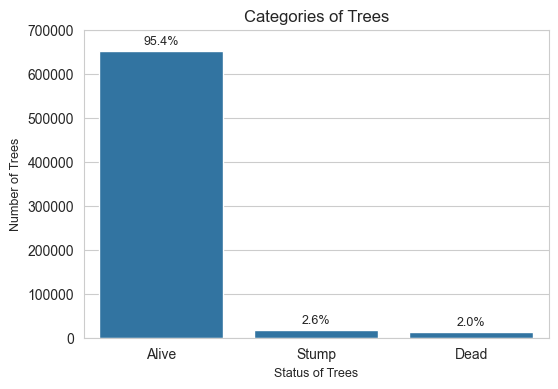

In [368]:
order = tree_sub_df["status"].value_counts().index

# Plotting the figure
plt.figure(figsize=(6,4))
ax = sns.countplot(data=tree_sub_df, x="status", order=order)

# Annotating the figure
for p in ax.patches:
    ax.annotate(f'{round((p.get_height()/tree_sub_df.shape[0]) * 100, 1)}%', xy=(p.get_x() + (p.get_width() / 2), p.get_height()), 
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontfamily="sans-serif", 
                        fontsize=9, fontweight="medium")

# Setting plot parameters
plt.xlabel("Status of Trees", fontsize=9)
plt.ylabel("Number of Trees", fontsize=9)
plt.yticks(np.arange(0,800000,100000))
plt.title("Categories of Trees");

> **Insights**: More than 95% of the trees are alive and the rest are either dead or stumps.

#### 2. Mapping all the Trees in NYC (Street Tree Cover)

Making a list of latitudes and longitudes which will be used while plotting

In [369]:
lat = tree_sub_df["latitude"].values.tolist()
lon = tree_sub_df["longitude"].values.tolist()

Using `geopandas` to read the Shape file of NYC and subsequently plotting locations of all the trees

In [370]:
nyc_map = gpd.read_file("../NYC Shape File/geo_export_d927a020-89db-489f-a55e-9401d7852912.shp")

The resulting `nyc_map` is a geo-dataframe that contains geometries and other properties of NYC boroughs which will be used while plotting

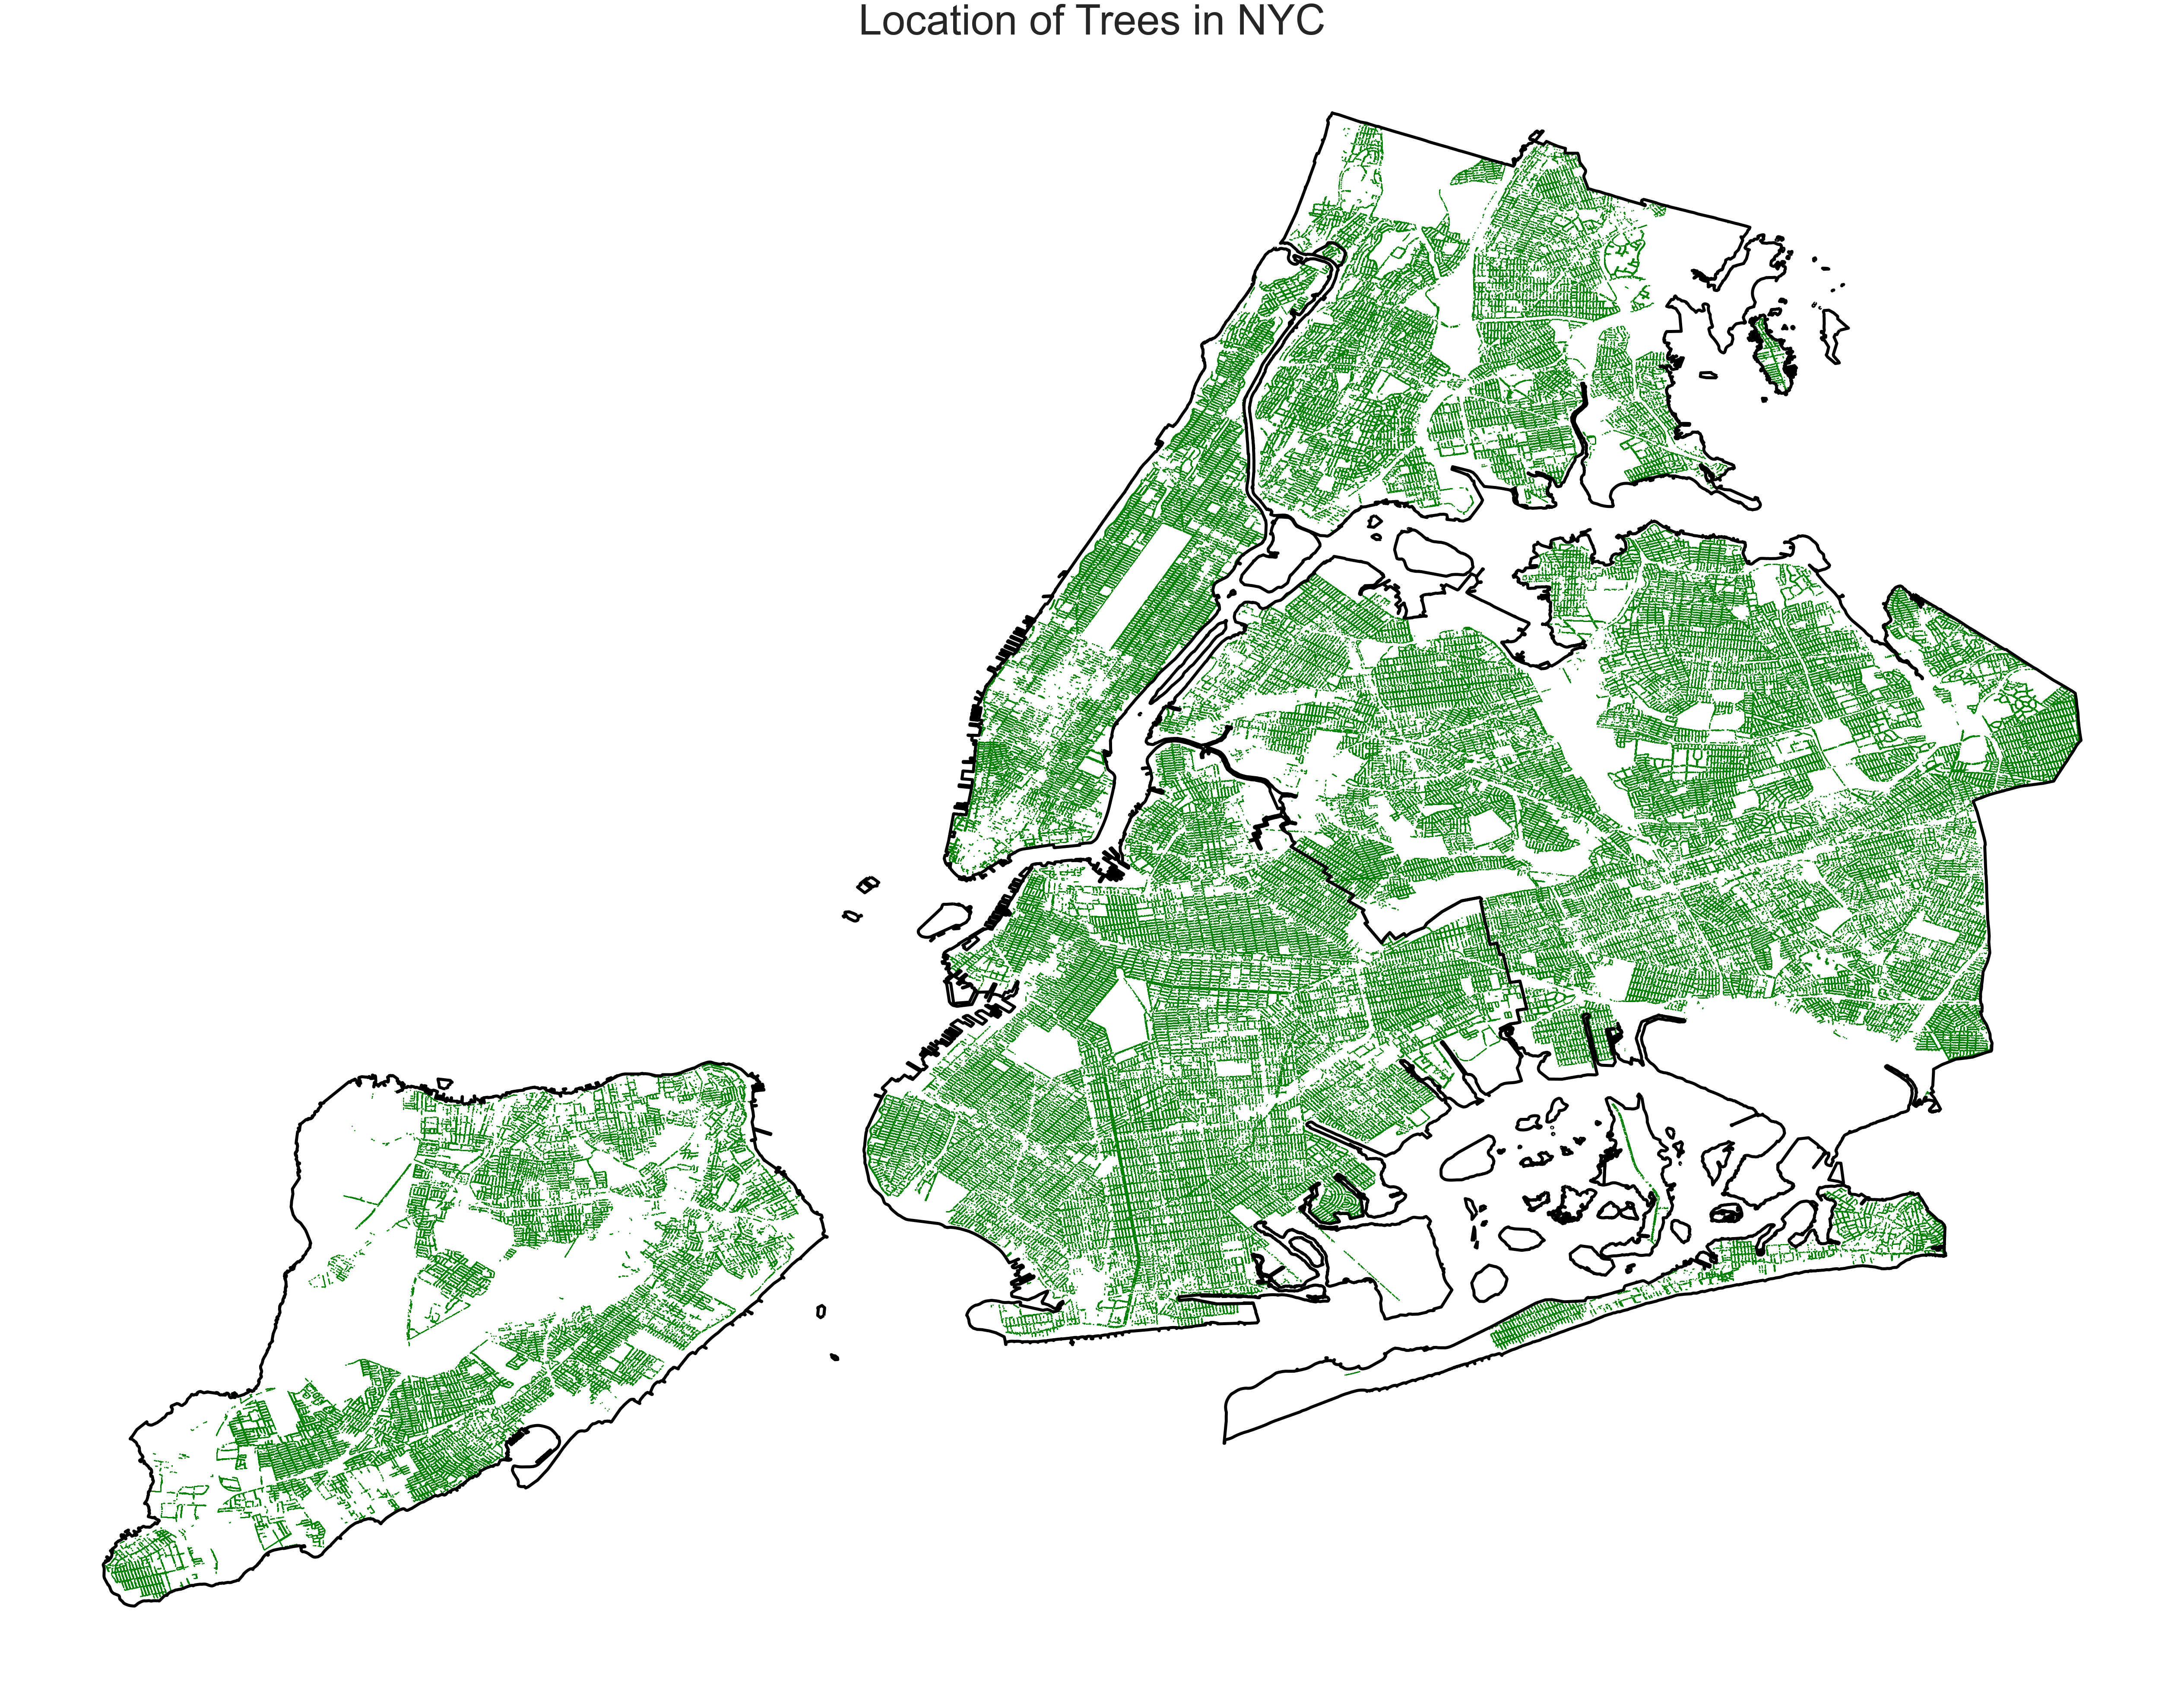

In [371]:
# Setting plot and axes parameters
fig, ax = plt.subplots(figsize=(65,65))
ax.axis('off')
ax.set_title('Location of Trees in NYC', fontdict={'fontsize':'70', 'fontweight':'10'})

# Plotting the boundary of NYC 
nyc_map.boundary.plot(ax=ax, linewidth=5, edgecolor="black")

# Making POINT geometries for the coordinates of all the trees
geometry = [Point(xy) for xy in zip(lon,lat)]
tree_loc_df = gpd.GeoDataFrame(geometry=geometry) # tree_loc_df is a geo-dataframe that conatins the POINT geomtries for the coordinates of all the trees

# Plotting the location of all the trees in NYC on the NYC boundary map
g = tree_loc_df.plot(ax=ax, markersize=1, color="green", marker="*")

#### 3. Number of Trees in each NYC Borough

`borough_df` stores count of trees in each NYC borough 

In [372]:
borough_df = tree_sub_df["borough"].value_counts(dropna=False).reset_index()
borough_df

borough   count
0         Queens  250544
1       Brooklyn  177289
2  Staten Island  105313
3          Bronx   85195
4      Manhattan   65391

Geo-dataframe: `nyc_map`

In [373]:
nyc_map

boro_code      boro_name    shape_area     shape_leng  \
0        5.0  Staten Island  1.623621e+09  325917.353950   
1        1.0      Manhattan  6.365205e+08  357713.308162   
2        2.0          Bronx  1.187175e+09  463180.579449   
3        3.0       Brooklyn  1.934138e+09  728146.574928   
4        4.0         Queens  3.041419e+09  888199.731385   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
2  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
3  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

Merging `nyc_map` and `borough_df` to get a merged geo-dataframe which will be used for plotting. Also, adding the latitudes and longitudes of the approximate center of each borough, where the annotations will be placed.

In [374]:
merged_borough_df = nyc_map.merge(borough_df, left_on="boro_name", right_on="borough", how="inner")
merged_borough_df["latitude"] = [40.57961399907466, 40.782945154522615, 40.87338093985638, 40.678183808347875, 40.7282339304628]
merged_borough_df["longitude"] = [-74.1482093382073, -73.97104892873065, -73.85446930541045, -73.94432575975338, -73.79492434331402]
merged_borough_df

boro_code      boro_name    shape_area     shape_leng  \
0        5.0  Staten Island  1.623621e+09  325917.353950   
1        1.0      Manhattan  6.365205e+08  357713.308162   
2        2.0          Bronx  1.187175e+09  463180.579449   
3        3.0       Brooklyn  1.934138e+09  728146.574928   
4        4.0         Queens  3.041419e+09  888199.731385   

                                            geometry        borough   count  \
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  Staten Island  105313   
1  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...      Manhattan   65391   
2  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...          Bronx   85195   
3  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...       Brooklyn  177289   
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...         Queens  250544   

    latitude  longitude  
0  40.579614 -74.148209  
1  40.782945 -73.971049  
2  40.873381 -73.854469  
3  40.678184 -73.944326  
4  40.728234 -73.794924

Confirming type of `merged_borough_df` before plotting

In [375]:
type(merged_borough_df)

geopandas.geodataframe.GeoDataFrame

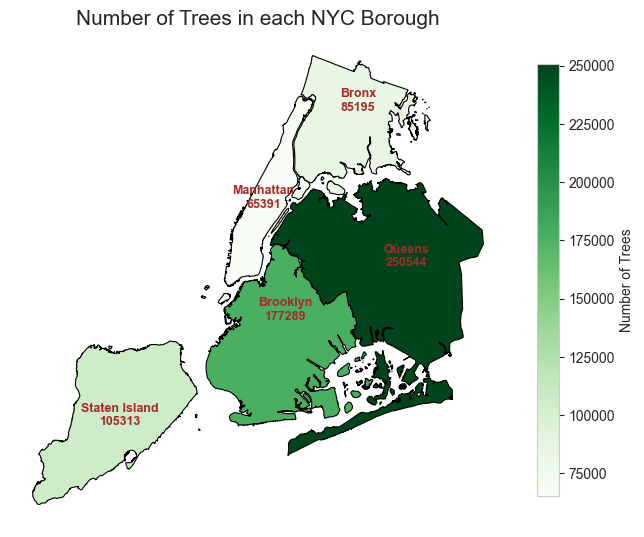

In [376]:
# Setting axes parameters
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.set_title('Number of Trees in each NYC Borough', fontdict={'fontsize':'15', 'fontweight':'10'})

# Plotting the choropleth map
merged_borough_df.plot(column="count", cmap='Greens', linewidth=0.8, ax=ax, edgecolor="0", legend=True, 
                      legend_kwds={"label": "Number of Trees", "shrink": 0.7})

# Annotating the figure
for i in range(merged_borough_df.shape[0]):
    plt.text(merged_borough_df.longitude[i], merged_borough_df.latitude[i], f'{merged_borough_df.borough[i]}\n{merged_borough_df["count"][i]}', 
                 size=9, color="brown", va="center", ha="center", fontweight="extra bold")

> **Insights**: Queens has the highest number of trees, followed by Brooklyn, while Manhattan has the least number of trees.

#### 4. How healthy are the Trees in NYC?

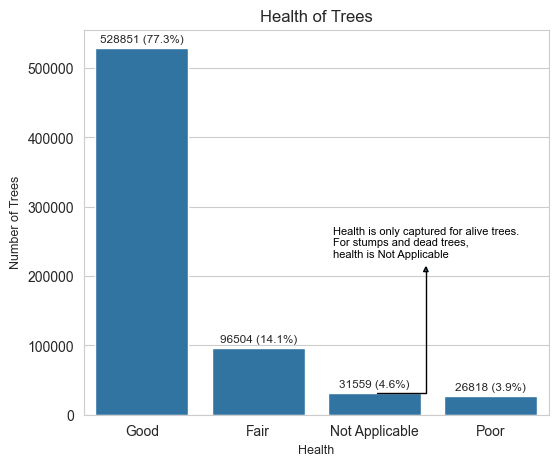

In [377]:
order = tree_sub_df["health"].value_counts().index

# Plotting the figure
plt.figure(figsize=(6,5))
ax = sns.countplot(data=tree_sub_df, x="health", order=order)

# Annotating the number of trees in each category and their percent of total 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} ({round((p.get_height()/tree_sub_df.shape[0]) * 100, 1)}%)', 
    xy=(p.get_x() + (p.get_width()/2), p.get_height()), ha="center", va="center", xytext= (0,6), 
    textcoords="offset points", fontsize=8.5, fontweight="medium")

# Storing the count of trees where health is Not Applicable to use as y-coordinate for the text annotation with the arrow
selected_count = tree_sub_df["health"].value_counts()["Not Applicable"]

# Setting text annotation with the arrow
ax.annotate("Health is only captured for alive trees.\nFor stumps and dead trees, \nhealth is Not Applicable", 
               xy=(order.get_loc("Not Applicable"), selected_count), xytext=(-30,120), textcoords="offset points",
                    fontsize=8, ha="left", va="top", color="black", arrowprops=dict(arrowstyle= "<|-", edgecolor="black",
                        connectionstyle="angle"))

# Setting plot parameters
plt.xlabel("Health", fontsize=9)
plt.ylabel("Number of Trees", fontsize=9)
plt.title("Health of Trees");

> **Insights**: More than 77% of the trees have good health, 18% trees have fair or poor health while the rest are either stumps or dead.

#### 5. Examining the progression of the Census throughout its lifetime

Making `trees_recorded`, a `df` that stores the `user_type` and the date each tree was surveyed at in yyyy-mm format

In [378]:
trees_recorded = tree_sub_df[["user_type"]].copy()
trees_recorded["%m-%Y"] = tree_sub_df["created_at"].dt.strftime("%m-%Y")
trees_recorded["%m-%Y"] = pd.to_datetime(trees_recorded["%m-%Y"], format="%m-%Y")
trees_recorded

user_type      %m-%Y
0       TreesCount Staff 2015-08-01
1       TreesCount Staff 2015-09-01
2              Volunteer 2015-09-01
3              Volunteer 2015-09-01
4              Volunteer 2015-08-01
...                  ...        ...
683727         Volunteer 2015-08-01
683728         Volunteer 2015-08-01
683729         Volunteer 2015-08-01
683730  TreesCount Staff 2015-08-01
683731  TreesCount Staff 2015-09-01

[683732 rows x 2 columns]

**Tip**: Use `.groupby(observed=False)` if there are 0 occurrences of a particular group or combination. This will ensure the zero value is visible on the graph, otherwise the graph will join the point before and after the zero. In this case there were no groups with 0 occurrences.

In [379]:
trees_recorded = trees_recorded.value_counts(dropna=False).reset_index().sort_values(by=["%m-%Y", "count"], ascending=[True, False])
trees_recorded["%b-%Y"] = trees_recorded["%m-%Y"].dt.strftime("%b-%Y")
trees_recorded

user_type      %m-%Y  count     %b-%Y
33  TreesCount Staff 2015-05-01   3243  May-2015
35         Volunteer 2015-05-01   2150  May-2015
44   NYC Parks Staff 2015-05-01    715  May-2015
16  TreesCount Staff 2015-06-01  19990  Jun-2015
18         Volunteer 2015-06-01  11100  Jun-2015
34   NYC Parks Staff 2015-06-01   2230  Jun-2015
6          Volunteer 2015-07-01  31340  Jul-2015
12  TreesCount Staff 2015-07-01  24223  Jul-2015
32   NYC Parks Staff 2015-07-01   3477  Jul-2015
1          Volunteer 2015-08-01  51282  Aug-2015
14  TreesCount Staff 2015-08-01  23276  Aug-2015
29   NYC Parks Staff 2015-08-01   4237  Aug-2015
3          Volunteer 2015-09-01  35632  Sep-2015
8   TreesCount Staff 2015-09-01  29921  Sep-2015
20   NYC Parks Staff 2015-09-01  10225  Sep-2015
0    NYC Parks Staff 2015-10-01  61092  Oct-2015
4          Volunteer 2015-10-01  34785  Oct-2015
5   TreesCount Staff 2015-10-01  34632  Oct-2015
2    NYC Parks Staff 2015-11-01  39375  Nov-2015
7   TreesCount Staff 2015-11-01  30324  Nov-2015
26         Volunteer 2015-11-01   6384  Nov-2015
11   NYC Parks Staff 2015-12-01  25087  Dec-2015
15  TreesCount Staff 2015-12-01  20465  Dec-2015
28         Volunteer 2015-12-01   4290  Dec-2015
38  TreesCount Staff 2016-01-01   1454  Jan-2016
46         Volunteer 2016-01-01    645  Jan-2016
47   NYC Parks Staff 2016-01-01    575  Jan-2016
36         Volunteer 2016-02-01   1743  Feb-2016
42   NYC Parks Staff 2016-02-01    834  Feb-2016
48  TreesCount Staff 2016-02-01    570  Feb-2016
37         Volunteer 2016-03-01   1720  Mar-2016
40  TreesCount Staff 2016-03-01   1178  Mar-2016
43   NYC Parks Staff 2016-03-01    753  Mar-2016
39         Volunteer 2016-04-01   1368  Apr-2016
41  TreesCount Staff 2016-04-01    927  Apr-2016
45   NYC Parks Staff 2016-04-01    707  Apr-2016
19  TreesCount Staff 2016-05-01  10851  May-2016
31         Volunteer 2016-05-01   3965  May-2016
50   NYC Parks Staff 2016-05-01    288  May-2016
9   TreesCount Staff 2016-06-01  28910  Jun-2016
23         Volunteer 2016-06-01   8126  Jun-2016
49   NYC Parks Staff 2016-06-01    430  Jun-2016
13  TreesCount Staff 2016-07-01  24087  Jul-2016
24         Volunteer 2016-07-01   7930  Jul-2016
30   NYC Parks Staff 2016-07-01   4027  Jul-2016
10  TreesCount Staff 2016-08-01  26714  Aug-2016
21         Volunteer 2016-08-01   8643  Aug-2016
25   NYC Parks Staff 2016-08-01   7543  Aug-2016
17  TreesCount Staff 2016-09-01  15496  Sep-2016
22   NYC Parks Staff 2016-09-01   8379  Sep-2016
27         Volunteer 2016-09-01   6368  Sep-2016
51  TreesCount Staff 2016-10-01     16  Oct-2016
52   NYC Parks Staff 2016-10-01     10  Oct-2016

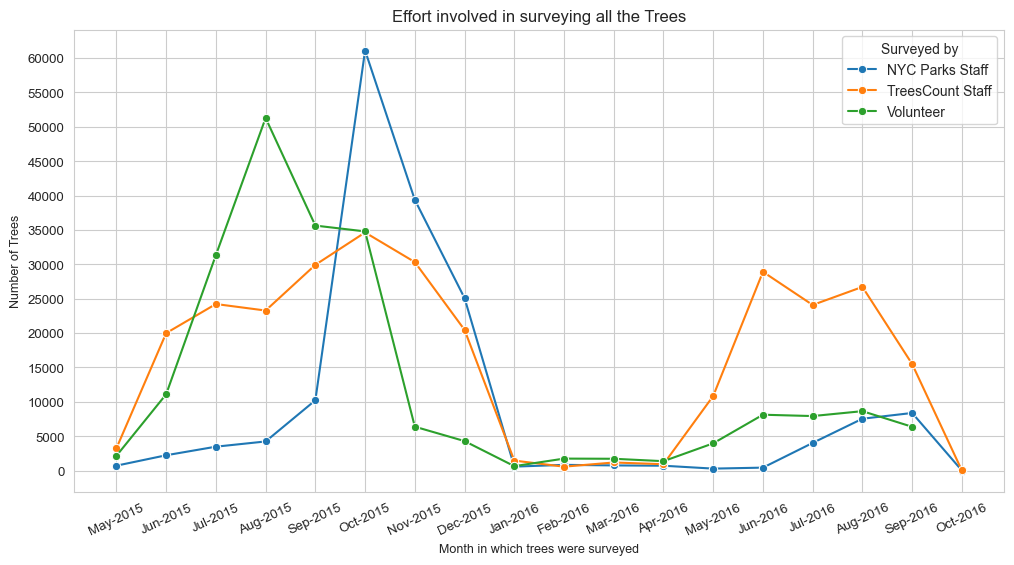

In [380]:
# Plotting the figure
plt.figure(figsize=(12,6))
sns.lineplot(data=trees_recorded, x="%b-%Y", y="count", hue="user_type", marker="o")

# Setting plot parameters
plt.xlabel("Month in which trees were surveyed", fontsize=9)
plt.ylabel("Number of Trees", fontsize=9)
plt.legend(title="Surveyed by")
plt.title("Effort involved in surveying all the Trees")
plt.yticks(np.arange(0,62000,5000), fontsize=9.5)
plt.xticks(fontsize=9.5, rotation=25);

> **Insights**:
> 1. The census lasted for nearly 18 months or 1.5 years.
> 2. Volunteers surveyed the highest number of trees in Aug 2015, while NYC Parks staff and TreesCount staff surveyed the highest number of trees in Oct 2015.
> 3. It appears that the census was almost at a standstill during the initial four months of 2016.
> 4. During the first five months of the census, the Volunteers and TreesCount staff surveyed significantly more trees than the NYC Parks staff.
> 5. From May 2016 onwards, the TreesCount staff consistently surveyed more trees.

#### 6. Examining the abundance and size of Tree Species

Making a resusable mask (filter) to view alive trees

In [381]:
alive_trees = (tree_sub_df["status"] == "Alive")

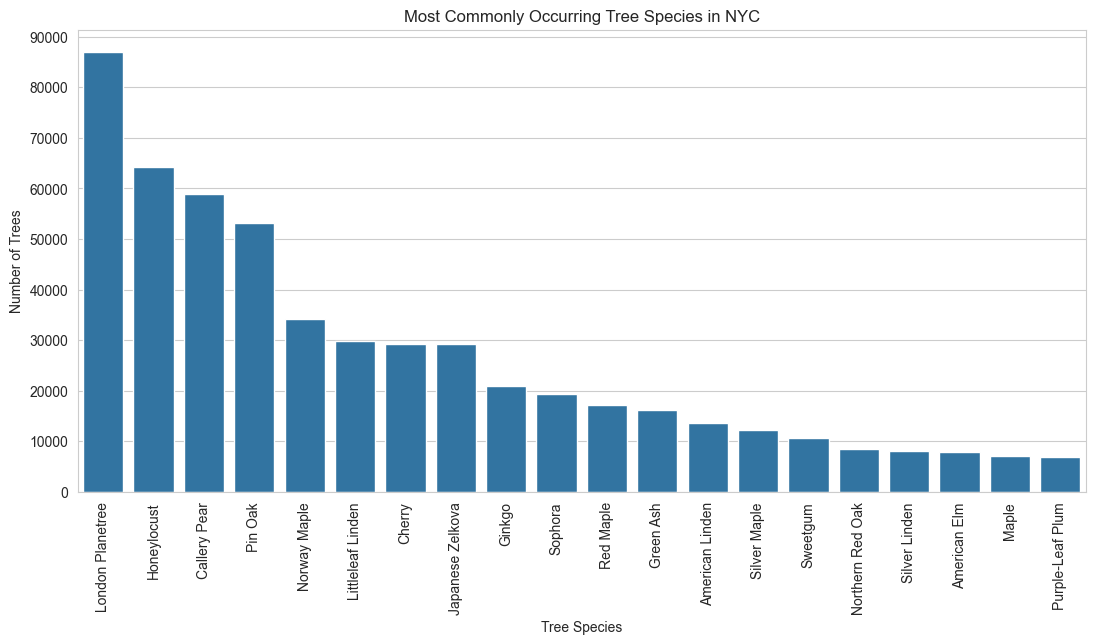

In [382]:
# Ordering the top 20 most commonly occurring tree species in descending order
order = tree_sub_df[alive_trees]["spc_common"].value_counts().head(20).index

# Plotting the figure
plt.figure(figsize=(13,6))
sns.countplot(data=tree_sub_df[alive_trees], x="spc_common", order=order)

# Setting plot parameters
plt.xlabel("Tree Species")
plt.ylabel("Number of Trees")
plt.title("Most Commonly Occurring Tree Species in NYC")
plt.yticks(np.arange(0,90001,10000))
plt.xticks(rotation=90);

Making a resusable mask (filter) to view alive trees that belong to a species

In [383]:
alive_species = ( (tree_sub_df["status"] == "Alive") & (tree_sub_df["spc_common"] != "No Observation") )

Finding out the Top 15 tree species according to their mean diameter and also caluculating their median diamter for reference

In [384]:
tree_species = tree_sub_df[alive_species].groupby("spc_common")["tree_dbh"].describe()[["mean", "50%"]].sort_values("mean", ascending=True).tail(15).reset_index()
tree_species["mean"] = tree_species["mean"].round(2)
tree_species.set_index("spc_common", inplace=True)
tree_species

mean   50%
spc_common                     
Tree Of Heaven      12.55  11.0
White Pine          12.58  11.0
Green Ash           13.47  13.0
Ash                 13.53  13.0
Mulberry            13.93  11.0
Horse Chestnut      14.04  15.0
Catalpa             14.27  13.0
Norway Maple        14.28  14.0
Sycamore Maple      14.72  14.0
Pignut Hickory      15.39  15.0
Weeping Willow      15.80  14.0
Pin Oak             16.84  17.0
Eastern Cottonwood  16.97  16.0
Silver Maple        20.99  21.0
London Planetree    21.52  22.0

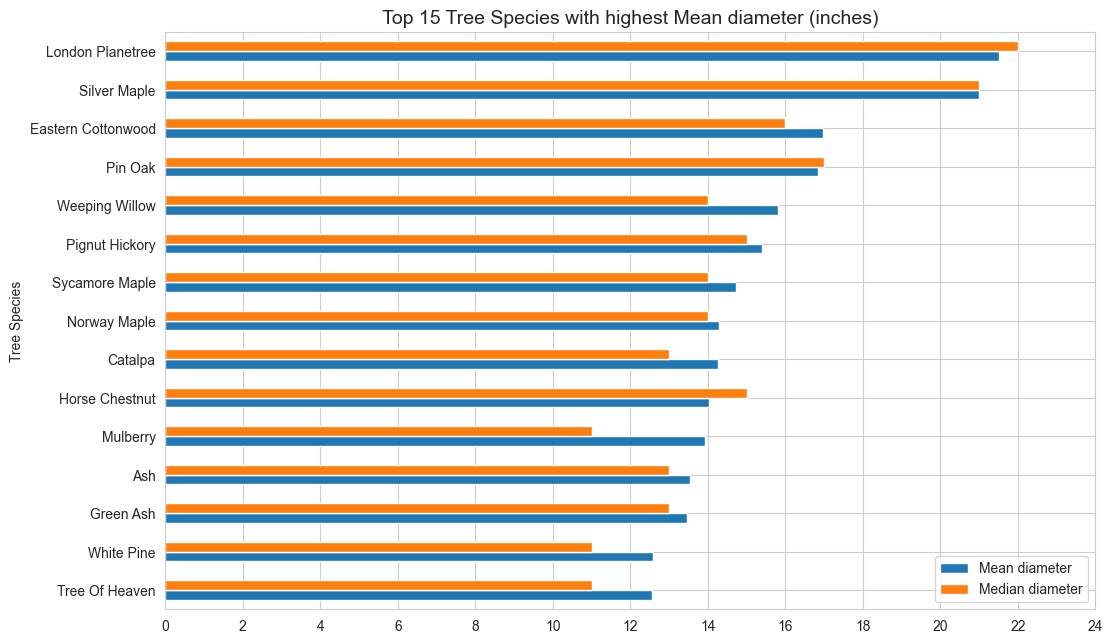

In [385]:
# Plotting the figure
tree_species.plot.barh(figsize=(12,7.5))

# Setting plot parmeters
plt.ylabel("Tree Species")
plt.yticks(fontsize=10)
plt.xticks(np.arange(0,25,2))
plt.legend(["Mean diameter", "Median diameter"])
plt.title("Top 15 Tree Species with highest Mean diameter (inches)", fontsize=14);

> **Insights from the two visualizations**:
> 1. Three out of the Top 5 most abundant tree species (London Planetree, Pin Oak & Norway Maple) can be considered large diameter trees. These tree species also occur in the Top 15 tree species with highest mean diameter.

#### 7. Distributions of different Trees (Alive, Dead & Stumps) according to their Diameter

Storing a view of all the stumps, dead and alive trees in respective `df`s

In [386]:
stumps_df = tree_sub_df[tree_sub_df["status"] == "Stump"]
dead_trees_df = tree_sub_df[tree_sub_df["status"] == "Dead"]
alive_trees_df = tree_sub_df[tree_sub_df["status"] == "Alive"]

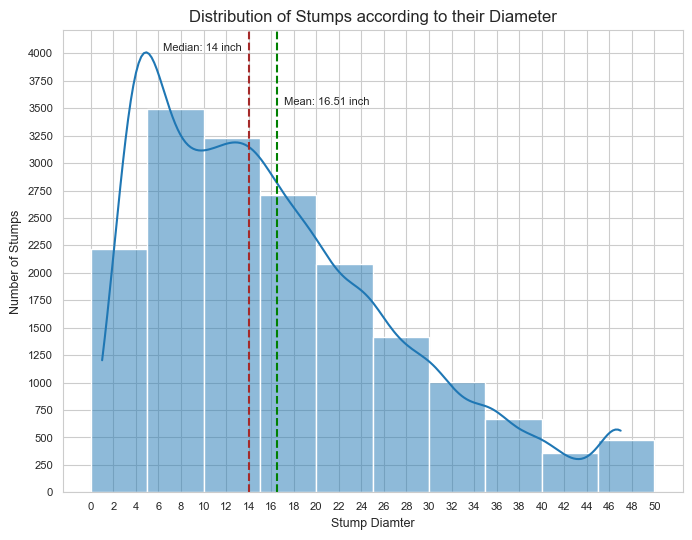

In [387]:
# Setting figure size
plt.figure(figsize=(8,6))

# Calculating mean and median of the distribution
mean = round(np.mean(stumps_df["stump_diam"]), 2)
median = int((np.median(stumps_df["stump_diam"])))

# Plotting the figure
ax = sns.histplot(data=stumps_df, x="stump_diam", bins=np.arange(0,51,5), kde=True)

# Setting plot parameters
plt.xlabel("Stump Diamter", fontsize=9)
plt.ylabel("Number of Stumps", fontsize=9)
plt.xticks(np.arange(0,51,2), fontsize=8)
plt.yticks(np.arange(0,4201,250), fontsize=8)
plt.title("Distribution of Stumps according to their Diameter")

# Plotting and annotating the mean and median lines
plt.axvline(mean, color="green", linestyle="--")
plt.axvline(median, color="brown", linestyle="--")

ax.annotate(f"Mean: {mean} inch", xy=(mean, 3500), xytext=(5,2), textcoords="offset points", fontsize=8)
ax.annotate(f'Median: {median} inch', xy=(median, 4000), xytext=(-62,2), textcoords="offset points", fontsize=8);

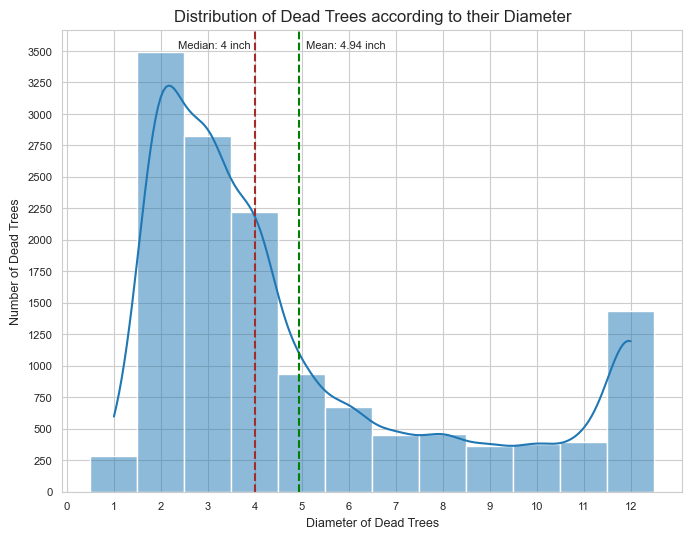

In [388]:
# Setting figure size
plt.figure(figsize=(8,6))

# Calculating mean and median of the distribution
mean = round(np.mean(dead_trees_df["tree_dbh"]), 2)
median = int((np.median(dead_trees_df["tree_dbh"])))

# Plotting the figure
ax = sns.histplot(data=dead_trees_df, x="tree_dbh", kde=True, discrete=True)

# Setting plot parameters
plt.xlabel("Diameter of Dead Trees", fontsize=9)
plt.ylabel("Number of Dead Trees", fontsize=9)
plt.xticks(np.arange(0,13,1), fontsize=8)
plt.yticks(np.arange(0,3501,250), fontsize=8)
plt.title("Distribution of Dead Trees according to their Diameter")

# Plotting and annotating the mean and median lines
plt.axvline(mean, color="green", linestyle="--")
plt.axvline(median, color="brown", linestyle="--")

ax.annotate(f"Mean: {mean} inch", xy=(mean, 3500), xytext=(5,2), textcoords="offset points", fontsize=8)
ax.annotate(f'Median: {median} inch', xy=(median, 3500), xytext=(-55,2), textcoords="offset points", fontsize=8);

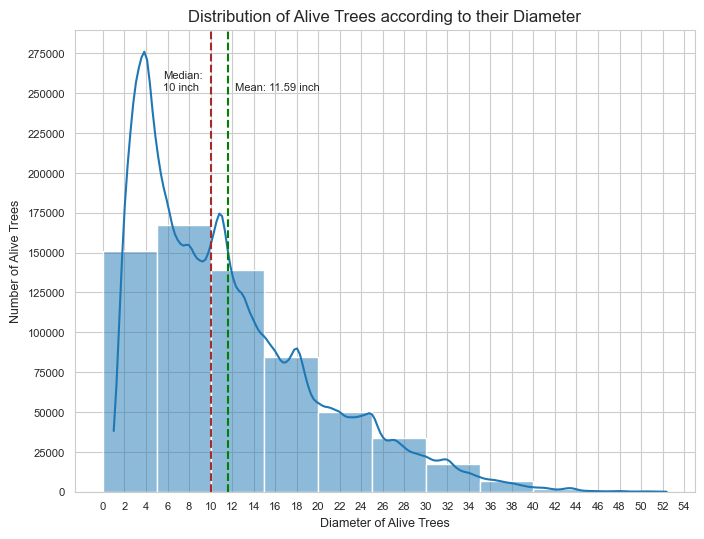

In [389]:
# Setting figure size
plt.figure(figsize=(8,6))

# Calculating mean and median of the distribution
mean = round(np.mean(alive_trees_df["tree_dbh"]), 2)
median = int((np.median(alive_trees_df["tree_dbh"])))

# Plotting the figure
ax = sns.histplot(data=alive_trees_df, x="tree_dbh", bins=np.arange(0,55,5), kde=True)

# Setting plot parameters
plt.xlabel("Diameter of Alive Trees", fontsize=9)
plt.ylabel("Number of Alive Trees", fontsize=9)
plt.xticks(np.arange(0,55,2), fontsize=8)
plt.yticks(np.arange(0,275001,25000), fontsize=8)
plt.title("Distribution of Alive Trees according to their Diameter")

# Plotting and annotating the mean and median lines
plt.axvline(mean, color="green", linestyle="--")
plt.axvline(median, color="brown", linestyle="--")

ax.annotate(f"Mean: {mean} inch", xy=(mean, 250000), xytext=(5,2), textcoords="offset points", fontsize=8)
ax.annotate(f'Median:\n{median} inch', xy=(median, 250000), xytext=(-34,2), textcoords="offset points", fontsize=8);


> **Insights from the three distributions**:
> 1. The distributions are right-skewed, indicated by the elongated tail on the right side and the fact that the mean tree diameter for all the distributions is greater than their median tree diameter.
> 2. Initially, there is an increase in the number of trees/stumps as the diameter increases between the first and second bins of all three distributions.
> 3. From the second bin onwards, we see a consistent decrease in the number of trees/stumps as we move to the next bins.
> 4. In the distributions of stumps and dead trees, the last bin contains slightly more trees than its predecessor. This may be due to the winsorization (capping) that was applied to handle outliers and a relatively fewer number of observations in the previous bin.

#### 8. Is there any co-relation between the Health of Alive Trees and the Unique Signs of Stewardship?

A treemap was also created to answer this question after creating the stacked-bar chart due to the use of the log-scale in its y-axis.

##### a. Stacked-bar chart:

Number of alive trees exhibiting each unique sign of stewardship

In [390]:
# Using head() to omit the last value in the series (Not Applicable: 0)
tree_sub_df[alive_trees]["steward"].value_counts().head(4) 

steward
None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: count, dtype: int64

Health of alive trees

In [391]:
tree_sub_df[alive_trees].value_counts("health")

health
Good              528851
Fair               96504
Poor               26818
Not Applicable         0
Name: count, dtype: int64

Grouping alive trees by `steward` and `health` and finding their counts using `.size()`. Then, the `df` has been pivoted and columns arranged in a particular order.

In [392]:
alive_trees_plot = tree_sub_df[alive_trees] 

# parameter: observed=True in groupby is applicable only for categorical groupers, will only include categories that have count > 0
groupby_plot = alive_trees_plot.groupby(["steward", "health"], observed=True).size().reset_index().pivot(columns="health", index="steward", values=0)

groupby_plot = groupby_plot[["Poor", "Fair", "Good"]]
groupby_plot

health    Poor   Fair    Good
steward                      
1or2      6283  21902  115372
3or4       747   2830   15606
4orMore     49    200    1361
None     19739  71572  396512

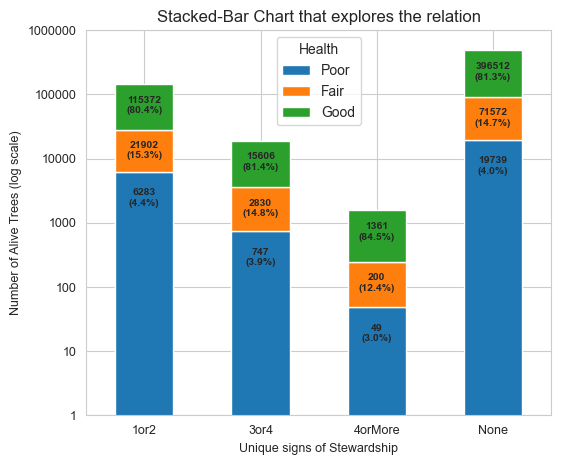

In [393]:
# Plotting the figure
ax = groupby_plot.plot(kind="bar", stacked=True, figsize=(6,5))

# Setting axes, ticklabel and legend paramaters
ax.set_yscale("log")
ax.set_ylim(1,1000000)
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(axis="y", style="plain")
plt.legend(title="Health")

#Annotating the figure
for index in groupby_plot.index:
    prev_height = 0
    x = groupby_plot.index.get_loc(index)
    for colname in groupby_plot.columns:
        value = groupby_plot.loc[index, colname]
        y = groupby_plot.loc[index, colname]
        total = groupby_plot.loc[index, :].sum()
        ax.annotate(f"{value}\n({(value/total)*100:.1f}%)", xy=(x, prev_height+(y/2)), xytext=(0,-5),
                    textcoords="offset points", fontsize=7.5, ha="center", va="center", fontweight=560)
        prev_height += value

# Setting plot parameters
plt.xlabel("Unique signs of Stewardship", fontsize=9)
plt.ylabel("Number of Alive Trees (log scale)", fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
plt.title("Stacked-Bar Chart that explores the relation", fontsize=12);

##### b. Treemap:

Grouping alive trees by `steward` and `health` and finding their counts using `.size()`

In [394]:
groupby_plot = alive_trees_plot.groupby(["steward", "health"], observed=True).size().reset_index()
groupby_plot

steward health       0
0      1or2   Fair   21902
1      1or2   Good  115372
2      1or2   Poor    6283
3      3or4   Fair    2830
4      3or4   Good   15606
5      3or4   Poor     747
6   4orMore   Fair     200
7   4orMore   Good    1361
8   4orMore   Poor      49
9      None   Fair   71572
10     None   Good  396512
11     None   Poor   19739

Making a `colors` dictionary and then mapping individual colors to unique signs of stewardship

In [395]:
colors = {"None": "coral", "1or2": "peru", "3or4": "turquoise", "4orMore": "lime"}
groupby_plot["colors"] = groupby_plot["steward"].map(colors)
groupby_plot

steward health       0     colors
0      1or2   Fair   21902       peru
1      1or2   Good  115372       peru
2      1or2   Poor    6283       peru
3      3or4   Fair    2830  turquoise
4      3or4   Good   15606  turquoise
5      3or4   Poor     747  turquoise
6   4orMore   Fair     200       lime
7   4orMore   Good    1361       lime
8   4orMore   Poor      49       lime
9      None   Fair   71572      coral
10     None   Good  396512      coral
11     None   Poor   19739      coral

Making a list of annotations for the treemap and storing it in `labels`

In [396]:
labels = [f"{health}: {count}" for health, count in zip(groupby_plot["health"], groupby_plot[0])]

Using `.items()` to display the list of the `color` dictionary's key-value pairs as tuples.

In [397]:
colors.items()

dict_items([('None', 'coral'), ('1or2', 'peru'), ('3or4', 'turquoise'), ('4orMore', 'lime')])

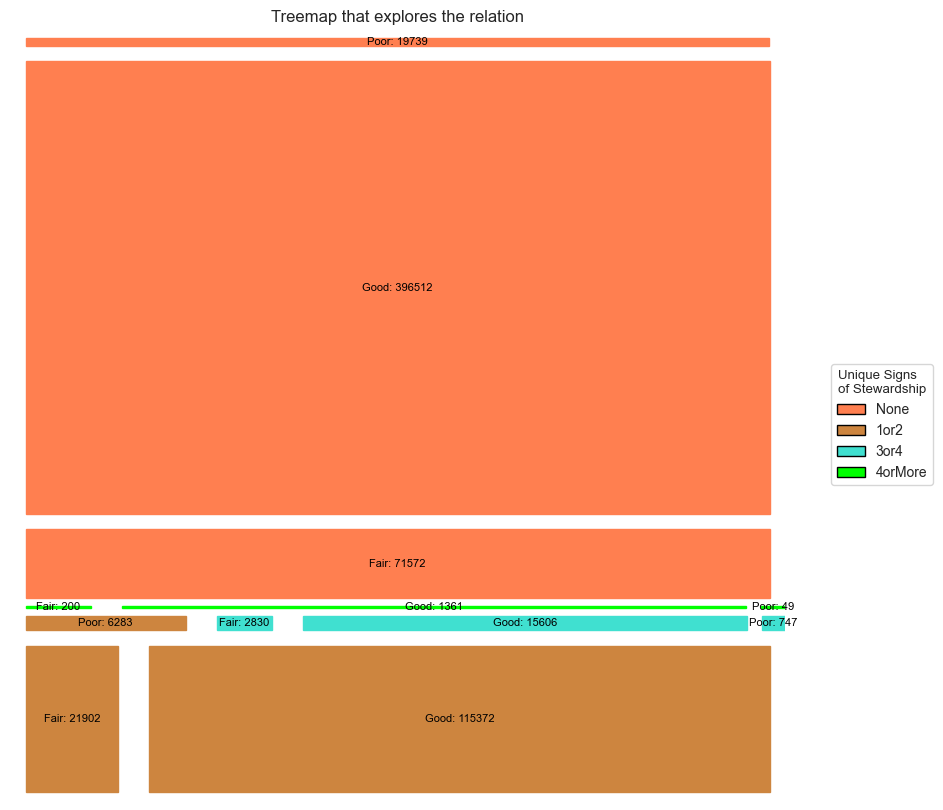

In [398]:
# Setting figure size
plt.figure(figsize=(10,10))

# Plotting the figure
ax = sqr.plot(sizes=groupby_plot[0], label=labels, color=groupby_plot["colors"], ec=groupby_plot["colors"], 
              pad=True, norm_x=50, norm_y=100, text_kwargs={"color":"black", "fontsize":8})

# Making and plotting the figure legend
legend_elements = [Patch(facecolor=color, edgecolor="black", label=steward) for steward, color in colors.items()]
plt.legend(handles=legend_elements, title=f"Unique Signs\nof Stewardship", title_fontsize=9.5,
           loc="lower right", bbox_to_anchor=(0.7, 0.4, 0.5, 0))

# Setting plot and axes parameters
plt.title("Treemap that explores the relation", fontsize=12)
ax.axis("off");

> **Insights from the two visualizations**:
> 1. The highest number of alive trees fall under the category of having no signs of stewardship, followed by trees with 1-2 signs. The least number of trees belong to the category of having 4 or more signs of stewardship. 
> 2. The distribution of trees with poor, fair, and good health remains consistent across various signs of stewardship. Irrespective of the type of care provided, approximately 3-4% of trees exhibit poor health, while 12-15% show fair health, and the majority, i.e., 80-85%, remain in good health.
> 3. The same is observed by examining the areas assigned to all health categories for each unique sign of stewardship in the treemap.
> 4. The visualizations indicate that there is no meaningful relationship between the health of alive trees and the unique signs of stewardship observed. There is neither a significant increase in the percentage of trees with good health with an increase in unique signs of stewardship nor a decrease in the percentage of trees with poor health with an increase in unique signs of stewardship.

#### 9. Are Trees of certain Health causing relatively more Sidewalk damage around them?

Grouping alive trees by `health` and `sidewalk` and finding their counts using `.size()`. Then, the `df` has been pivoted and columns arranged in a particular order.

In [399]:
# Replacing ["tree_id"].count() with .size() will also produde the same result
health_and_sidewalk = alive_trees_plot.groupby(["health", "sidewalk"], observed=True)["tree_id"].count().reset_index().pivot(columns="sidewalk", index="health", values="tree_id").sort_values("Damage", ascending=True)
health_and_sidewalk = health_and_sidewalk[["NoDamage", "Damage"]]
health_and_sidewalk

sidewalk  NoDamage  Damage
health                    
Poor         20213    6605
Fair         67805   28699
Good        376961  151890

Finding the per cent total of trees that cause no damage and those which do for different `health` categories

In [400]:
# .sum() adds all values in each row and then the outer .div divides each value in the 2 columns with the totals obtained with .sum() 
percentages = health_and_sidewalk.div(health_and_sidewalk.sum(axis=1), axis=0)*100 
percentages

sidewalk   NoDamage     Damage
health                        
Poor      75.371019  24.628981
Fair      70.261336  29.738664
Good      71.279245  28.720755

Listing the column and row names of `health_and_sidewalk`

In [401]:
list(health_and_sidewalk.index), list(health_and_sidewalk.columns)

(['Poor', 'Fair', 'Good'], ['NoDamage', 'Damage'])

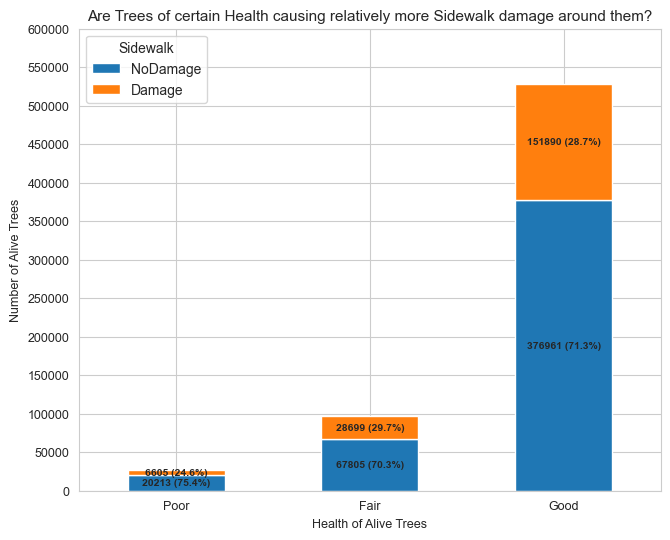

In [402]:
# Plotting the figure
ax = health_and_sidewalk.plot(kind="bar", stacked=True, figsize=(7.5,6))

# Annotating the figure
for index in health_and_sidewalk.index:
    prev_height = 0
    x = health_and_sidewalk.index.get_loc(index) # to get the index position of the index label
    for colname in health_and_sidewalk.columns:
        value = health_and_sidewalk.loc[index, colname]
        y = health_and_sidewalk.loc[index, colname]
        total = health_and_sidewalk.loc[index, :].sum()
        ax.annotate(f"{value} ({(value/total)*100:.1f}%)", xy=(x, prev_height+(y/2)), xytext=(0,0),
                    textcoords="offset points", fontsize=7.5, ha="center", va="center", fontweight=575)
        prev_height += value

# Setting plot parameters
plt.title("Are Trees of certain Health causing relatively more Sidewalk damage around them?", fontsize=11)
plt.legend(title="Sidewalk")
plt.yticks(np.arange(0,600001, 50000), fontsize=9)
plt.xticks(rotation=0, fontsize=9)
plt.xlabel("Health of Alive Trees", fontsize=9)
plt.ylabel("Number of Alive Trees", fontsize=9);

> **Insights**:
> 1. The highest number of trees that are alive have good health, followed by trees with fair health. The number of trees with poor health is the lowest.
> 2. The distribution of trees that cause sidewalk damage versus those that don't, remain consistent across various health categories. Regardless of the health of trees, approximately 24-30% of them cause sidewalk damage, while the majority, i.e. 70-75%, do not cause any sidewalk damage.
> 3. The visualization indicates that there is no meaningful relationship between the health of trees and sidewalk damage caused by them. Trees with good health do not cause excessive sidewalk damage, while trees with poor health do not necessarily lead to no sidewalk damage.

#### 10. How are Tree Guards spread across NYC Boroughs?

Grouping alive trees by `borough` and `guards` to find the count of trees for each unique observed combination. Then the grouped `df` was converted to a pivot table that also shows the sum of all the rows and columns.

**Note**: Status of tree guards, `guards` is only recorded for alive trees.

In [403]:
borough_guards = alive_trees_plot.groupby(["borough", "guards"], observed=True)["tree_id"].count().reset_index()
borough_guards = borough_guards.pivot_table(columns="guards", index="borough", values="tree_id", observed=True, aggfunc="sum", margins=True)
borough_guards

guards         Harmful  Helpful    None  Unsure     All
borough                                                
Bronx              976     4605   74524     480   80585
Brooklyn          5650    19471  142563    2060  169744
Manhattan         8741    17559   34812    1315   62427
Queens            3690     7153  224357    2774  237974
Staten Island     1195     3078   96051    1119  101443
All              20252    51866  572307    7748  652173

Making two `df`s, to show trees with different kinds of guards in different boroughs in absolute and percentage terms

In [404]:
borough_guards_absolute = borough_guards.drop(index="All", columns="All")

borough_guards_percent = borough_guards.div(borough_guards.iloc[:,-1], axis=0)*100
# The inplace parameter enables to drop the "All" row and column in the original df without making a copy, no need for any assignment like in the first statement of this cell
borough_guards_percent.drop(index="All", columns="All", inplace=True)
borough_guards_percent = borough_guards_percent.round(decimals=1)
borough_guards_percent

guards         Harmful  Helpful  None  Unsure
borough                                      
Bronx              1.2      5.7  92.5     0.6
Brooklyn           3.3     11.5  84.0     1.2
Manhattan         14.0     28.1  55.8     2.1
Queens             1.6      3.0  94.3     1.2
Staten Island      1.2      3.0  94.7     1.1

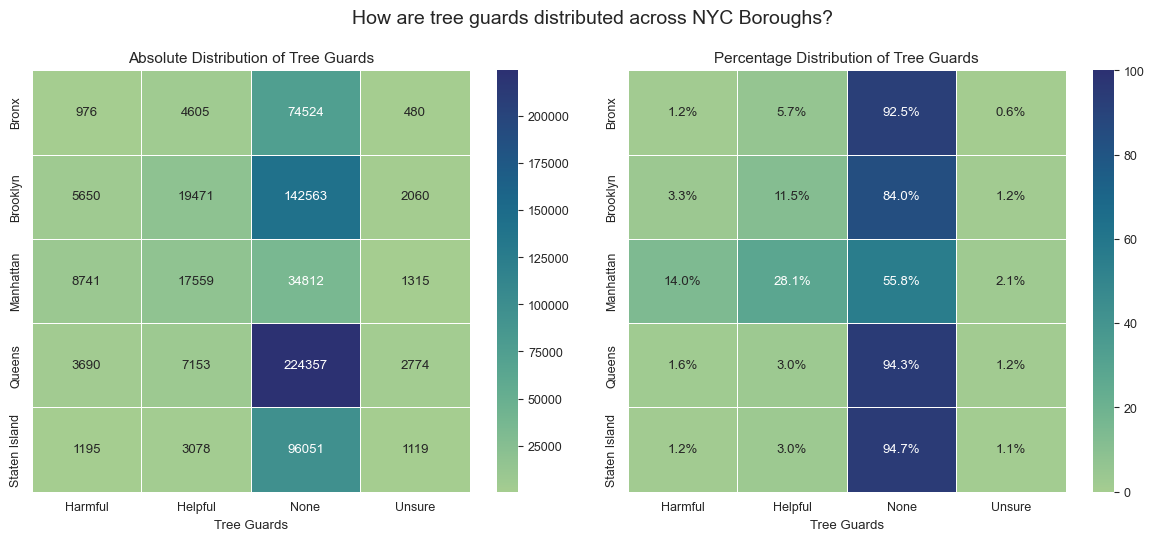

In [405]:
# Setting subplots and figure size
fig, ax = plt.subplots(1, 2, figsize=(12,5.5))

# Plotting and annotating figure 1
sns.heatmap(data=borough_guards_absolute, cmap="crest", annot=True, fmt="d", linewidth=0.5, ax=ax[0],
            annot_kws={"fontsize":9.5})

# Setting axes and color bar parameters for figure 1
# ax[0].figure.axes: lists all the axes in the figure and ax[0].figure.axes[-1] chooses the last axes i.e., the axes of the color bar 
cax = ax[0].figure.axes[-1] 
cax.tick_params(labelsize=9)
ax[0].set_title("Absolute Distribution of Tree Guards", fontsize=11)
ax[0].set_xlabel("Tree Guards", fontsize=9.5)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=9)

# Plotting and annotating figure 2
sns.heatmap(data=borough_guards_percent, cmap="crest", annot=True, fmt=".1f", linewidth=0.5, vmin=0, vmax=100, ax=ax[1],
            annot_kws={"fontsize":9.5})
for t in ax[1].texts:
    t.set_text(t.get_text() + "%")

# Setting axes and color bar parameters for figure 2
cax = ax[1].figure.axes[-1] 
cax.tick_params(labelsize=9)
ax[1].set_title("Percentage Distribution of Tree Guards", fontsize=11)
ax[1].set_xlabel("Tree Guards", fontsize=9.5)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=9)

# Setting figure super title and padding 
fig.suptitle("How are tree guards distributed across NYC Boroughs?", fontsize=14)
plt.tight_layout(pad=1.25);

> **Insights**:
> 1. Queens has the highest number of trees without guards, followed by Brooklyn, Staten Island, Bronx and finally Manhattan. Meanwhile, Staten Island has the highest percentage of trees without guards, followed by Queens, Bronx, Brooklyn, and Manhattan.
> 2. Brooklyn has the highest number of trees with helpful guards, followed by Manhattan, Queens, Bronx and finally Staten Island. In terms of the percentage of trees with helpful guards, Manhattan leads, followed by Brooklyn, Bronx, Queens, and Staten Island.
> 3. Manhattan has the highest number of trees with harmful guards, followed by Brooklyn, Queens, Staten Island and finally Bronx. A similar pattern is observed with the highest percentage of trees with harmful guards, with Manhattan leading, followed by Brooklyn, Queens, Staten Island and Bronx.
> 4. Manhattan has the highest number of trees with guards (27,615), closely followed by Brooklyn (27,181), then Queens (13,617), Bronx (6,061) and finally Staten Island (5,392).
> 5. Manhattan has a relatively higher percentage of trees with both helpful and harmful guards compared to other boroughs. This could be attributed to the fact that it has the least number of alive trees. It could also indicate that guards are not being properly installed or maintained in Manhattan.
> 6. In contrast, Brooklyn, with the second-highest number of trees with guards, has a relatively low percentage of trees with harmful guards. This suggests that guards are either being properly installed or maintained in Brooklyn.

#### 11. How are Tree Guards spread across NTAs (Neighborhood Tabulation Areas)

Grouping alive trees by `nta_name`, `borough` and `guards` to find the count of trees for each unique combination and sorting with descending order of the count.

**Note**: Status of tree guards, `guards` is only recorded for alive trees.

A. **How are tree guards distributed in NYC's NTAs (Neighborhood Tabulation Areas)?**

In [406]:
nta_and_guards = alive_trees_plot.groupby(["nta_name", "borough", "guards"], observed=True)["tree_id"].count().reset_index().sort_values("tree_id", ascending=False)
nta_and_guards

nta_name        borough   guards  \
6    Annadale-Huguenot-Prince's Bay-Eltingville  Staten Island     None   
306                                 Great Kills  Staten Island     None   
38                        Bayside-Bayside Hills         Queens     None   
208                               East New York       Brooklyn     None   
581                           Rossville-Woodrow  Staten Island     None   
..                                          ...            ...      ...   
526                                 Parkchester          Bronx   Unsure   
141                                  Co-op City          Bronx  Harmful   
358                  Jamaica Estates-Holliswood         Queens   Unsure   
594                        Seagate-Coney Island       Brooklyn   Unsure   
523                                 Parkchester          Bronx  Harmful   

     tree_id  
6      12123  
306     9688  
38      9098  
208     8521  
581     8143  
..       ...  
526        1  
141        1  
358        1  
594        1  
523        1  

[755 rows x 4 columns]

Creating seperate `df`s for trees with no guards, all guards, helpful guards and harmful guards for each NTA.

In [407]:
no_guards = nta_and_guards[nta_and_guards["guards"] == "None"].groupby(["nta_name", "borough"], observed=False)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False).head(10)
no_guards.reset_index(drop=True, inplace=True)

all_guards = nta_and_guards[nta_and_guards["guards"] != "None"].groupby(["nta_name", "borough"], observed=False)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False).head(10)
all_guards.reset_index(drop=True, inplace=True)

helpful_guards = nta_and_guards[nta_and_guards["guards"] == "Helpful"].groupby(["nta_name", "borough"], observed=False)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False).head(10)
helpful_guards.reset_index(drop=True, inplace=True)

harmful_guards = nta_and_guards[nta_and_guards["guards"] == "Harmful"].groupby(["nta_name", "borough"], observed=False)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False).head(10)
harmful_guards.reset_index(drop=True, inplace=True)

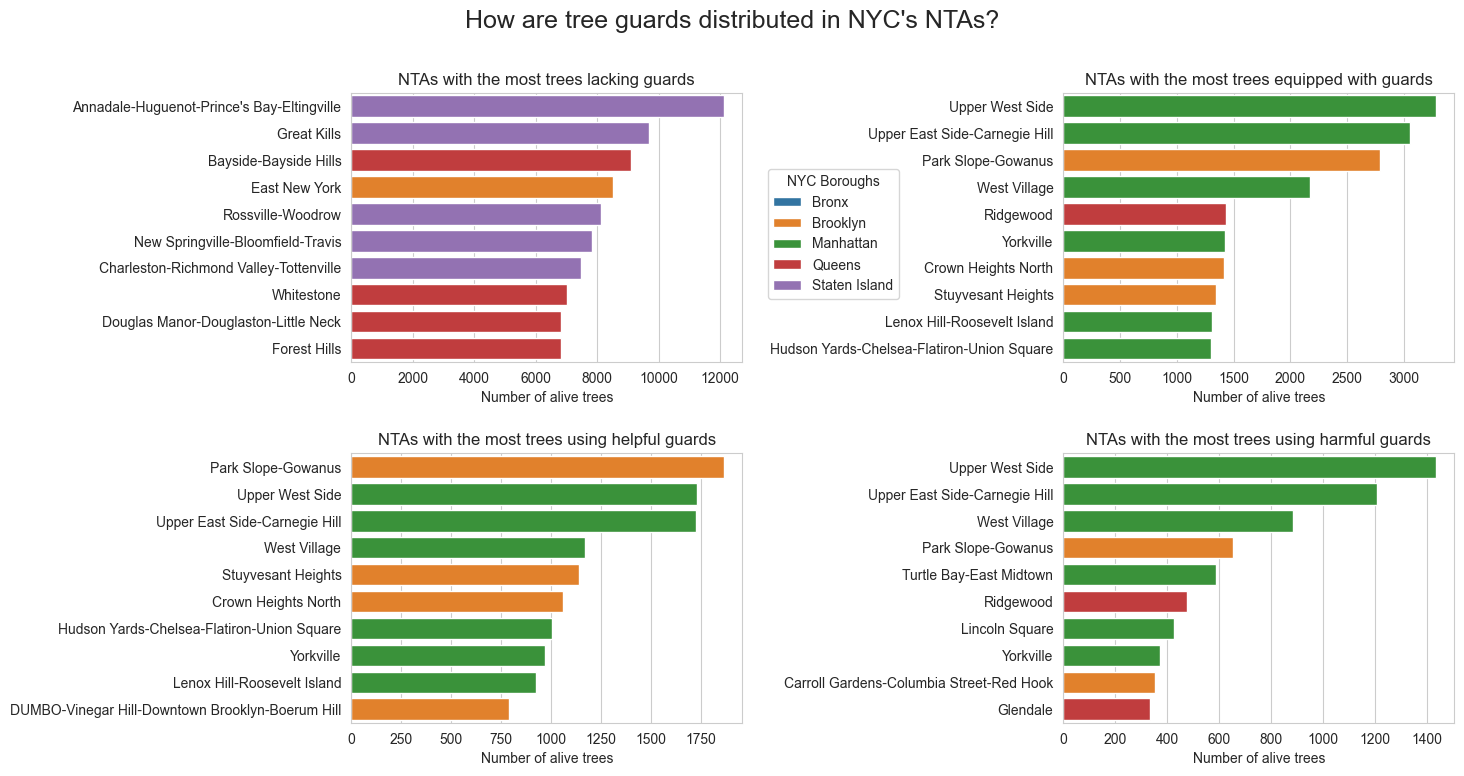

In [408]:
# Setting subplots and figure size
fig, ax = plt.subplots(2, 2, figsize=(15,8))

# Plotting figure 1
sns.barplot(data=no_guards, x="tree_id", y="nta_name", ax=ax[0,0], hue="borough")
ax[0,0].set(title="NTAs with the most trees lacking guards", xlabel="Number of alive trees", ylabel=None)
ax[0,0].legend().remove()

# Plotting figure 2
sns.barplot(data=all_guards, x="tree_id", y="nta_name", ax=ax[0,1], hue="borough")
ax[0,1].set(title="NTAs with the most trees equipped with guards", xlabel="Number of alive trees", ylabel=None)
ax[0,1].legend().remove()

# Plotting figure 3
sns.barplot(data=helpful_guards, x="tree_id", y="nta_name", ax=ax[1,0], hue="borough")
ax[1,0].set(title="NTAs with the most trees using helpful guards", xlabel="Number of alive trees", ylabel=None)
ax[1,0].legend().remove()

# Plotting figure 4
sns.barplot(data=harmful_guards, x="tree_id", y="nta_name", ax=ax[1,1], hue="borough")
ax[1,1].set(title="NTAs with the most trees using harmful guards", xlabel="Number of alive trees", ylabel=None)
ax[1,1].legend().remove()

# Setting the common legend of all the subplots
handles, labels = ax[0][0].get_legend_handles_labels() # Get handles and labels from the first subplot 
# Places common legend on the plot instead of individual legends for each subplot. Alternate fig.legend(). Use only if applicable.
plt.figlegend(handles, labels, loc="center", title="NYC Boroughs", bbox_to_anchor=(0.5,0.5,0.135,0.4)) 

# Setting figure super title and padding 
fig.suptitle("How are tree guards distributed in NYC's NTAs?", fontsize=18)
plt.tight_layout(pad=2);

> **Insights from Figure A**:
> 1. Out of the Top 10 NTAs with the highest number of trees without guards, five belong to Staten Island, followed by four that belong to Queens and one that belongs to Brooklyn.
> 2. Out of the Top 10 NTAs with the highest number of trees with guards, six belong to Manhattan, followed by three that belong to Brooklyn and one that belongs to Queens.
> 3. Out of the Top 10 NTAs with the highest number of trees with helpful guards, six belong to Manhattan, followed by four that belong to Brooklyn.
> 4. Out of the Top 10 NTAs with the highest number of trees with harmful guards, six belong to Manhattan, followed by two each that belong to Brooklyn and Queens.

B. **NTAs (Neighborhood Tabulation Areas) with 500 or more trees with guards, having the highest % of helpful and harmful guards**

Creating seperate `df`s that consist trees with any kind of guard and trees with helpful and harmful guards. Then, merging the helpful guards and harmful guards `df`s with all guards `df`. Then we find the helpful and harmful guards as a percentage of all trees with guards for each NTA.

In [409]:
all_guards1 = nta_and_guards[nta_and_guards["guards"] != "None"].groupby(["nta_name", "borough"], observed=True)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False)

helpful_guards1 = nta_and_guards[nta_and_guards["guards"] == "Helpful"].groupby(["nta_name", "borough"], observed=True)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False)

helpful_guards1 = helpful_guards1.merge(all_guards1, on=["nta_name", "borough"], how="left", suffixes=("_helpfulguards", "_allguards")).sort_values("tree_id_helpfulguards", ascending=False)
helpful_guards1["%"] = round(helpful_guards1["tree_id_helpfulguards"] / helpful_guards1["tree_id_allguards"] * 100, 2)
helpful_guards1 = helpful_guards1[helpful_guards1["tree_id_allguards"] >= 500]
# reset_index(drop=True, inplace=True) not needed here as explicit assignment is done. While preparing the the dfs for the previous visualizations, inplace=True was also used.
helpful_guards1 = helpful_guards1.sort_values("%", ascending=False).head(10).reset_index(drop=True)

harmful_guards1 = nta_and_guards[nta_and_guards["guards"] == "Harmful"].groupby(["nta_name", "borough"], observed=True)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False)

harmful_guards1 = harmful_guards1.merge(all_guards1, on=["nta_name", "borough"], how="left", suffixes=("_harmfulguards", "_allguards")).sort_values("tree_id_harmfulguards", ascending=False)
harmful_guards1["%"] = round((harmful_guards1["tree_id_harmfulguards"] / harmful_guards1["tree_id_allguards"]) * 100, 2)
harmful_guards1 = harmful_guards1[harmful_guards1["tree_id_allguards"] >= 500]
harmful_guards1 = harmful_guards1.sort_values("%", ascending=False).head(10).reset_index(drop=True)

**Note**: To ensure a meaningful representation, only NTAs with 500 or more trees with guards were considered for the visualization below. This criterion allows us to focus on NTAs with a substantial presence of guarded trees.

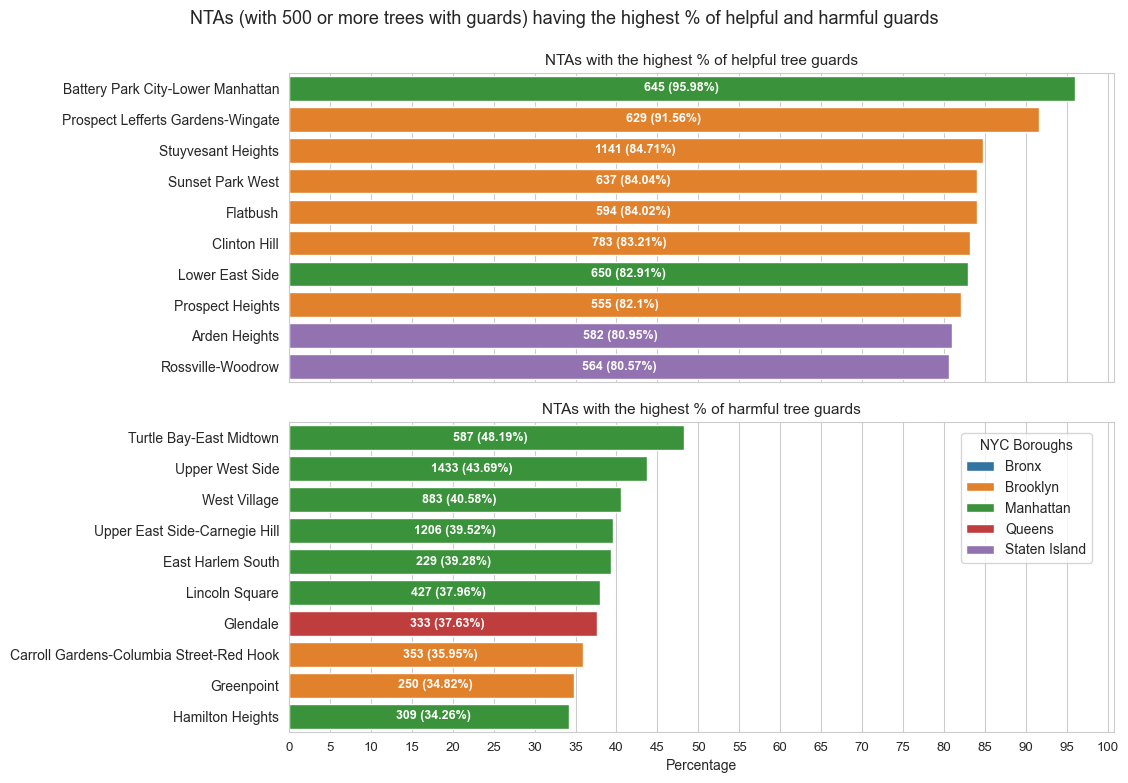

In [410]:
# Setting subplots, figure size and shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(11.5,8), sharex=True)

# Plotting figure 1
sns.barplot(data=helpful_guards1, x="%", y="nta_name", hue="borough", ax=ax[0])
ax[0].legend().remove()
ax[0].set(ylabel=None)
ax[0].set_title("NTAs with the highest % of helpful tree guards", fontsize=11)

# Annotating figure 1
for row in helpful_guards1.index:
    ax[0].annotate(f"{helpful_guards1["tree_id_helpfulguards"][row]} ({helpful_guards1["%"][row]}%)",
                   xy=(helpful_guards1["%"][row]/2, row), xytext=(0,0), textcoords= "offset points", va="center", ha="center",
                   fontsize=9, fontweight="semibold", color="white")

# Plotting figure 2
sns.barplot(data=harmful_guards1, x="%", y="nta_name", hue="borough", ax=ax[1])
ax[1].legend().remove()
ax[1].set(ylabel=None)
ax[1].set_title("NTAs with the highest % of harmful tree guards", fontsize=11)

# Annotating figure 2
for row in harmful_guards1.index:
    ax[1].annotate(f"{harmful_guards1["tree_id_harmfulguards"][row]} ({harmful_guards1["%"][row]}%)", 
                   xy=(harmful_guards1["%"][row]/2, row), xytext=(3,0), textcoords="offset points", va="center", ha="center",
                   fontsize=9, fontweight="semibold", color="white")

# Setting shared x-axis properties
ax[-1].set_xticks(np.arange(0,101,5))
ax[-1].set_xticklabels(np.arange(0,101,5), fontsize=9.5)
ax[-1].set_xlabel("Percentage")

# Setting the common legend of all the subplots
handles, labels = ax[0].get_legend_handles_labels() # Get handles and labels from the first subplot 
# Places common legend on the plot instead of individual legends for each subplot. Alternate fig.legend(). Use only if applicable.
plt.figlegend(handles, labels, loc="lower right", title="NYC Boroughs", bbox_to_anchor=(0,0.28,0.965,0)) 

# Setting figure super title and padding
fig.suptitle("NTAs (with 500 or more trees with guards) having the highest % of helpful and harmful guards", fontsize=13)
plt.tight_layout(pad=1.5)

> **Insights from Figure B**:
> 1. Out of the Top 10 NTAs having the highest percentage of helpful tree guards, six belong to Brooklyn, followed by two each that belong to Manhattan and Staten Island.
> 2. The NTA: Battery Park City-Lower Manhattan has the highest percentage of helpful tree guards (~96%) which could imply that the staff has installed almost all tree guards properly.
> 3. Out of the Top 10 NTAs having the highest percentage of harmful tree guards, seven belong to Manhattan, followed by two that belong to Brooklyn and one that belongs to Queens.
> 4. The NTA: Turtle Bay-East Midtown has the highest percentage of harmful tree guards (~48%) which could imply that the staff has not installed almost half of tree guards properly.
> 5. From Figure A, we observed that Manhattan (6) has a slightly larger contribution than Brooklyn (4) to the Top 10 NTAs with the highest number of trees with helpful guards. But from Figure B, Brooklyn (6) has a significantly larger contribution than Manhattan (2) to the Top 10 NTAs having the highest percentage of helpful tree guards.
> 6. From Figure A, we observed that Manhattan (6) has a significantly larger contribution than Brooklyn (2) to the Top 10 NTAs with the highest number of trees with harmful guards. From Figure B, a similar trend is observed, Manhattan (7) has a significantly larger contribution than Brooklyn (2) to the Top 10 NTAs having the highest percentage of harmful tree guards.

C. **NTAs (Neighborhood Tabulation Areas) with 100 or more trees (in total), having the highest and lowest % of trees without guards**

Creating seperate `df`s that consist of all trees with or without guards and trees with no guards. Then, merging the no guards `df` with all trees `df`. Then we find the trees without guards as a percentage of all trees for each NTA.

In [411]:
all_trees = nta_and_guards.groupby(["nta_name", "borough"], observed=True)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False)

no_guards1 = nta_and_guards[nta_and_guards["guards"] == "None"].groupby(["nta_name", "borough"], observed=True)["tree_id"].sum().reset_index().sort_values("tree_id", ascending=False)

no_guards1 = no_guards1.merge(all_trees, on=["nta_name", "borough"], how="left", suffixes=("_noguards", "_alltrees")).sort_values("tree_id_noguards", ascending=False)
no_guards1["%"] = round((no_guards1["tree_id_noguards"] / no_guards1["tree_id_alltrees"]) * 100, 2)
no_guards1 = no_guards1[no_guards1["tree_id_alltrees"] >= 100]
no_guards1 = no_guards1.sort_values("%",ascending=False)

# reset_index(drop=True, inplace=True) not needed here as explicit assignment is done.
top_no_guards = no_guards1.head(10).reset_index(drop=True)
bottom_no_guards = no_guards1.tail(10).reset_index(drop=True)

**Note**: To ensure a meaningful representation, only NTAs with 100 or more trees (in total) were considered for the visualization below. This criterion allows us to focus on NTAs with a considerable presence of trees.

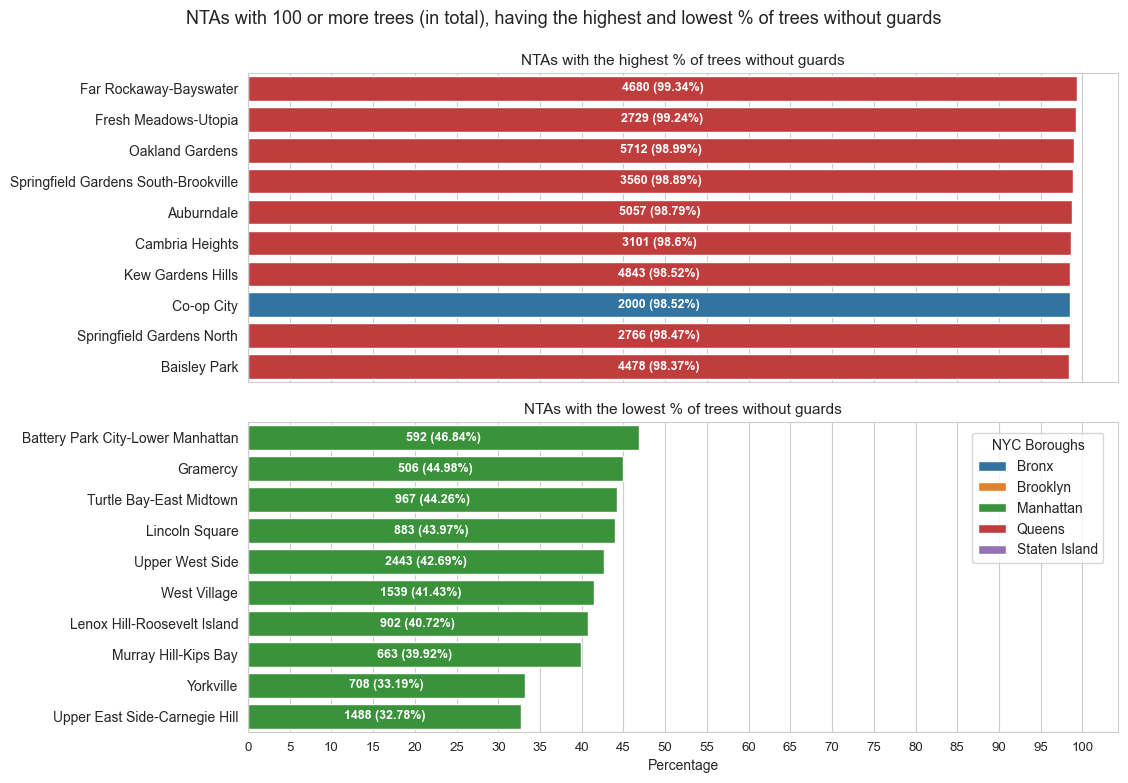

In [412]:
# Setting subplots, figure size and shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(11.5,8), sharex=True)

# Plotting figure 1
sns.barplot(data=top_no_guards, x="%", y="nta_name", ax=ax[0], hue="borough")
ax[0].legend().remove()
ax[0].set(ylabel=None)
ax[0].set_title("NTAs with the highest % of trees without guards", fontsize=11)

# Annotating figure 1
for row in top_no_guards.index:
    ax[0].annotate(f"{top_no_guards["tree_id_noguards"][row]} ({top_no_guards["%"][row]}%)",
                   xy=(top_no_guards["%"][row]/2, row), xytext=(0,0), textcoords= "offset points", va="center", ha="center",
                   fontsize=9, fontweight="semibold", color="white")

# Plotting figure 2
sns.barplot(data=bottom_no_guards, x="%", y="nta_name", ax=ax[1], hue="borough")
ax[1].legend().remove()
ax[1].set(ylabel=None)
ax[1].set_title("NTAs with the lowest % of trees without guards", fontsize=11)

# Annotating figure 2
for row in bottom_no_guards.index:
    ax[1].annotate(f"{bottom_no_guards["tree_id_noguards"][row]} ({bottom_no_guards["%"][row]}%)",
                   xy=(bottom_no_guards["%"][row]/2, row), xytext=(0,0), textcoords= "offset points", va="center", ha="center",
                   fontsize=9, fontweight="semibold", color="white")

# Setting shared x-axis properties
ax[-1].set_xticks(np.arange(0,101,5))
ax[-1].set_xticklabels(np.arange(0,101,5), fontsize=9.5)
ax[-1].set_xlabel("Percentage")

# Setting the common legend of all the subplots
handles, labels = ax[0].get_legend_handles_labels() # Get handles and labels from the first subplot 
# Places common legend on the plot instead of individual legends for each subplot. Alternate fig.legend(). Use only if applicable.
plt.figlegend(handles, labels, loc="lower right", title="NYC Boroughs", bbox_to_anchor=(0,0.28,0.975,0))

# Setting figure super title and padding
fig.suptitle("NTAs with 100 or more trees (in total), having the highest and lowest % of trees without guards", fontsize=13)
plt.tight_layout(pad=1.5)

> **Insights from Figure C**:
> 1. Out of the Top 10 NTAs having highest percentage of trees without guards, almost all, nine belong to Queens, followed by one that belongs to Bronx.
> 2. The NTA: Far Rockaway-Bayswater has the highest percentage of trees without guards (~99%) which shows that very few guards were installed here. The same can be said for all the NTAs in the Top 10 as all of them have <2% of trees with guards installed.
> 3. Out of the Top 10 NTAs having the lowest percentage of trees without guards, all ten belong to Manhattan.
> 4. The NTA: Upper East Side-Carnegie Hill has the lowest percentage of trees without guards (~33%) which shows that guards are installed on nearly two-thirds of the trees in this area.
> 5. From Figure A, we observed that Staten Island (5) has a slightly larger contribution than Queens (4) to the Top 10 NTAs with the highest number of trees without guards. But from Figure C, Queens (9) has the largest contribution followed only by Bronx (1) to the Top 10 NTAs having highest percentage of trees without guards, with Staten Island not making it to the Top 10 of this list. 
> 6. From Figure A, we observed that Manhattan (6) has a considerably larger contribution than Brooklyn (3) to the Top 10 NTAs with the highest number of trees with guards. But from Figure C, all the Top 10 NTAs having the lowest percentage of trees without guards belong to Manhattan.

#### 12. Tree Problems in NYC

Creating a `df` the consists of all tree problems, renaming them and using `.apply(pd.Series.value_counts)` to find the count of yes and no values of each column in `tree_problems` (Will work only when all columns have the same set of unique values, here: yes and no)

In [413]:
tree_problems = tree_sub_df[["root_stone", "root_grate", "root_other", "trunk_wire", "trnk_light", "trnk_other", "brch_light", "brch_shoe", "brch_other"]]
tree_problems.columns = ["Root problems caused by paving stones in tree bed", "Root problems caused by metal grates", 
                         "Other root problems", "Trunk problems caused by rope or wires", "Trunk problems caused by lights", 
                         "Other trunk problems", "Branch problems caused by lights or wires", "Branch problems caused by shoes",
                         "Other branch problems"]
tree_problems_count = tree_problems.apply(pd.Series.value_counts)
tree_problems_count

Root problems caused by paving stones in tree bed  \
No                                              543733   
Yes                                             139999   

     Root problems caused by metal grates  Other root problems  \
No                                 680196               653410   
Yes                                  3536                30322   

     Trunk problems caused by rope or wires  Trunk problems caused by lights  \
No                                   670458                           682701   
Yes                                   13274                             1031   

     Other trunk problems  Branch problems caused by lights or wires  \
No                 651159                                     621367   
Yes                 32573                                      62365   

     Branch problems caused by shoes  Other branch problems  
No                            683321                 659377  
Yes                              411                  24355

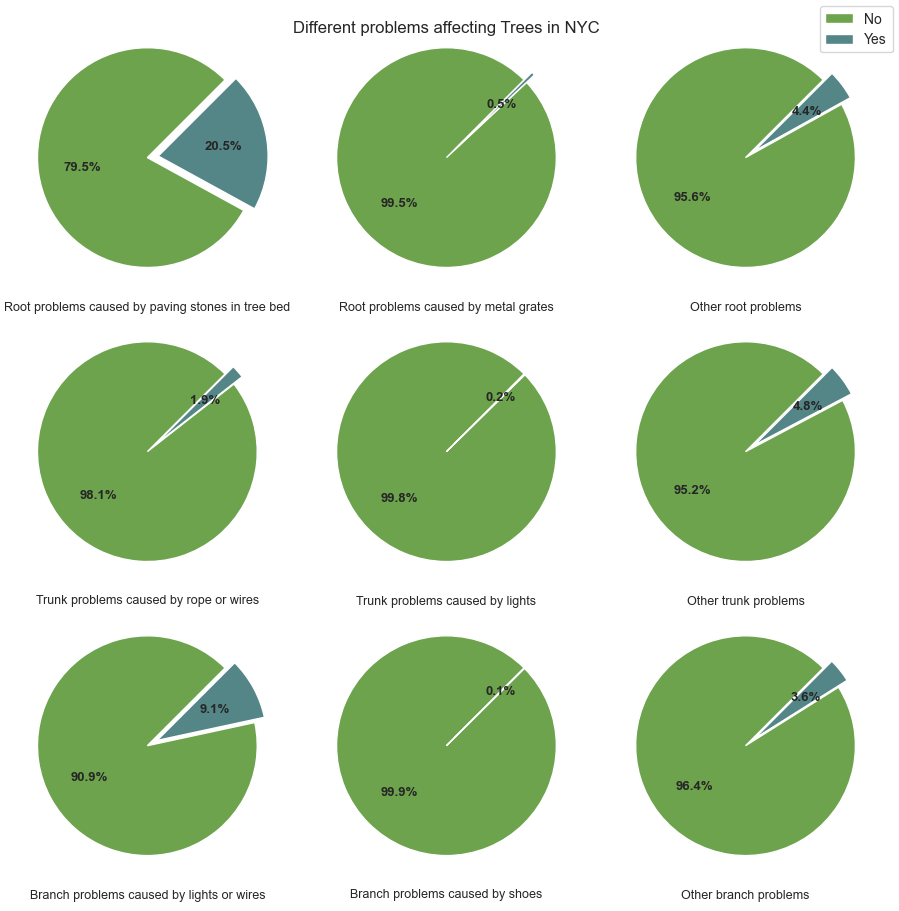

In [414]:
# Setting the subplots and figure size
fig, ax = plt.subplots(3, 3, figsize=(9,9))

# Plotting the figure
# labeldistance=None: implies labels are not drawn, but are stored for use in legend()
tree_problems_count.plot(kind="pie", subplots=True, ax=ax, legend=False, colors= ["#6DA34D", "#548687"], startangle=45,
                         autopct="%.1f%%", labeldistance=None, explode=[0, 0.1], textprops= {"fontsize": "9.5", "fontweight": 551})  

# By default columns names show up as ylabels for the pie charts. We have displayed these column names as xlabels
for x in range(3):
    for y in range(3):
        ax[x][y].set_xlabel(ax[x][y].get_ylabel(), fontsize=9, ha="center") 
        ax[x][y].set(ylabel=None) # Removed ylabels

# Setting the common legend of all the subplots
handles, labels = ax[0][0].get_legend_handles_labels() # Get handles and labels from the first subplot 
# Places common legend on the plot instead of individual legends for each subplot. Alternate fig.legend(). Use only if applicable.
plt.figlegend(handles, labels, loc="upper right") 

# Setting figure super title and padding 
fig.suptitle("Different problems affecting Trees in NYC")
plt.tight_layout(pad=0.1);

> **Insights**:
> 1. The most commonly occurring defined tree problems are root problems caused by paving stones in the tree bed, affecting ~21% of trees followed by branch problems caused by lights or wires, affecting ~9% of the trees and finally, trunk problems caused by rope or wires, affecting ~2% of the trees.
> 2. Tree Problems like root problems caused by metal grates, trunk problems caused by lights and branch problems caused by shoes affect 0.5%, 0.2% and 0.1% of trees respectively.
> 3. The other branch, root, and trunk problems affect ~4%-5% of trees. Other trunk problems have the highest percentage among the three, this could be because trunks are the most accessible part of a tree. Emphasis should be placed on defining the Top 3 or Top 5 other tree problems to better identify and resolve them.
> 4. Most of the defined tree problems can be easily mitigated by vigilance and proper maintenance by the NYC Parks Staff and raising public awareness, except root problems caused by paving stones in the tree bed, which may require government intervention.

#### 13. Is there any co-relation between the Health of Alive Trees and their Diameter?

Using a box plot to find out the median and mean diameters of alive trees with different health

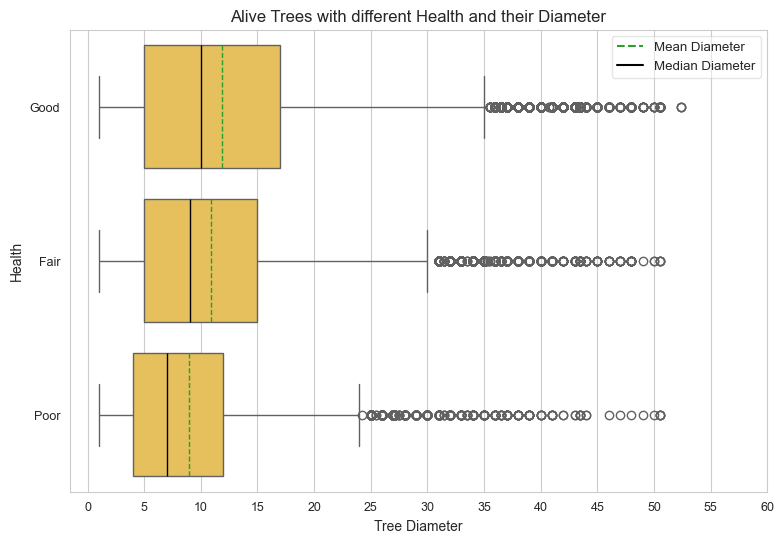

In [415]:
# Setting figure size and order of tree health
plt.figure(figsize=(9,6))
order= ["Good", "Fair", "Poor"]

# Plotting the figure
ax = sns.boxplot(data=tree_sub_df, x="tree_dbh", y="health", order=order, color="#FCCA46", showmeans=True, meanline=True,
           medianprops={"color":"black"}) # showmeans allows displaying the mean value and meanline=True displays it as a dotted line rather than a triangle marker

# Setting axes parameters
ax.set(title="Alive Trees with different Health and their Diameter", ylabel="Health", xlabel="Tree Diameter")
ax.set_xticks(np.arange(0,61,5))
ax.tick_params(axis="x", labelsize=9)
ax.set_yticks(np.arange(len(order)), labels=order)
ax.tick_params(axis="y", labelsize=9)

# Plotting custom legend for the figure
custom_lines = [Line2D([], [], color="#2ca02c", linestyle="--"), Line2D([], [], color="black")]
plt.legend(handles=custom_lines, labels=["Mean Diameter", "Median Diameter"], fontsize=9.5, framealpha=0.5);

> **Insights**: Alive Trees with better health have been observed to have larger mean and median diameters.

#### 14. Distributions of the Tree Species with the largest Diameter

Pivoting `tree_sub_df` with `spc_common` (species name) as column and `tree_dbh` (tree diameter) as values to get the tree species and their diameters in one column.  

**Note**: Species name, `spc_common` is only recorded for alive trees.

In [416]:
species_pivot = tree_sub_df.pivot(columns="spc_common", values="tree_dbh")
species_pivot

spc_common  'Schubert' Chokecherry  American Beech  American Elm  \
0                              NaN             NaN           NaN   
1                              NaN             NaN           NaN   
2                              NaN             NaN           NaN   
3                              NaN             NaN           NaN   
4                              NaN             NaN           NaN   
...                            ...             ...           ...   
683727                         NaN             NaN           NaN   
683728                         NaN             NaN           NaN   
683729                         NaN             NaN           NaN   
683730                         NaN             NaN           NaN   
683731                         NaN             NaN           NaN   

spc_common  American Hophornbeam  American Hornbeam  American Larch  \
0                            NaN                NaN             NaN   
1                            NaN                NaN             NaN   
2                            NaN                NaN             NaN   
3                            NaN                NaN             NaN   
4                            NaN                NaN             NaN   
...                          ...                ...             ...   
683727                       NaN                NaN             NaN   
683728                       NaN                NaN             NaN   
683729                       NaN                NaN             NaN   
683730                       NaN                NaN             NaN   
683731                       NaN                NaN             NaN   

spc_common  American Linden  Amur Cork Tree  Amur Maackia  Amur Maple  \
0                       NaN             NaN           NaN         NaN   
1                       NaN             NaN           NaN         NaN   
2                       NaN             NaN           NaN         NaN   
3                       NaN             NaN           NaN         NaN   
4                      21.0             NaN           NaN         NaN   
...                     ...             ...           ...         ...   
683727                  NaN             NaN           NaN         NaN   
683728                  NaN             NaN           NaN         NaN   
683729                  NaN             NaN           NaN         NaN   
683730                  NaN             NaN           NaN         NaN   
683731                  NaN             NaN           NaN         NaN   

spc_common  Arborvitae  Ash  Atlantic White Cedar  Atlas Cedar  Bald Cypress  \
0                  NaN  NaN                   NaN          NaN           NaN   
1                  NaN  NaN                   NaN          NaN           NaN   
2                  NaN  NaN                   NaN          NaN           NaN   
3                  NaN  NaN                   NaN          NaN           NaN   
4                  NaN  NaN                   NaN          NaN           NaN   
...                ...  ...                   ...          ...           ...   
683727             NaN  NaN                   NaN          NaN           NaN   
683728             NaN  NaN                   NaN          NaN           NaN   
683729             NaN  NaN                   NaN          NaN           NaN   
683730             NaN  NaN                   NaN          NaN           NaN   
683731             NaN  NaN                   NaN          NaN           NaN   

spc_common  Bigtooth Aspen  Black Cherry  Black Locust  Black Maple  \
0                      NaN           NaN           NaN          NaN   
1                      NaN           NaN           NaN          NaN   
2                      NaN           NaN           NaN          NaN   
3                      NaN           NaN           NaN          NaN   
4                      NaN           NaN           NaN          NaN   
...                    ...           ...           ...          ..

**An example for understanding**:  
Here, we consider the column for the London Planetree species for simplicity. We drop the nulls and convert the pandas series to an array using `.values`. This is done because `boxplot_stats()` needs an array an input.  

Then, `boxplot_stats` returns a list of dictionaries containing the statistics used to draw a series of box and whisker plots (only 1 set of boxplot stats are returned here for the single species in question).

In [417]:
london_planetree_stats = boxplot_stats(species_pivot["London Planetree"].dropna().values)[0] 
london_planetree_stats

{'mean': 21.518560231686855,
 'iqr': 11.0,
 'cilo': 21.941453926876434,
 'cihi': 22.058546073123566,
 'whishi': 43.5,
 'whislo': 1.0,
 'fliers': array([], dtype=float64),
 'q1': 16.0,
 'med': 22.0,
 'q3': 27.0}

We get the stats for all the columns (species) using a list comprehension. Then, the list of dictionaries is converted to a `df` where `.iloc[]`is used to select only the relavant stats which are to be annotated.  

**Tip**: `.iloc[]` takes integer index to refer columns and `.loc[]` takes column name to refer columns. Rows are referred as numbers in both.

In [418]:
species_stats_list = [boxplot_stats(species_pivot[column].dropna().values)[0] for column in species_pivot.columns] 

species_stats_df = pd.DataFrame(data=species_stats_list, index=species_pivot.columns).iloc[:, [4,5,7,8,9]].round(2) 
species_stats_df

whishi  whislo   q1   med     q3
spc_common                                              
'Schubert' Chokecherry   10.50     1.0  3.0   4.0   6.00
American Beech           13.00     1.0  3.0   4.0   7.00
American Elm             36.50     1.0  4.0  10.0  17.00
American Hophornbeam     13.00     1.0  3.0   4.0   7.00
American Hornbeam        10.50     1.0  3.0   4.0   6.00
...                        ...     ...  ...   ...    ...
Weeping Willow           41.00     1.0  7.0  14.0  23.00
White Ash                28.00     2.0  8.0  12.0  16.00
White Oak                15.50     1.0  3.0   4.0   8.00
White Pine               35.38     1.0  6.0  11.0  17.75
Willow Oak               36.50     1.0  4.0  10.0  17.00

[134 rows x 5 columns]

Getting the Top 10 Tree Species by Median Diameter

In [419]:
median_dia = tree_sub_df.groupby("spc_common")[["tree_dbh"]].median().sort_values("tree_dbh", ascending=False).head(10)
median_dia

tree_dbh
spc_common                  
London Planetree        22.0
Silver Maple            21.0
Pin Oak                 17.0
Eastern Cottonwood      16.0
Pignut Hickory          15.0
Horse Chestnut          15.0
Norway Maple            14.0
Weeping Willow          14.0
Sycamore Maple          14.0
Green Ash               13.0

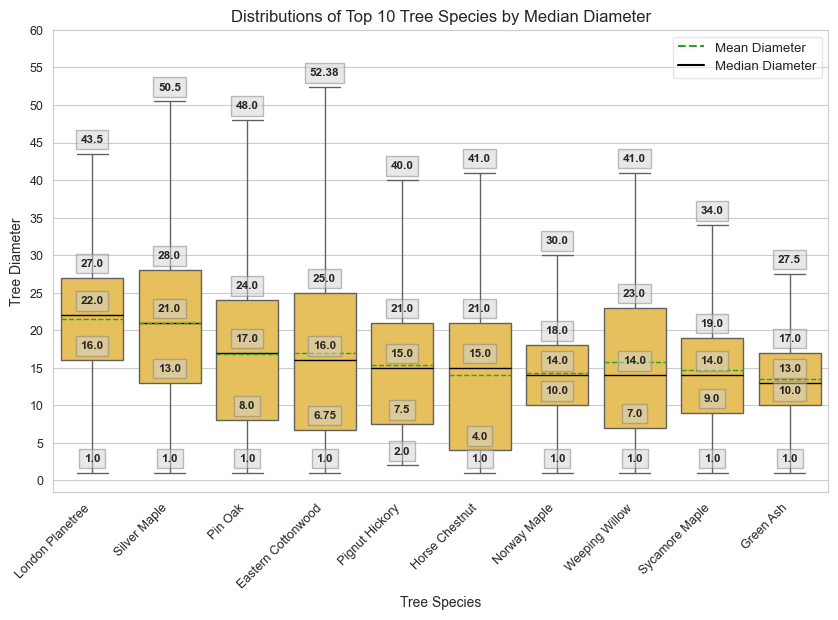

In [420]:
# Setting figure size and order of tree species
plt.figure(figsize=(10,6))
order=median_dia.index

# Storing the boxplot stats of the trees with Top 10 median diameters, in the top_species_stats df
top_species_stats = species_stats_df.sort_values("med", ascending=False).head(10)

# Plotting the figure
ax = sns.boxplot(data=tree_sub_df, x="spc_common", y="tree_dbh", order=order, color="#FCCA46", showmeans=True, meanline=True,
                medianprops={"color": "black"})

# Setting the axes parameters
ax.set(title="Distributions of Top 10 Tree Species by Median Diameter", xlabel="Tree Species", ylabel="Tree Diameter")
ax.set_yticks(np.arange(0,61,5))
ax.tick_params(axis="y", labelsize=9)
ax.set_xticks(np.arange(len(median_dia.index))) # Setting the number of ticks and their locations

# Setting the tick labels. ax.set_xticklabels used instead of ax.tick_params to use parameter: ha
ax.set_xticklabels(median_dia.index, fontsize=9, rotation=45, ha="right");  

# Annotating the figure
for rows in top_species_stats.index:
    for col in top_species_stats.columns:
        ax.annotate(top_species_stats[col][rows], xy=(rows, top_species_stats[col][rows]), xytext=(0,8),
                    textcoords="offset points", ha="center", fontsize=8.5, fontweight="bold",
                    bbox=dict(boxstyle=("square, pad=0.4"), facecolor="lightgrey", edgecolor="grey", alpha=0.5))

# Plotting same custom legend used in the previous visualization
plt.legend(handles=custom_lines, labels=["Mean Diameter", "Median Diameter"], fontsize=9.5, framealpha=0.5);

> **Insights**:
> 1. London Planetree has the highest overall median diameter: 22 inches.
> 3. In the Top 10 Tree Species by Median Diameter, Silver Maple has the highest 75th percentile diameter: 28 inches and London Planetree has the highest 25th percentile diameter: 16 inches.
> 4. In the Top 10 Tree Species by Median Diameter, Green Ash has the smallest Inter-Quartile range (IQR): 17-10 = 7 inches. This indicates that nearly 50% of the Green Ash trees have their diameter in the range of 10-17 inches.

#### 15. Outlier Analysis: Alive, Dead trees and Stumps

Defining a custom function to wrap long tick labels

In [421]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    wrapped_labels = [textwrap.fill(label.get_text(), width=width, break_long_words=break_long_words) for 
                      label in ax.get_xticklabels()]
    return wrapped_labels

A. **Outlier Analysis of Alive Trees**

Preparing the `df`s which will be used to visualize the four subplots of alive outlier trees

In [422]:
# Using .to_frame below will result in a df with "health" as index
alive_trees_outliers_health = alive_trees_outliers["health"].value_counts().head(3).to_frame()

# Using .reset_index() below will result in a df with "spc_common" as a column rather than an index
alive_trees_outliers_species = alive_trees_outliers["spc_common"].value_counts().reset_index().head(10)

alive_trees_nta = alive_trees_plot["nta_name"].value_counts().reset_index() # Will be merged with alive_trees_outliers_nta
alive_trees_outliers_nta = alive_trees_outliers["nta_name"].value_counts().reset_index().head(10)
merged_alive_outliers_nta = alive_trees_outliers_nta.merge(alive_trees_nta, on="nta_name", how="left", suffixes=("_outliers", "_all"))
merged_alive_outliers_nta["%outliers"] = ((merged_alive_outliers_nta["count_outliers"]/merged_alive_outliers_nta["count_all"])*100).round(1)

alive_trees_outliers_usertype = alive_trees_outliers["user_type"].value_counts().reset_index()
alive_trees_usertype = tree_sub_df[tree_sub_df["status"] == "Alive"].user_type.value_counts().reset_index()
merged_alive_outliers_usertype = alive_trees_outliers_usertype.merge(alive_trees_usertype, on="user_type", how="left", suffixes=("_outliers", "_all"))
merged_alive_outliers_usertype["%outliers"] = ((merged_alive_outliers_usertype["count_outliers"]/merged_alive_outliers_usertype["count_all"])*100).round(1)

Using `plt.subplot2grid()` to include subplots of varying sizes which is not possible in `plt.subplots()`.  

**Tip**: Ensure that the shape parameter is consistent for all the subplots as it defines the overall size of the grid in which all the subplots will be placed

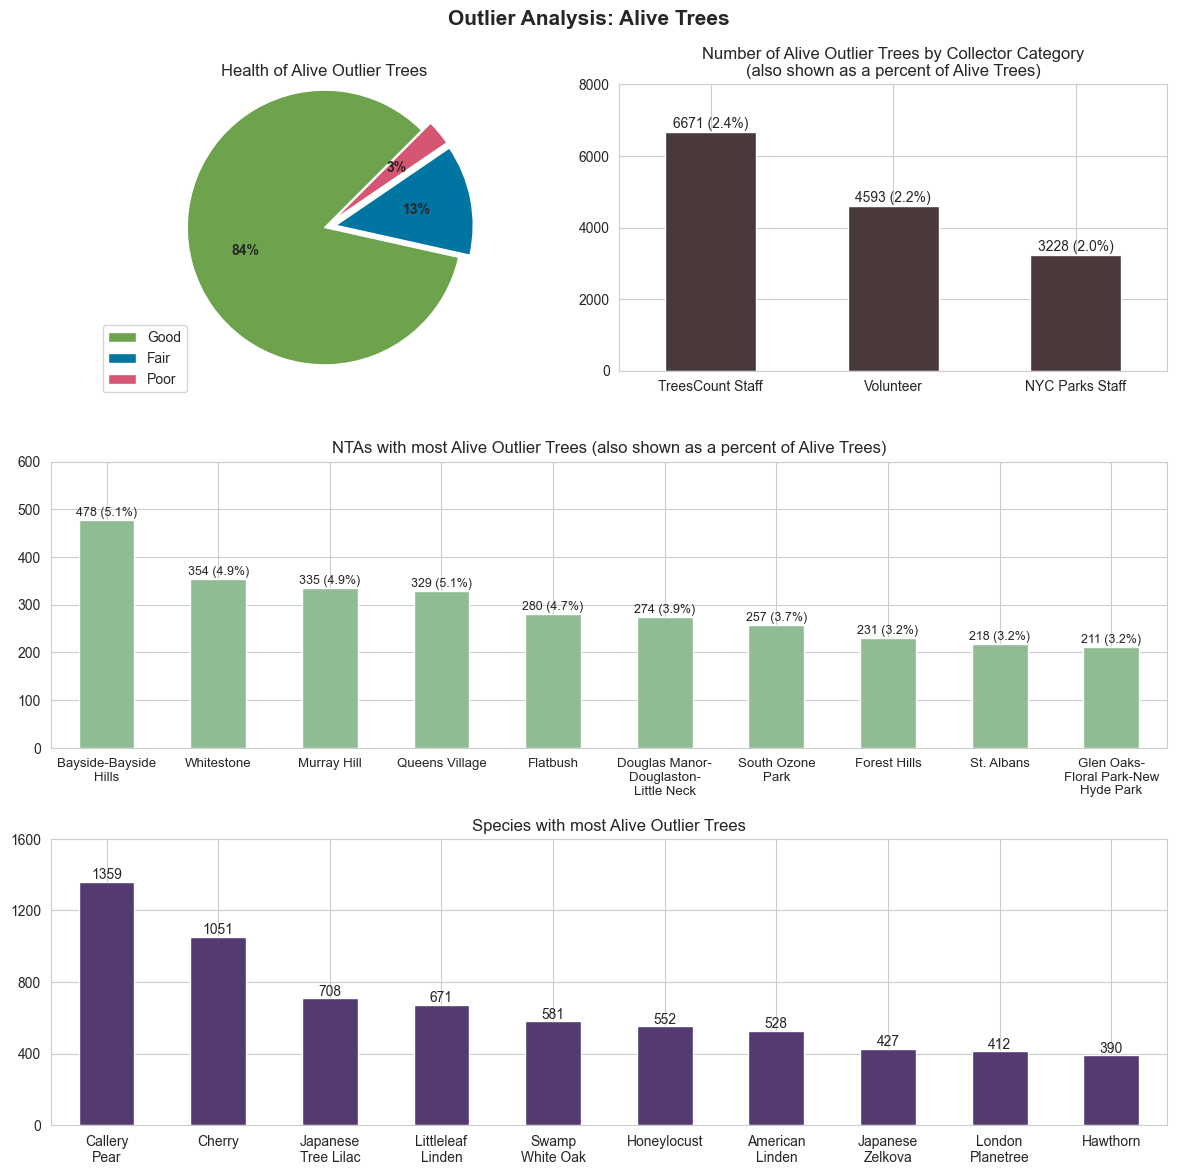

In [423]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid(shape=(3,2), loc=(0,0), rowspan=1, colspan=1)

alive_trees_outliers_health.plot(kind="pie", ax=ax1, y="count", startangle=45, colors=["#6DA34D", "#0075A2", "#D55672"], 
                                 radius= 1.2, explode=[0,0.1,0.1], autopct="%.0f%%", labeldistance=None, 
                                 textprops= {"fontsize": 10, "fontweight": "bold"})
ax1.legend(bbox_to_anchor=(-0.3,-0.1), loc="lower left") # lower left corner of the bbox will be placed at (-0.2,-0.1)
ax1.set_ylabel(None)
ax1.set_title("Health of Alive Outlier Trees")

ax2 = plt.subplot2grid(shape=(3,2), loc=(0,1), rowspan=1, colspan=1)

merged_alive_outliers_usertype.plot(kind="bar", x="user_type", y="count_outliers", ax=ax2, color="#49393B")
ax2.legend().remove()
ax2.set(title=f"Number of Alive Outlier Trees by Collector Category\n(also shown as a percent of Alive Trees)", ylabel=None, xlabel=None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=10)
ax2.set_yticks(np.arange(0,8001,2000), labels=np.arange(0,8001,2000), fontsize=10)

for row in alive_trees_outliers_usertype.index:
    ax2.annotate(text=f"{merged_alive_outliers_usertype["count_outliers"][row]} ({merged_alive_outliers_usertype["%outliers"][row]}%)",
                 xy=(row, merged_alive_outliers_usertype["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=10)

ax3 = plt.subplot2grid(shape=(3,2), loc=(1,0), rowspan=1, colspan=2)

merged_alive_outliers_nta.plot(kind="bar", x="nta_name", y="count_outliers", ax=ax3, color="#8FBC94")
ax3.legend().remove()
ax3.set(title="NTAs with most Alive Outlier Trees (also shown as a percent of Alive Trees)", xlabel=None, ylabel=None)
wrapped_labels = wrap_labels(ax3,15) # Function "wrap_labels" is defined above (wraps ticklabels)
ax3.set_xticklabels(labels=wrapped_labels, rotation=0, fontsize=9.5) 
ax3.set_yticks(np.arange(0,601,100), labels=np.arange(0,601,100), fontsize=10)

for row in merged_alive_outliers_nta.index:
    ax3.annotate(text=f"{merged_alive_outliers_nta["count_outliers"][row]} ({merged_alive_outliers_nta["%outliers"][row]}%)",
                 xy=(row, merged_alive_outliers_nta["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=9)

ax4 = plt.subplot2grid(shape=(3,2), loc=(2,0), rowspan=1, colspan=2)

alive_trees_outliers_species.plot(kind="bar", x="spc_common", y="count", ax=ax4, color="#533A71")
ax4.legend().remove()
ax4.set(title="Species with most Alive Outlier Trees", ylabel=None, xlabel=None)
wrapped_labels = wrap_labels(ax4,10)
ax4.set_xticklabels(labels=wrapped_labels, rotation=0, fontsize=10);
ax4.set_yticks(np.arange(0,1601,400), labels=np.arange(0,1601,400), fontsize=10)

for row in alive_trees_outliers_species.index:
    ax4.annotate(text=alive_trees_outliers_species["count"][row], xy=(row, alive_trees_outliers_species["count"][row]),
                 xytext=(0,2), textcoords="offset points", ha="center", fontsize=10)

plt.suptitle("Outlier Analysis: Alive Trees", fontsize=15, fontweight="bold")
plt.tight_layout(pad=1.5)

B. **Outlier Analysis of Dead Trees**

Preparing the `df`s which will be used to visualize the two subplots of dead outlier trees

In [424]:
dead_trees_outliers_usertype = dead_trees_outliers["user_type"].value_counts().reset_index()
dead_trees_usertype = tree_sub_df[tree_sub_df["status"] == "Dead"].user_type.value_counts().reset_index()
merged_dead_outliers_usertype = dead_trees_outliers_usertype.merge(dead_trees_usertype, on="user_type", how="left", suffixes=("_outliers", "_all"))
merged_dead_outliers_usertype["%outliers"] = ((merged_dead_outliers_usertype["count_outliers"]/merged_dead_outliers_usertype["count_all"])*100).round(1)

dead_trees_nta = tree_sub_df[tree_sub_df["status"] == "Dead"].nta_name.value_counts().reset_index()
dead_trees_outliers_nta = dead_trees_outliers["nta_name"].value_counts().reset_index().head(10)
merged_dead_outliers_nta = dead_trees_outliers_nta.merge(dead_trees_nta, on="nta_name", how="left", suffixes=("_outliers", "_all"))
merged_dead_outliers_nta["%outliers"] = ((merged_dead_outliers_nta["count_outliers"]/merged_dead_outliers_nta["count_all"])*100).round(1)

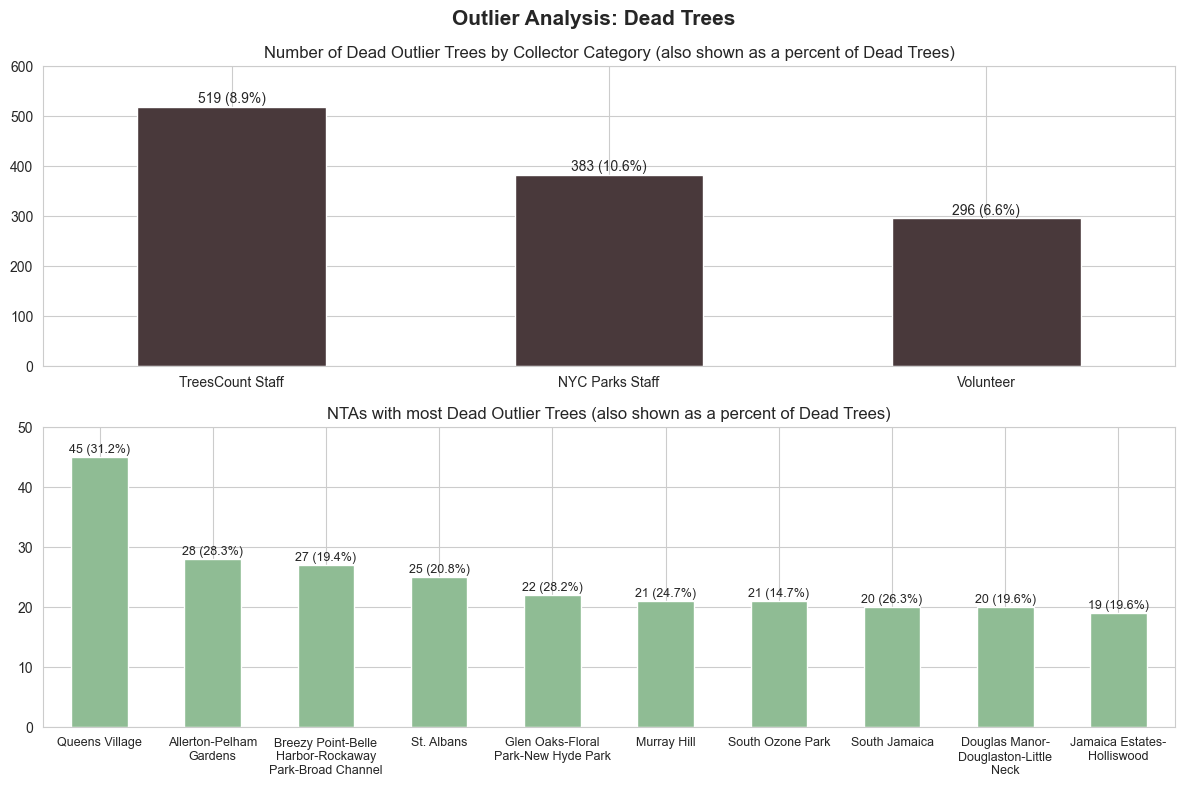

In [425]:
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0), rowspan=1, colspan=1)

merged_dead_outliers_usertype.plot(kind="bar", x="user_type", y="count_outliers", ax=ax1, color="#49393B")
ax1.legend().remove()
ax1.set(title="Number of Dead Outlier Trees by Collector Category (also shown as a percent of Dead Trees)", xlabel=None, ylabel=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=10)
ax1.set_yticks(np.arange(0,601,100), labels=np.arange(0,601,100), fontsize=10)

for row in dead_trees_outliers_usertype.index:
    ax1.annotate(text=f"{merged_dead_outliers_usertype["count_outliers"][row]} ({merged_dead_outliers_usertype["%outliers"][row]}%)",
                 xy=(row, merged_dead_outliers_usertype["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=10)

ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0), rowspan=1, colspan=1)

merged_dead_outliers_nta.plot(kind="bar", x="nta_name", y="count_outliers", ax=ax2, color="#8FBC94")
ax2.legend().remove()
ax2.set(title="NTAs with most Dead Outlier Trees (also shown as a percent of Dead Trees)", xlabel=None, ylabel=None)
wrapped_labels = wrap_labels(ax2,20)
ax2.set_xticklabels(labels=wrapped_labels, rotation=0, fontsize=9)
ax2.set_yticks(np.arange(0,51,10), labels=np.arange(0,51,10), fontsize=10)

for row in (merged_dead_outliers_nta.index):
    ax2.annotate(text=f"{merged_dead_outliers_nta["count_outliers"][row]} ({merged_dead_outliers_nta["%outliers"][row]}%)", 
                 xy=(row,merged_dead_outliers_nta["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=9)

fig.suptitle("Outlier Analysis: Dead Trees", fontsize=15, fontweight="bold")
plt.tight_layout(pad=1.2)

C. **Outlier Analysis of Stumps**

Preparing the `df`s which will be used to visualize the two subplots of outlier stumps 

In [426]:
stumps_outliers_usertype = stumps_outliers["user_type"].value_counts().reset_index()
stumps_usertype = tree_sub_df[tree_sub_df["status"] == "Stump"].user_type.value_counts().reset_index()
merged_stumps_outliers_usertype = stumps_outliers_usertype.merge(stumps_usertype, on="user_type", how="left", suffixes=("_outliers", "_all"))
merged_stumps_outliers_usertype["%outliers"] = ((merged_stumps_outliers_usertype["count_outliers"]/merged_stumps_outliers_usertype["count_all"])*100).round(1)

stumps_outliers_nta = stumps_outliers["nta_name"].value_counts().reset_index().head(10)
stumps_nta = tree_sub_df[tree_sub_df["status"] == "Stump"].nta_name.value_counts().reset_index()
merged_stumps_outliers_nta = stumps_outliers_nta.merge(stumps_nta, on="nta_name", how="left", suffixes=("_outliers", "_all"))
merged_stumps_outliers_nta["%outliers"] = ((merged_stumps_outliers_nta["count_outliers"]/merged_stumps_outliers_nta["count_all"])*100).round(1)

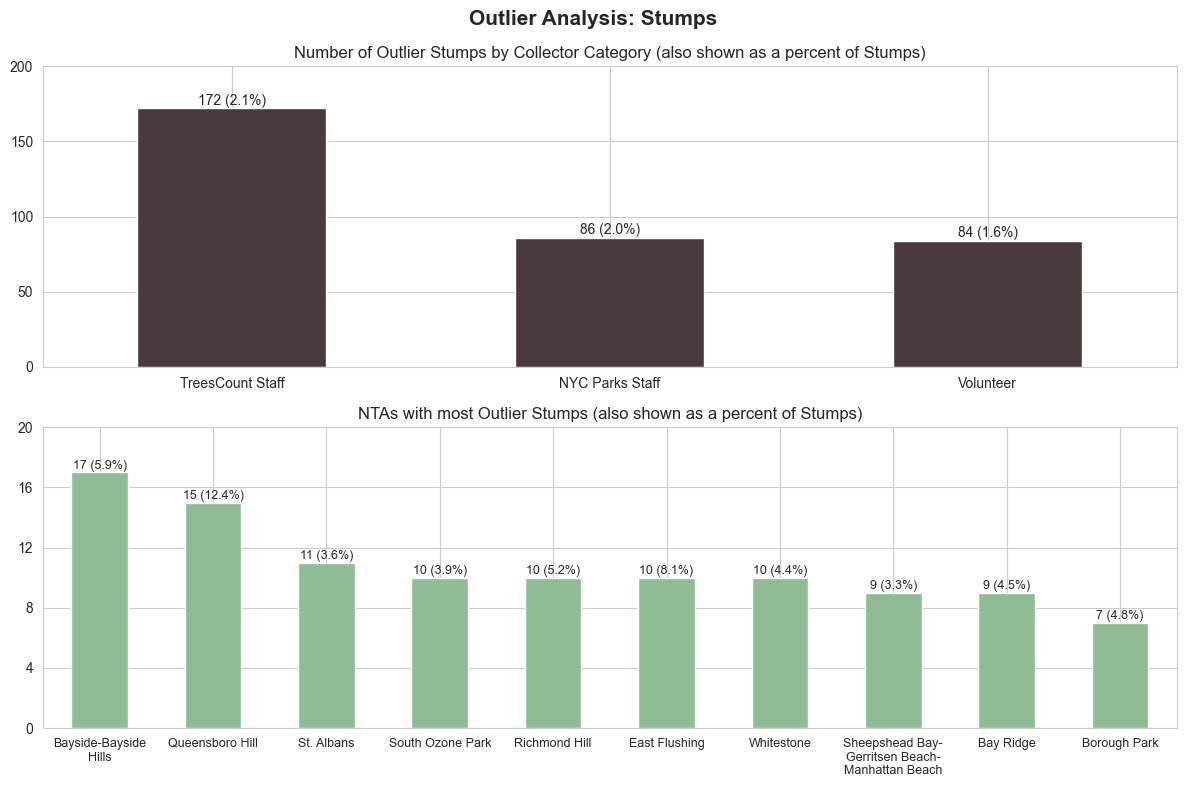

In [427]:
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0), rowspan=1, colspan=1)

merged_stumps_outliers_usertype.plot(kind="bar", x="user_type", y="count_outliers", ax=ax1, color="#49393B")
ax1.legend().remove()
ax1.set(title="Number of Outlier Stumps by Collector Category (also shown as a percent of Stumps)", xlabel=None, ylabel=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=10)
ax1.set_yticks(np.arange(0,201,50), labels=np.arange(0,201,50), fontsize=10)

for row in merged_stumps_outliers_usertype.index:
    ax1.annotate(text=f"{merged_stumps_outliers_usertype["count_outliers"][row]} ({merged_stumps_outliers_usertype["%outliers"][row]}%)",
                 xy=(row,merged_stumps_outliers_usertype["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=10)

ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0), rowspan=1, colspan=1)

merged_stumps_outliers_nta.plot(kind="bar", x="nta_name", y="count_outliers", ax=ax2, color="#8FBC94")
ax2.legend().remove()
ax2.set(title="NTAs with most Outlier Stumps (also shown as a percent of Stumps)", xlabel=None, ylabel=None)
wrapped_labels = wrap_labels(ax2,20)
ax2.set_xticklabels(wrapped_labels, rotation=0, fontsize=9)
ax2.set_yticks(np.arange(0,21,4), labels=np.arange(0,21,4), fontsize=10);

for row in merged_stumps_outliers_nta.index:
    ax2.annotate(text=f"{merged_stumps_outliers_nta["count_outliers"][row]} ({merged_stumps_outliers_nta["%outliers"][row]}%)",
                 xy=(row,merged_stumps_outliers_nta["count_outliers"][row]), xytext=(0,3), textcoords="offset points",
                 ha="center", fontsize=9)

fig.suptitle("Outlier Analysis: Stumps", fontsize=15, fontweight="bold")
plt.tight_layout(pad=1.2)

> **Insights from the three separate outlier analyses**:
> 1. Nearly 84% of alive outlier trees have good health, followed by ~13% that have fair health and the remaining ~3% with poor health. Health is not recorded for dead trees and stumps.
> 2. Out of the Top 10 Species with the most alive outlier trees, only one: London Planetree also appears in the lists of Top 10 Tree species with the highest mean and median diameter which could indicate that trees with larger diameters are being recorded with fewer errors compared to others.
> 3. The number of alive outlier trees recorded by different data collectors is nearly 2%-2.4% of the total number of alive trees recorded, while the same for stumps is 1.6%-2.1% and for dead trees, this percentage is 6.6%-10.6%. This shows that the percentage of dead tree outliers recorded by different data collectors is significantly higher, implying that all the data collectors could have made mistakes while recording diameters of dead trees and more training is required here.
> 4. NTAs: South Ozone Park and St. Albans are present in the lists of NTAs with the most outliers for all kinds of trees (alive, dead and stumps).

#### 16. Analysis of all Outlier Trees

Storing all outliers recorded in `all_outliers`, which is a union of the alive, dead and stump outlier `df`s

In [428]:
all_outliers = pd.concat([alive_trees_outliers, dead_trees_outliers, stumps_outliers], ignore_index=True) # Union all 3 outlier dfs

Making `all_outliers_sub`, a `df` that stores the `tree_id`, `user_type` and the date each tree was surveyed at in yyyy-mm format

In [429]:
all_outliers_sub = all_outliers[["tree_id", "user_type"]].copy()
all_outliers_sub["date"] = all_outliers["created_at"].dt.strftime("%m-%Y")
all_outliers_sub["date"] = pd.to_datetime(all_outliers_sub["date"], format="%m-%Y")
all_outliers_sub["date"] = all_outliers_sub["date"].astype("category") # Convert date columns to category so that groupby(observed=False) is applicable
all_outliers_sub

tree_id         user_type       date
0       168583   NYC Parks Staff 2015-08-01
1       370606   NYC Parks Staff 2015-10-01
2       418433   NYC Parks Staff 2015-11-01
3       476317  TreesCount Staff 2015-11-01
4       409369  TreesCount Staff 2015-10-01
...        ...               ...        ...
16027   512485  TreesCount Staff 2015-12-01
16028   566147  TreesCount Staff 2016-05-01
16029   486677  TreesCount Staff 2015-11-01
16030   599293  TreesCount Staff 2016-06-01
16031   201970  TreesCount Staff 2015-09-01

[16032 rows x 3 columns]

**Tip**: Use `.groupby(observed=False)` if there are 0 occurrences of a particular group or combination. This will ensure the zero value is visible on the graph, otherwise the graph will join the point before and after the zero. In this case there are no groups with 0 occurrences. Do not use `.value_counts()` here.

In [430]:
# Used groupby() instead of value_counts() to include combinations with 0 occurrences as well
grouped_outliers_sub = all_outliers_sub.groupby(["date", "user_type"], observed=False)["tree_id"].count().reset_index() 
grouped_outliers_sub["m-y"] = grouped_outliers_sub["date"].dt.strftime("%b-%Y")

In [431]:
grouped_outliers_sub

date         user_type  tree_id       m-y
0  2015-05-01   NYC Parks Staff        7  May-2015
1  2015-05-01  TreesCount Staff       84  May-2015
2  2015-05-01         Volunteer       59  May-2015
3  2015-06-01   NYC Parks Staff       28  Jun-2015
4  2015-06-01  TreesCount Staff      477  Jun-2015
5  2015-06-01         Volunteer      180  Jun-2015
6  2015-07-01   NYC Parks Staff       60  Jul-2015
7  2015-07-01  TreesCount Staff      456  Jul-2015
8  2015-07-01         Volunteer      668  Jul-2015
9  2015-08-01   NYC Parks Staff       66  Aug-2015
10 2015-08-01  TreesCount Staff      524  Aug-2015
11 2015-08-01         Volunteer     1111  Aug-2015
12 2015-09-01   NYC Parks Staff      218  Sep-2015
13 2015-09-01  TreesCount Staff      677  Sep-2015
14 2015-09-01         Volunteer      829  Sep-2015
15 2015-10-01   NYC Parks Staff     1361  Oct-2015
16 2015-10-01  TreesCount Staff      829  Oct-2015
17 2015-10-01         Volunteer      785  Oct-2015
18 2015-11-01   NYC Parks Staff      872  Nov-2015
19 2015-11-01  TreesCount Staff      486  Nov-2015
20 2015-11-01         Volunteer      166  Nov-2015
21 2015-12-01   NYC Parks Staff      442  Dec-2015
22 2015-12-01  TreesCount Staff      411  Dec-2015
23 2015-12-01         Volunteer      142  Dec-2015
24 2016-01-01   NYC Parks Staff       14  Jan-2016
25 2016-01-01  TreesCount Staff       21  Jan-2016
26 2016-01-01         Volunteer       21  Jan-2016
27 2016-02-01   NYC Parks Staff       17  Feb-2016
28 2016-02-01  TreesCount Staff       15  Feb-2016
29 2016-02-01         Volunteer       56  Feb-2016
30 2016-03-01   NYC Parks Staff       36  Mar-2016
31 2016-03-01  TreesCount Staff       38  Mar-2016
32 2016-03-01         Volunteer       26  Mar-2016
33 2016-04-01   NYC Parks Staff       16  Apr-2016
34 2016-04-01  TreesCount Staff       25  Apr-2016
35 2016-04-01         Volunteer       14  Apr-2016
36 2016-05-01   NYC Parks Staff        9  May-2016
37 2016-05-01  TreesCount Staff      348  May-2016
38 2016-05-01         Volunteer       86  May-2016
39 2016-06-01   NYC Parks Staff       11  Jun-2016
40 2016-06-01  TreesCount Staff     1080  Jun-2016
41 2016-06-01         Volunteer      243  Jun-2016
42 2016-07-01   NYC Parks Staff      152  Jul-2016
43 2016-07-01  TreesCount Staff      637  Jul-2016
44 2016-07-01         Volunteer      220  Jul-2016
45 2016-08-01   NYC Parks Staff      190  Aug-2016
46 2016-08-01  TreesCount Staff      811  Aug-2016
47 2016-08-01         Volunteer      232  Aug-2016
48 2016-09-01   NYC Parks Staff      198  Sep-2016
49 2016-09-01  TreesCount Staff      443  Sep-2016
50 2016-09-01         Volunteer      135  Sep-2016

Preparing the remaining three `df`s which will be used to visualize the four subplots of all outliers combined 

In [432]:
all_outliers_status = all_outliers["status"].value_counts().reset_index()
all_trees_status = tree_sub_df["status"].value_counts().reset_index()
merged_all_outliers_status = all_outliers_status.merge(all_trees_status, on="status", how="left", suffixes=("_outliers", "_all"))
merged_all_outliers_status["%outliers"] = ((merged_all_outliers_status["count_outliers"]/merged_all_outliers_status["count_all"])*100).round(1)

all_outliers_usertype = all_outliers["user_type"].value_counts().reset_index()
all_trees_usertype = tree_sub_df["user_type"].value_counts().reset_index()
merged_all_outliers_usertype = all_outliers_usertype.merge(all_trees_usertype, on="user_type", how="left", suffixes=("_outliers", "_all"))
merged_all_outliers_usertype["%outliers"] = ((merged_all_outliers_usertype["count_outliers"]/merged_all_outliers_usertype["count_all"])*100).round(1)

all_outliers_nta = all_outliers["nta_name"].value_counts().reset_index().head(10)
all_trees_nta = tree_sub_df["nta_name"].value_counts().reset_index()
merged_all_outliers_nta = all_outliers_nta.merge(all_trees_nta, on="nta_name", how="left", suffixes=("_outliers", "_all"))
merged_all_outliers_nta["%outliers"] = ((merged_all_outliers_nta["count_outliers"]/merged_all_outliers_nta["count_all"])*100).round(1)

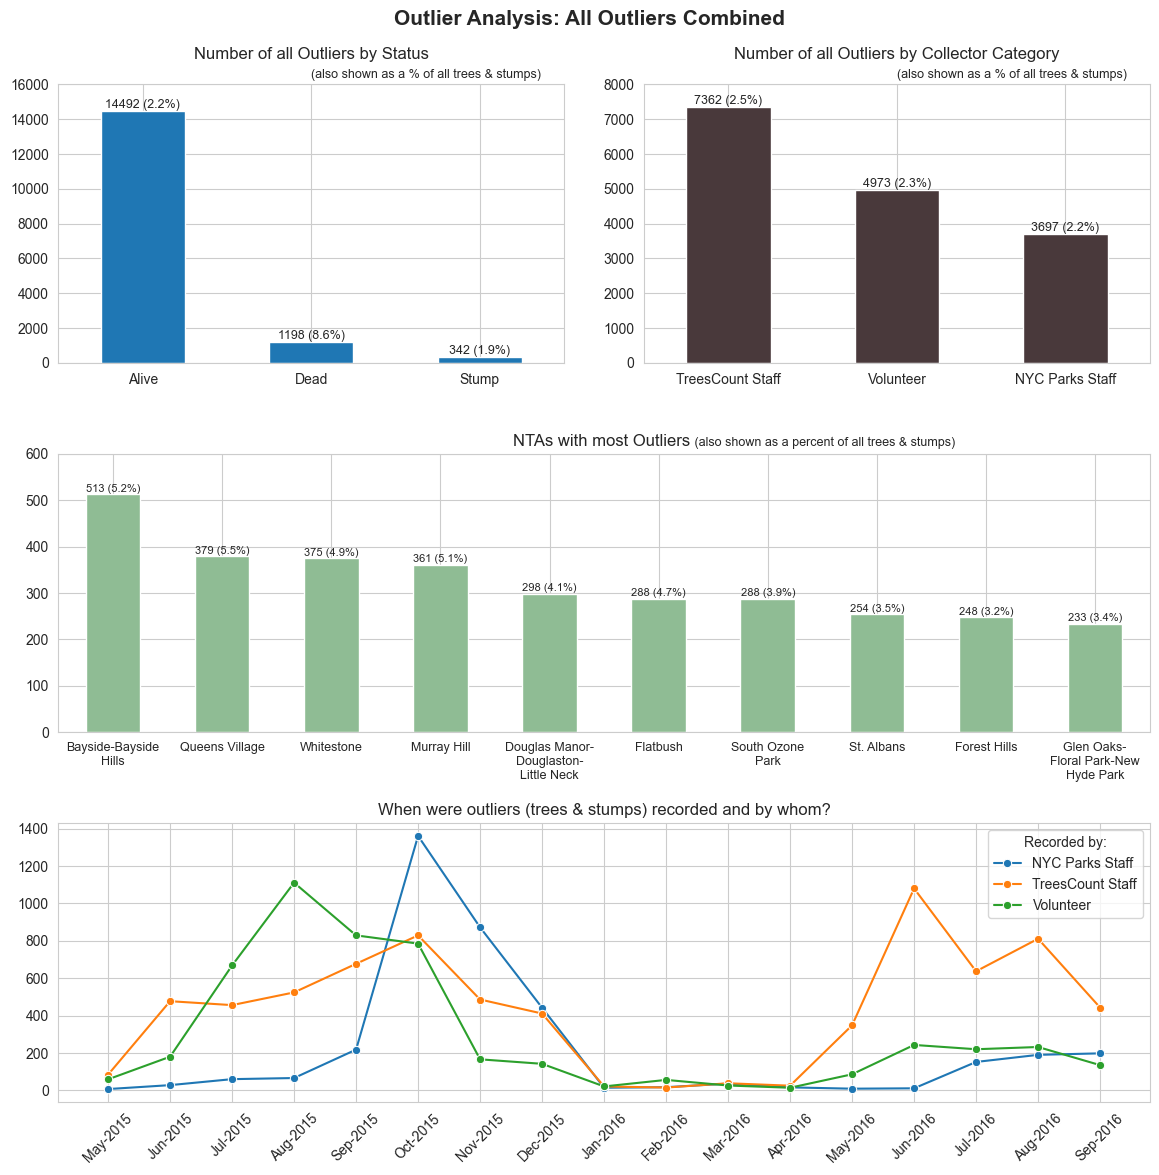

In [433]:
fig= plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid(shape=(3,2), loc=(0,0), rowspan=1, colspan=1)

merged_all_outliers_status.plot(kind="bar", x="status", y="count_outliers", ax=ax1)
ax1.legend().remove()
plt.title("Number of all Outliers by Status\n")
plt.text(x=0.5, y=1.025, s="(also shown as a % of all trees & stumps)", transform=ax1.transAxes, fontsize=9)
ax1.set(xlabel=None, ylabel=None)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=10)
ax1.set_yticks(np.arange(0,16001,2000), labels=np.arange(0,16001,2000), fontsize=10)

for row in merged_all_outliers_status.index:
    ax1.annotate(text=f"{merged_all_outliers_status["count_outliers"][row]} ({merged_all_outliers_status["%outliers"][row]}%)",
                 xy=(row,merged_all_outliers_status["count_outliers"][row]), xytext=(0,2), textcoords="offset points",
                 ha="center", fontsize=9)

ax2= plt.subplot2grid(shape=(3,2), loc=(0,1), rowspan=1, colspan=1)

merged_all_outliers_usertype.plot(kind="bar", x="user_type", y="count_outliers", ax=ax2, color="#49393B")
ax2.legend().remove()
plt.title("Number of all Outliers by Collector Category\n")
plt.text(x=0.5, y=1.025, s="(also shown as a % of all trees & stumps)", transform=ax2.transAxes, fontsize=9)
ax2.set(xlabel=None, ylabel=None)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=10)
ax2.set_yticks(np.arange(0,8001,1000), labels=np.arange(0,8001,1000), rotation=0)

for row in merged_all_outliers_usertype.index:
    ax2.annotate(text=f"{merged_all_outliers_usertype["count_outliers"][row]} ({merged_all_outliers_usertype["%outliers"][row]}%)",
                 xy=(row,merged_all_outliers_usertype["count_outliers"][row]), xytext=(0,2), textcoords="offset points",
                 ha="center", fontsize=9)

ax3 = plt.subplot2grid(shape=(3,2), loc=(1,0), rowspan=1, colspan=2)

merged_all_outliers_nta.plot(kind="bar", x="nta_name", y="count_outliers", ax=ax3, color="#8FBC94")
ax3.legend().remove()
plt.title("NTAs with most Outliers ")
plt.text(x=0.58, y=1.03, s=" (also shown as a percent of all trees & stumps)", transform=ax3.transAxes, fontsize=9)
ax3.set(xlabel=None, ylabel=None)
wrapped_labels = wrap_labels(ax3,15)
ax3.set_xticklabels(wrapped_labels, rotation=0, fontsize=9)
ax3.set_yticks(np.arange(0,601,100), labels=np.arange(0,601,100), fontsize=10)

for row in merged_all_outliers_nta.index:
    ax3.annotate(text=f"{merged_all_outliers_nta["count_outliers"][row]} ({merged_all_outliers_nta["%outliers"][row]}%)",
                 xy=(row,merged_all_outliers_nta["count_outliers"][row]), xytext=(0,2), textcoords="offset points",
                 ha="center", fontsize=8)

ax4 = plt.subplot2grid(shape=(3,2), loc=(2,0), rowspan=1, colspan=2)

ax4 = sns.lineplot(data=grouped_outliers_sub, x="m-y", y="tree_id", hue="user_type", marker="o")
ax4.set_xticks(np.arange(0,len(grouped_outliers_sub["m-y"].unique()),1))
ax4.set_xticklabels(grouped_outliers_sub["m-y"].unique(), rotation=45)
ax4.set_yticks(np.arange(0,1401,200), labels=np.arange(0,1401,200), fontsize=10)
ax4.set(title="When were outliers (trees & stumps) recorded and by whom?", xlabel=None, ylabel=None)
ax4.legend(title="Recorded by:");

fig.suptitle("Outlier Analysis: All Outliers Combined", fontsize=15, fontweight="bold")
plt.tight_layout(pad=1.5)

> **Insights from the combined outlier analysis**:
> 1. Nearly 2.2% of alive trees, 8.6% of dead trees and 1.9% of stumps are considered outliers. The outlier percentage of dead trees is relatively higher compared to stumps and alive trees, this could indicate that the diameter of dead trees was recorded with higher inaccuracy and more training is required here.
> 2. NTAs with the highest percentage of outliers recorded: Queens Village (5.5%), Bayside-Bayside Hills (5.2%), closely followed by Murray Hill (5.1%), Whitestone (4.9%) and finally Flatbush (4.7%). 
> 3. Out of all the trees recorded by each collector category, TreesCount Staff recorded 2.5% of outliers, followed by Volunteers with 2.3% of outliers recorded and finally NYC Parks Staff with 2.2% of outliers. There is no significant difference in the percentage of outliers recorded amongst collector categories, implying that data collectors have done their job to the best of their abilities with NYC Parks Staff having the least percentage of outliers recorded.
> 4. The trend of outliers recorded by different collector categories each month is almost identical to the trend of the total number of trees surveyed by different collector categories each month (refer viz 5). This shows that the number of outliers recorded was directly proportional to the total number of trees surveyed for the census duration.

#### 17. Mapping all the Outlier Trees in NYC

Creating a `ListedColormap` object from `status_palette` dictionary, hence setting different colors for trees with different values in the `status` column.

In [434]:
status_palette = {"Alive": "springgreen", "Dead": "red", "Stump": "black"}
cmap = ListedColormap([status_palette[status] for status in all_outliers.status.unique()])

Making a list of latitudes and longitudes which will be used while plotting and also making `POINT` geometries for the coordinates of all the outlier trees.

In [435]:
lat = all_outliers["latitude"].values.tolist()
lon = all_outliers["longitude"].values.tolist()
geometry = [Point(xy) for xy in zip(lon,lat)]

The same `nyc_map` geo-dataframe that contains geometries and other properties of NYC boroughs is reused for plotting the chart for Outlier Trees.

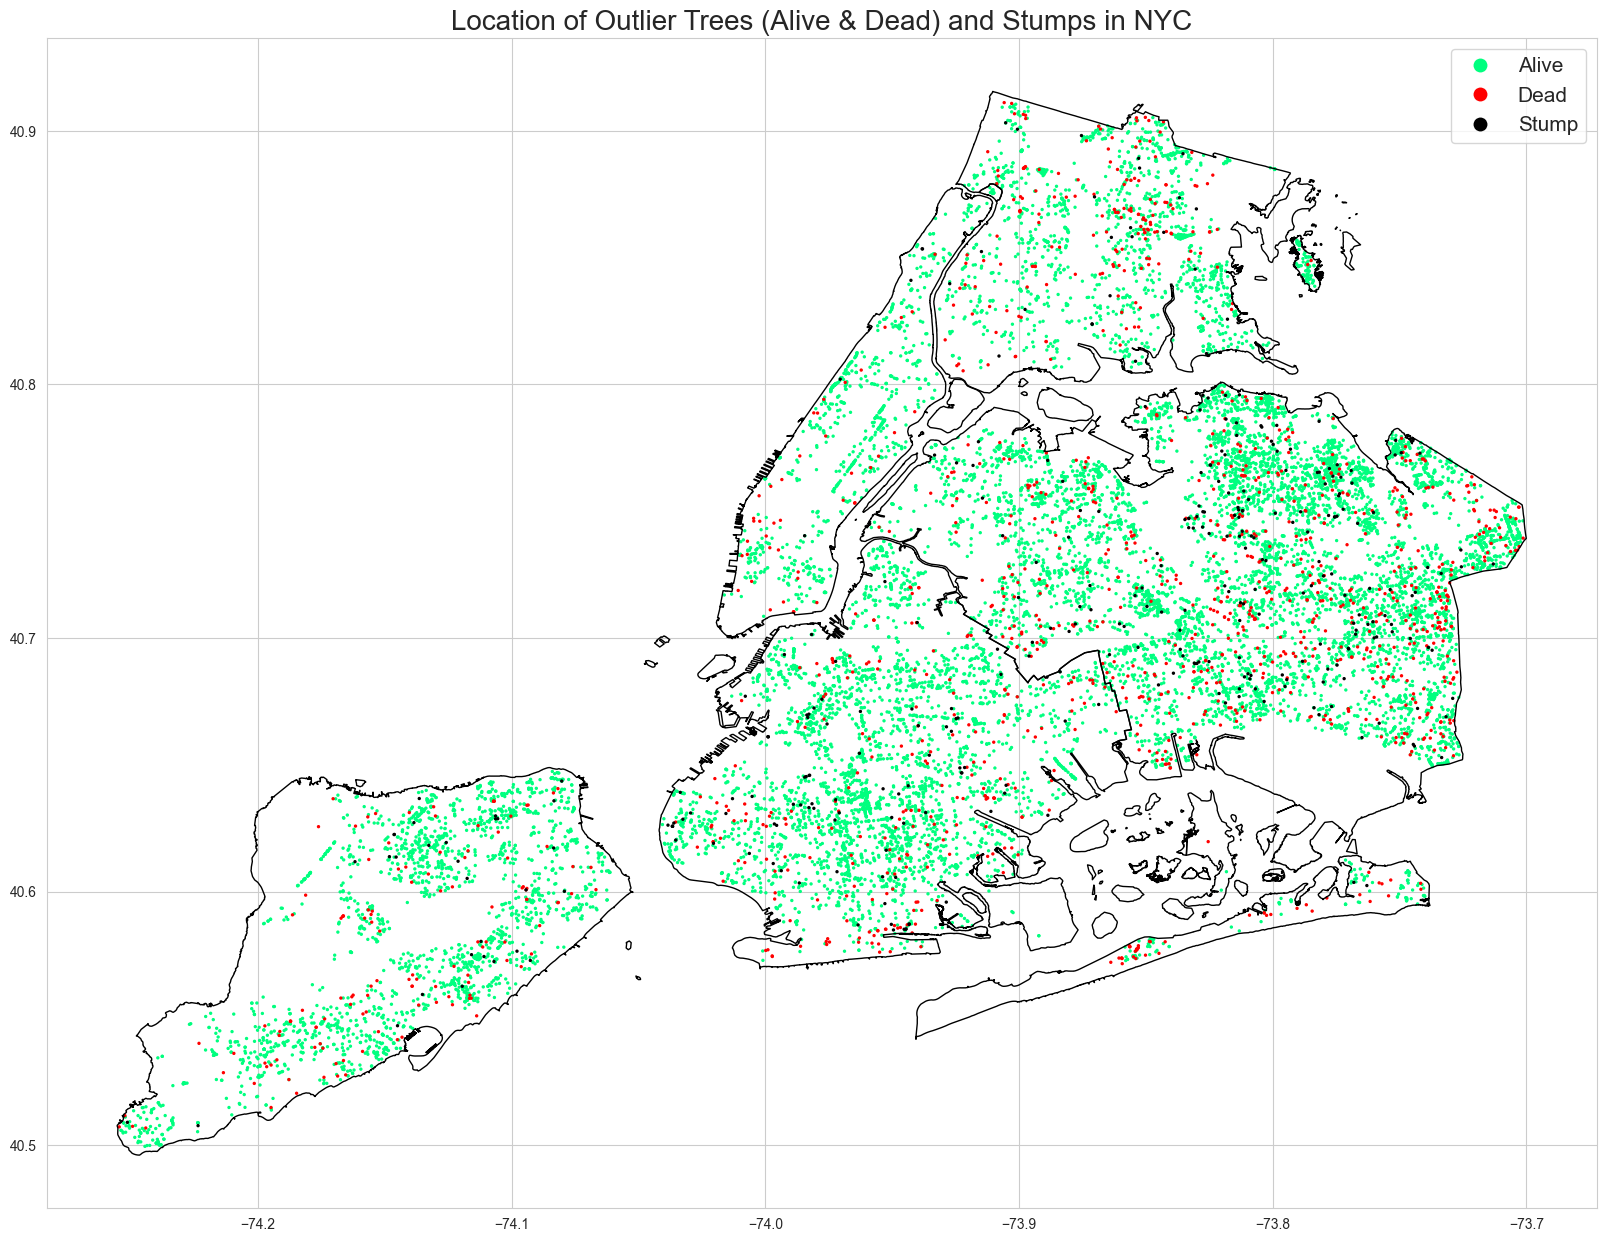

In [436]:
# Setting plot and axes parameters
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('on')
ax.set_title('Location of Outlier Trees (Alive & Dead) and Stumps in NYC', fontdict={'fontsize':'20', 'fontweight':'10'})

# Plotting the boundary of NYC 
nyc_map.boundary.plot(ax=ax, linewidth=1, edgecolor="black")

# Making a geo-dataframe: tree_loc_df, with status and POINT geometries of all outlier trees 
tree_loc_df = gpd.GeoDataFrame(all_outliers["status"], geometry=geometry)

# Plotting the location of all the outlier trees in NYC on the NYC boundary map
g = tree_loc_df.plot(column="status", kind="geo", ax=ax, markersize=2, cmap=cmap, marker="o", legend=True,
                     legend_kwds={"fontsize":15})

> **Insights**:
> 1. We see the highest number of clusters of stumps, alive and dead outlier trees in Queens, followed by Brooklyn, Staten Island, Bronx and finally Manhattan.
> 2. This chart can help identify the areas with the highest concentration of outlier trees, which would be useful in case a resurvey of the outlier trees is ordered.
> 3. Focusing on the areas with the highest concentration of outlier trees can optimize the resurvey efforts by covering the maximum number of outlier trees with minimum effort.

### Conclusion

We analyzed the NYC Street Tree Census Open Dataset to provide data-driven answers to all the questions. We first explored, cleaned and transformed the dataset, handled outliers and subsequently analyzed and visualized the data. Eventually, we uncovered various facts, insights, patterns and correlations and recommended a method to address the outlier trees efficiently.